In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

C:\Users\Anja Tetzner\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/02_batchsize_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [5]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\Anja Tetzner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [7]:
EPOCHS = 30
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

## MLP with one hidden layer and 600 neurons

In [8]:
wv_layer = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#First Dense Layer
x = Dense(600, activation='relu')(embedded_sequences)

x = Flatten()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model = Model(inputs=[comment_input], outputs=preds)

## Train the model within the parameter space

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


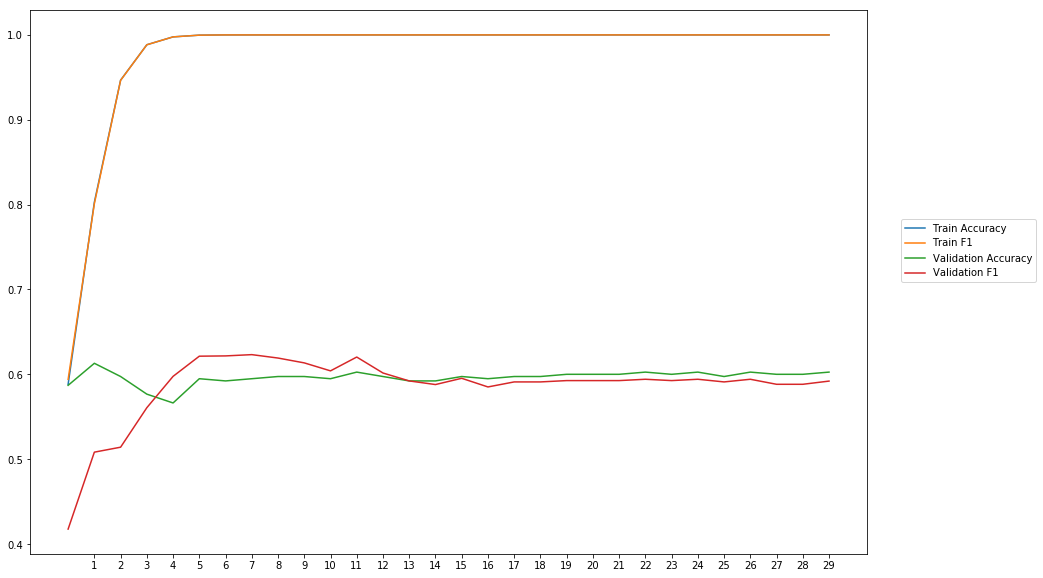

Average Accuracy: 59.64%
Average Precision: 60.29%
Average Recall: 58.00%
Average F1: 58.59%

-----Fold 2--------


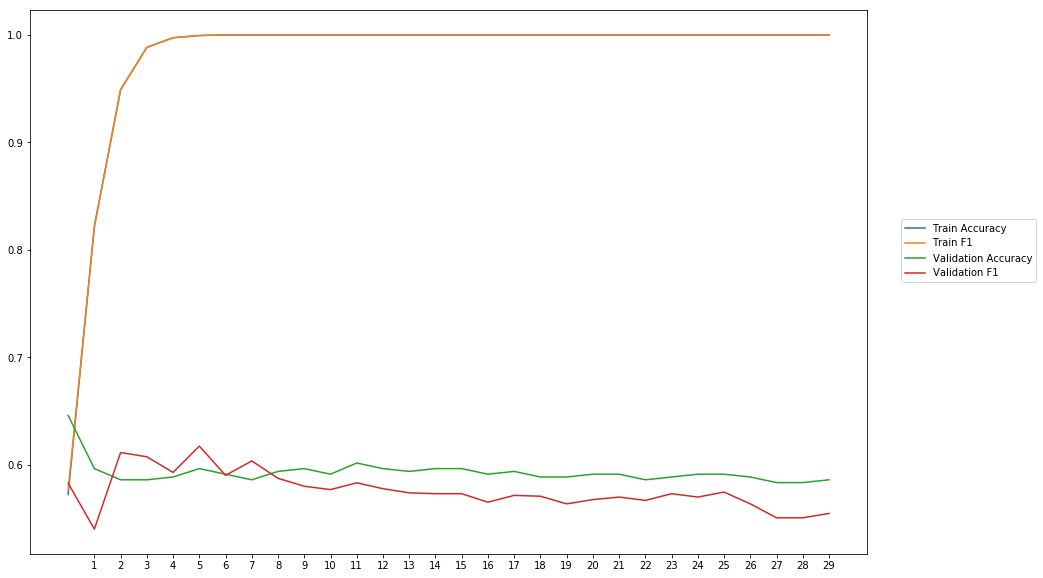

Average Accuracy: 59.28%
Average Precision: 59.87%
Average Recall: 55.78%
Average F1: 57.60%

-----Fold 3--------


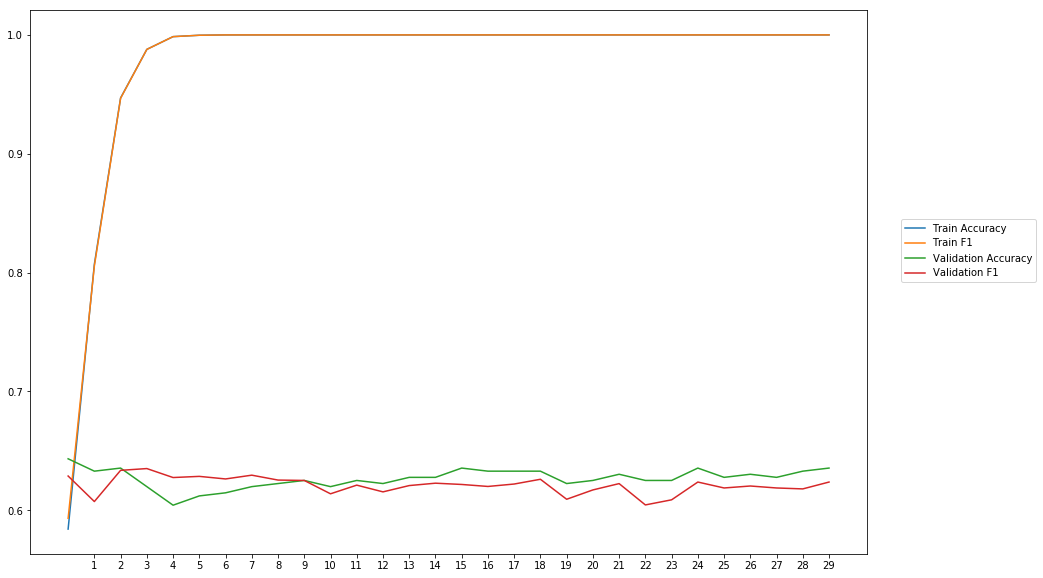

Average Accuracy: 62.67%
Average Precision: 62.79%
Average Recall: 61.55%
Average F1: 62.11%

-----Fold 4--------


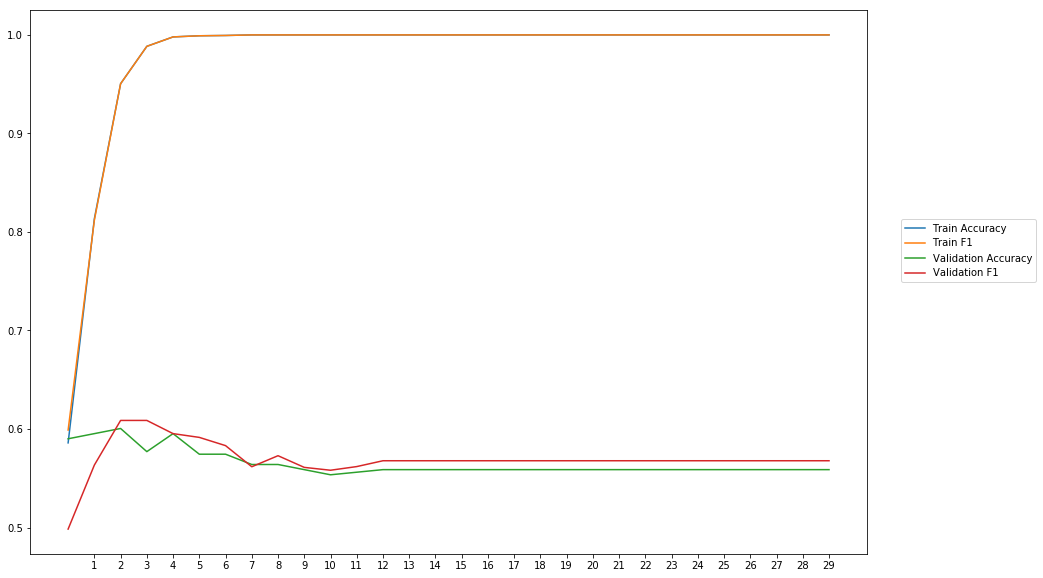

Average Accuracy: 56.54%
Average Precision: 56.38%
Average Recall: 57.78%
Average F1: 56.95%

-----Fold 5--------


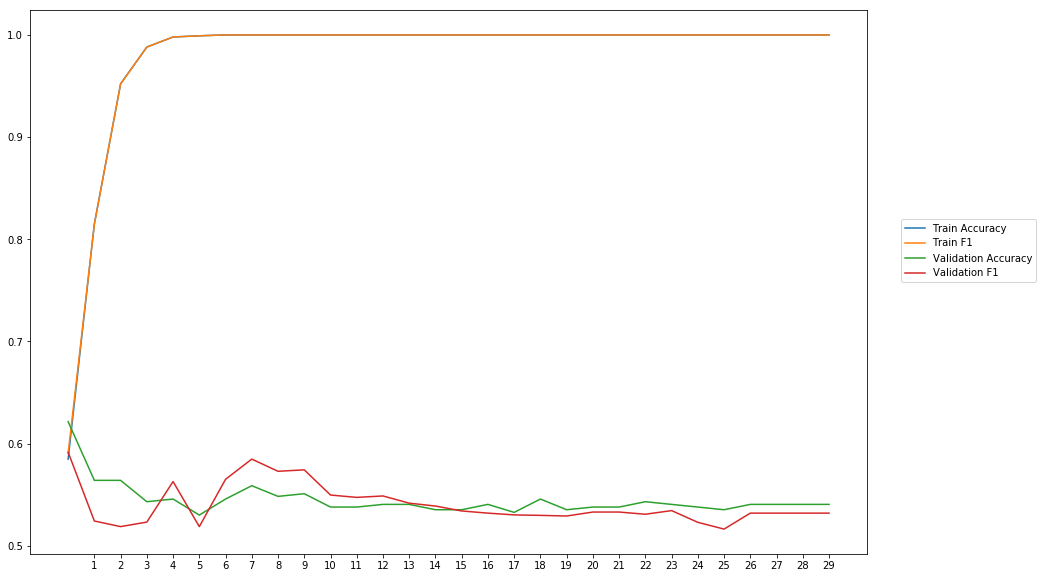

Average Accuracy: 54.49%
Average Precision: 54.50%
Average Recall: 53.77%
Average F1: 54.05%

-----Fold 6--------


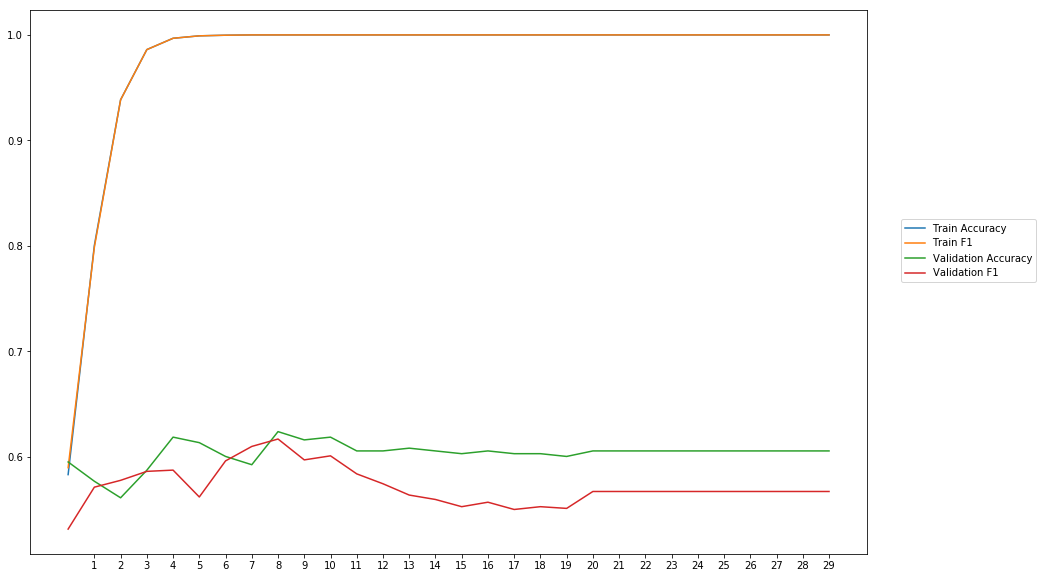

Average Accuracy: 60.35%
Average Precision: 62.08%
Average Recall: 53.28%
Average F1: 57.20%

-----Fold 7--------


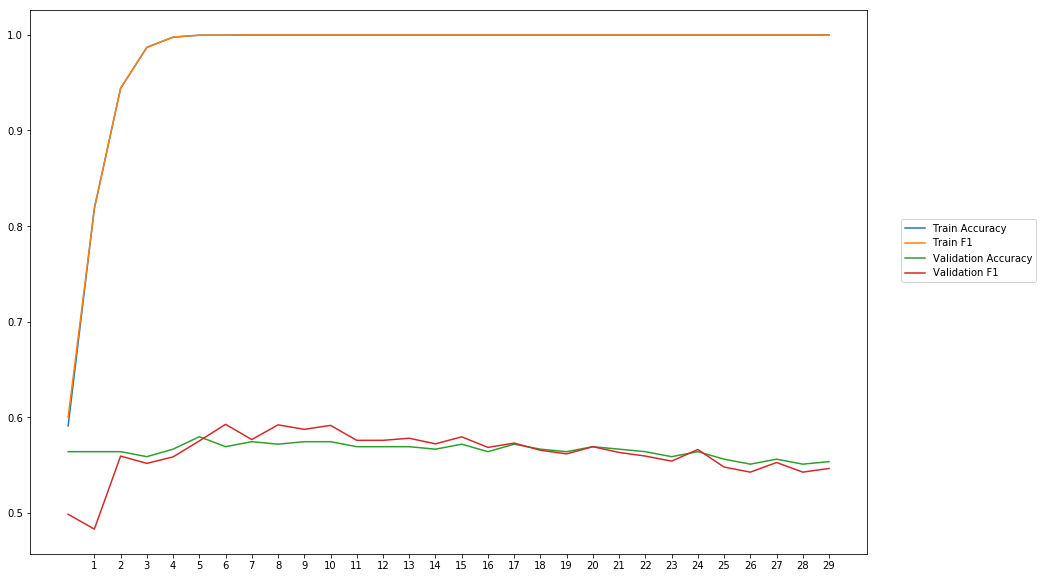

Average Accuracy: 56.54%
Average Precision: 56.51%
Average Recall: 56.13%
Average F1: 56.20%

-----Fold 8--------


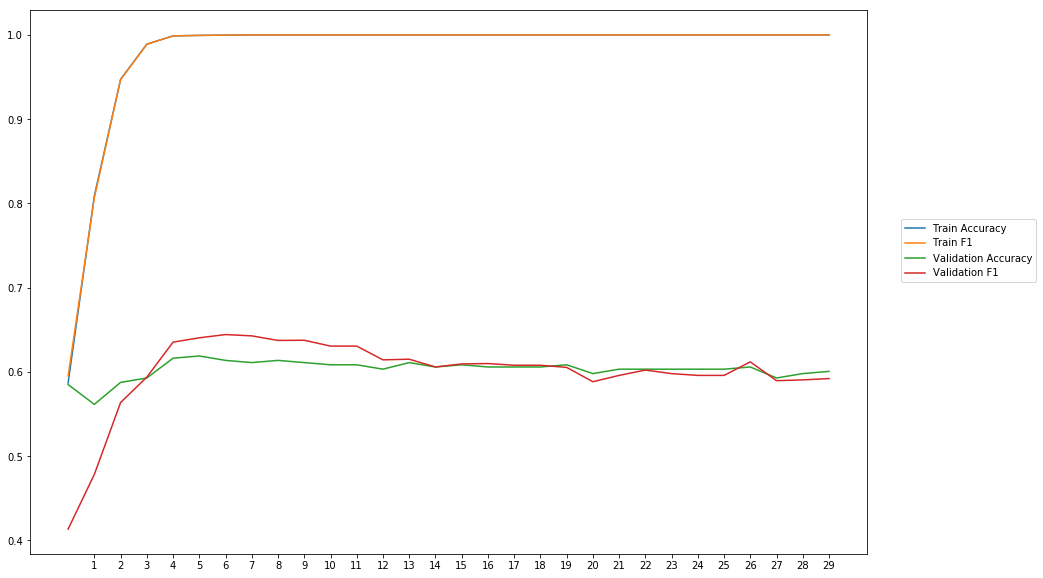

Average Accuracy: 60.30%
Average Precision: 60.36%
Average Recall: 60.37%
Average F1: 59.94%

-----Fold 9--------


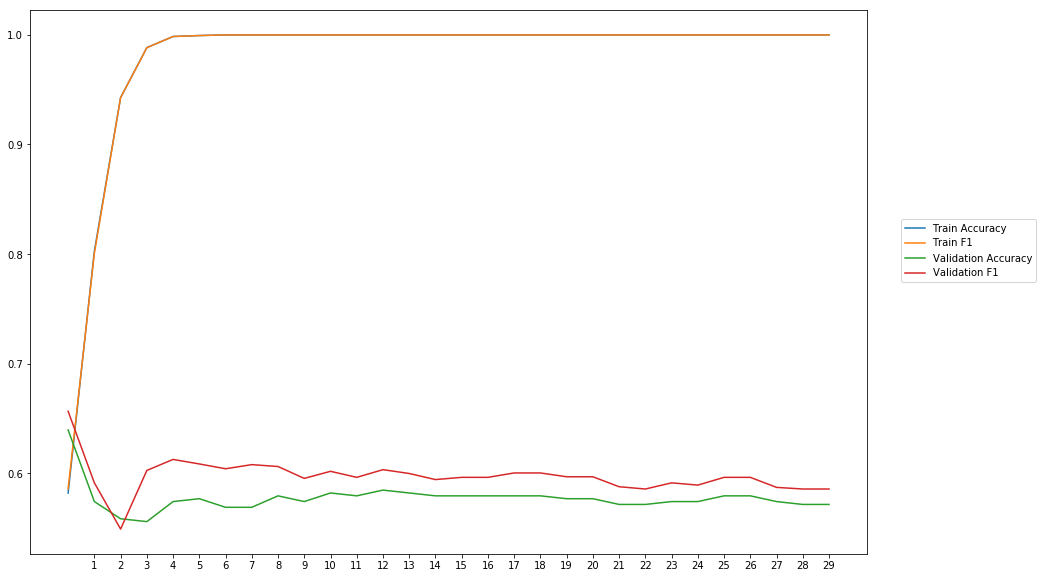

Average Accuracy: 57.75%
Average Precision: 56.92%
Average Recall: 62.97%
Average F1: 59.76%

-----Fold 10--------


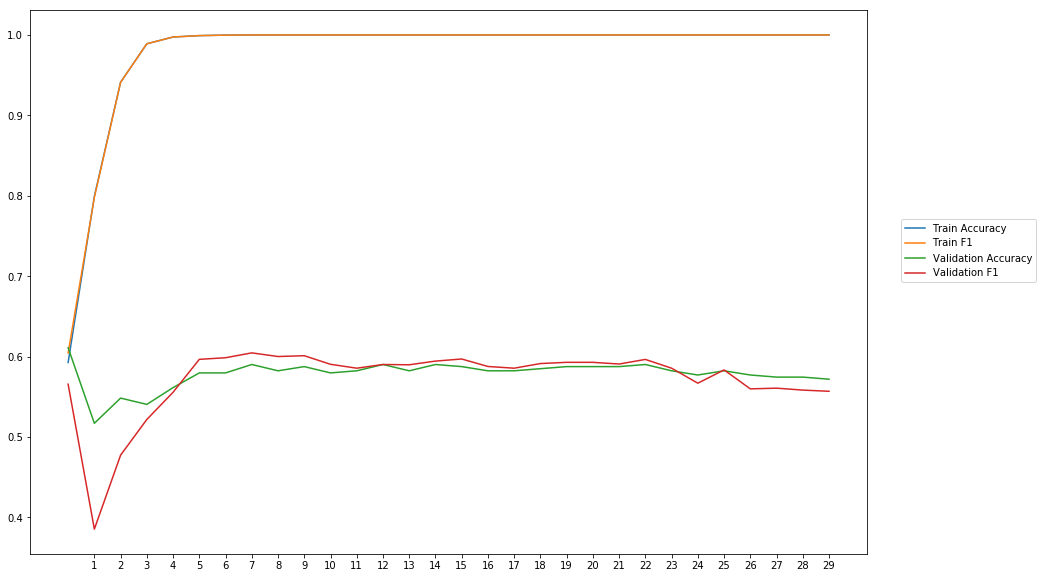

Average Accuracy: 57.83%
Average Precision: 57.78%
Average Recall: 57.03%
Average F1: 57.20%

-------Overallresults-------


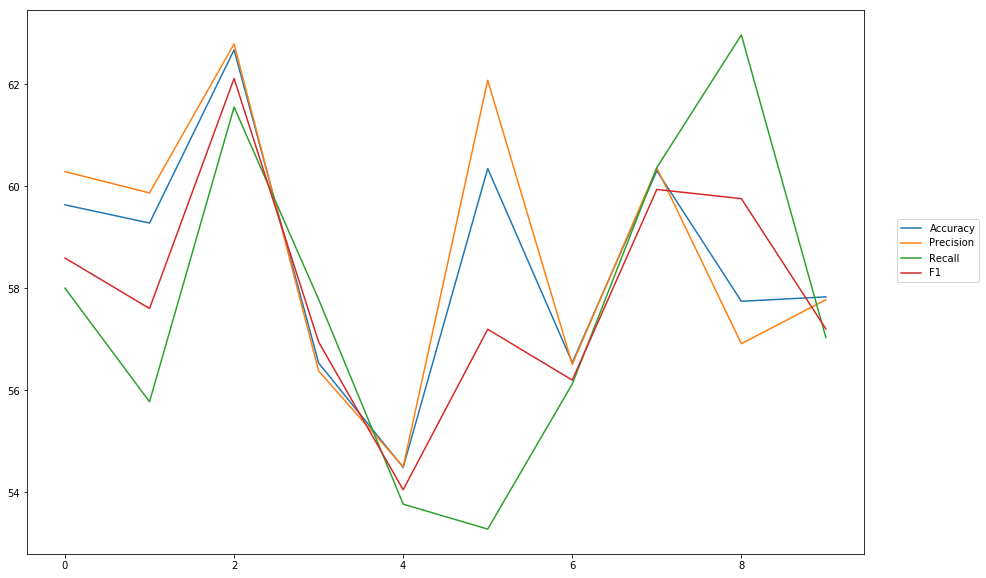

Accuracy: Mean = 58.54% (+/- 2.25%), Max = 62.67%, Min =  54.49%
Precision: Mean = 58.75% (+/- 2.58%), Max = 62.79%, Min =  54.50%
Recall: Mean = 57.67% (+/- 3.02%), Max = 62.97%, Min =  53.28%
F1: Mean = 57.96% (+/- 2.13%), Max = 62.11%, Min =  54.05%


In [9]:
cross_val(model, EPOCHS, 1, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_1')


-----Fold 1--------


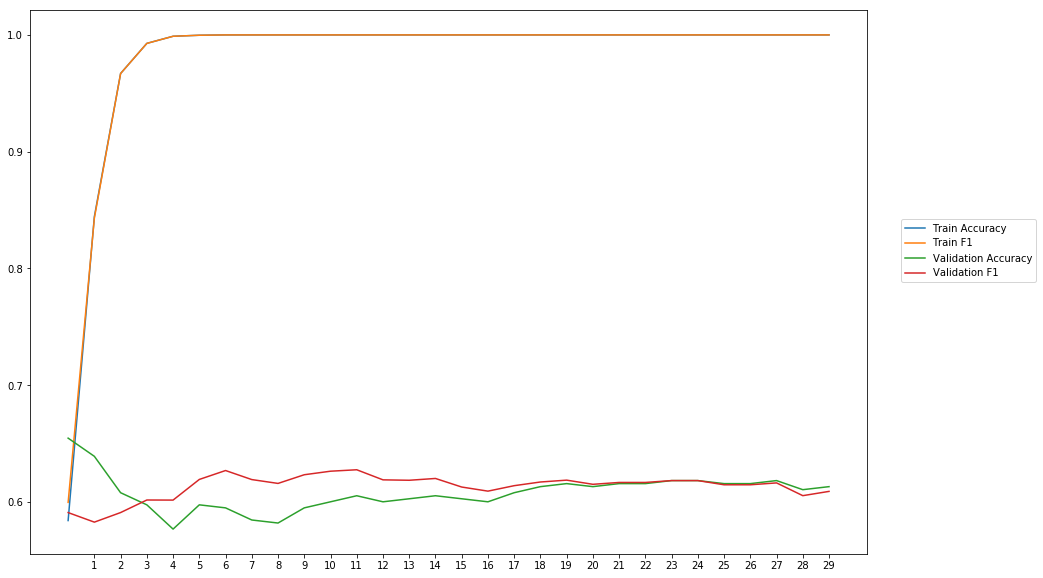

Average Accuracy: 60.78%
Average Precision: 60.62%
Average Recall: 62.47%
Average F1: 61.32%

-----Fold 2--------


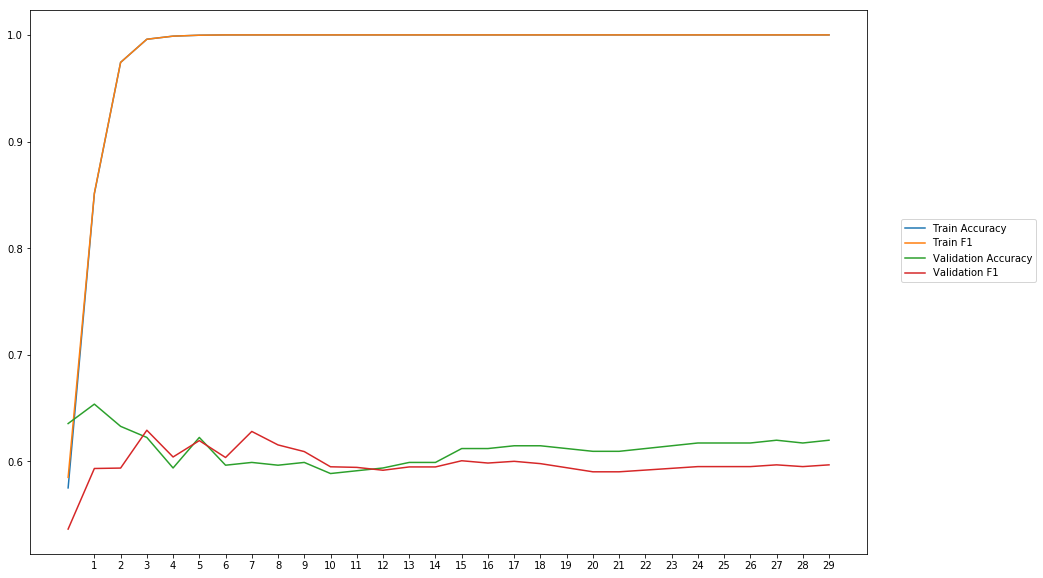

Average Accuracy: 61.14%
Average Precision: 61.93%
Average Recall: 58.22%
Average F1: 59.77%

-----Fold 3--------


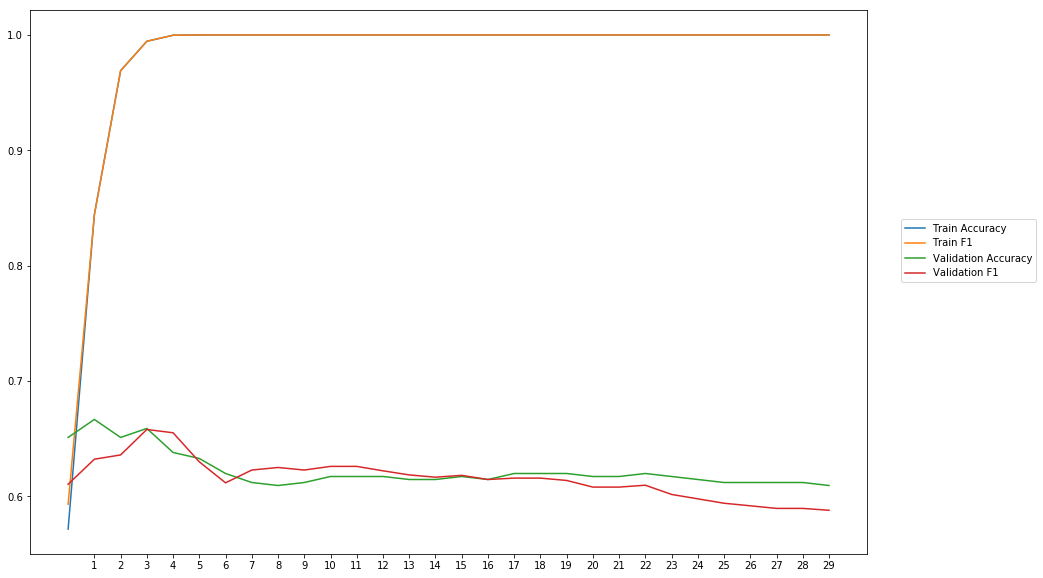

Average Accuracy: 62.22%
Average Precision: 62.42%
Average Recall: 60.91%
Average F1: 61.56%

-----Fold 4--------


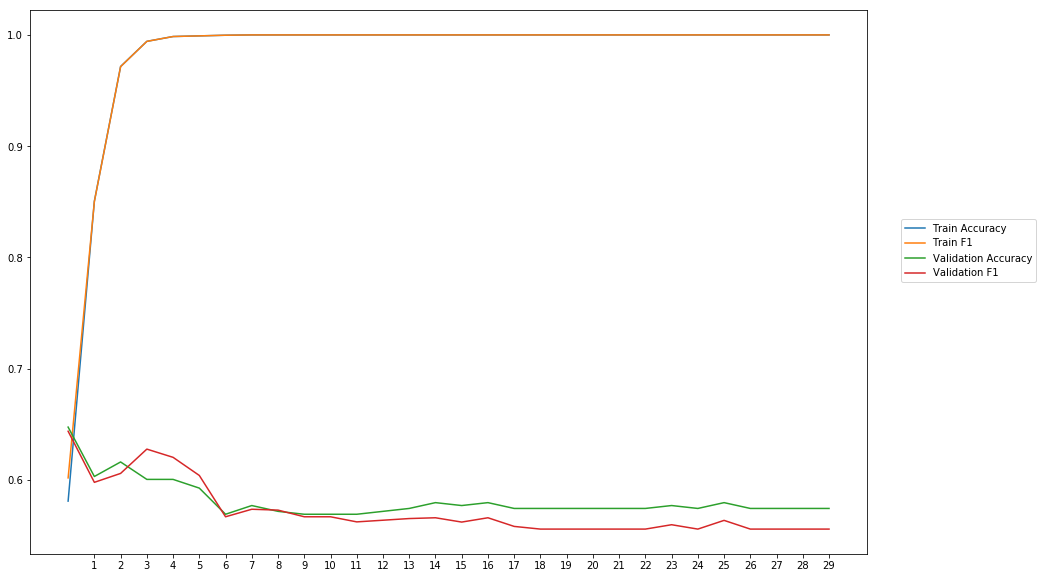

Average Accuracy: 58.15%
Average Precision: 58.32%
Average Recall: 56.30%
Average F1: 57.24%

-----Fold 5--------


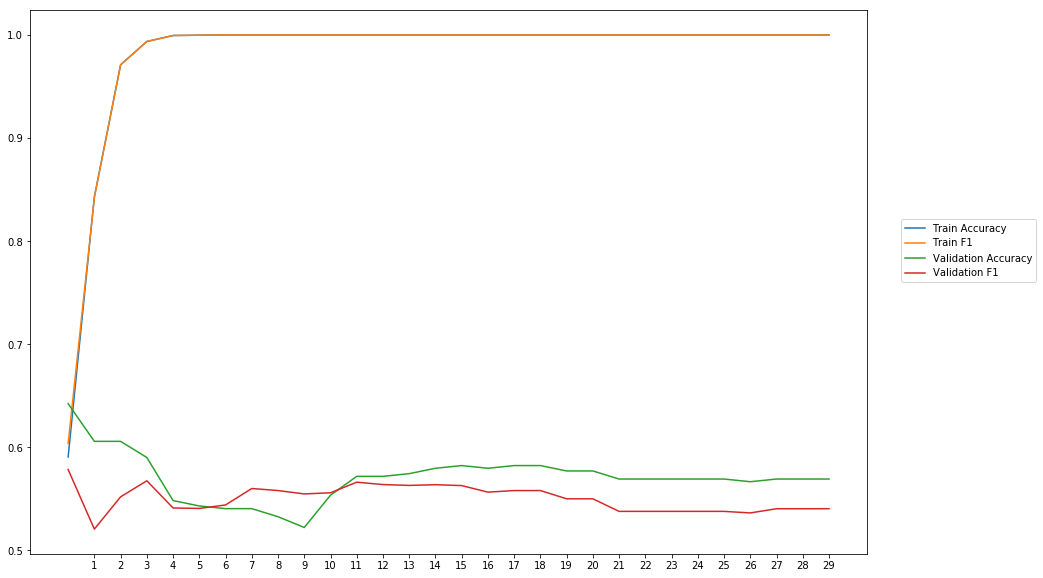

Average Accuracy: 57.08%
Average Precision: 57.98%
Average Recall: 52.72%
Average F1: 55.04%

-----Fold 6--------


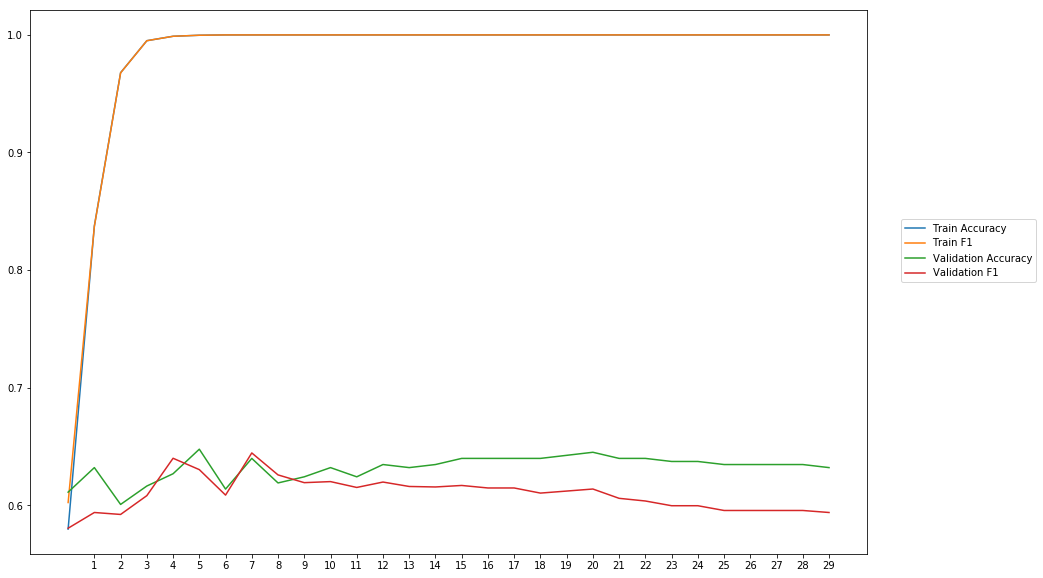

Average Accuracy: 63.19%
Average Precision: 64.80%
Average Recall: 57.77%
Average F1: 60.97%

-----Fold 7--------


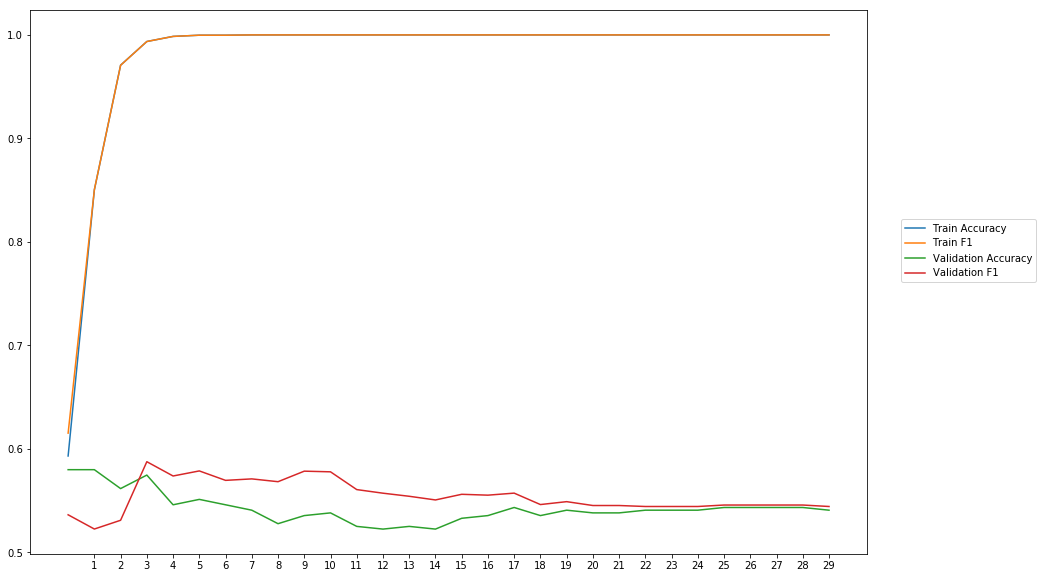

Average Accuracy: 54.23%
Average Precision: 54.03%
Average Recall: 57.17%
Average F1: 55.41%

-----Fold 8--------


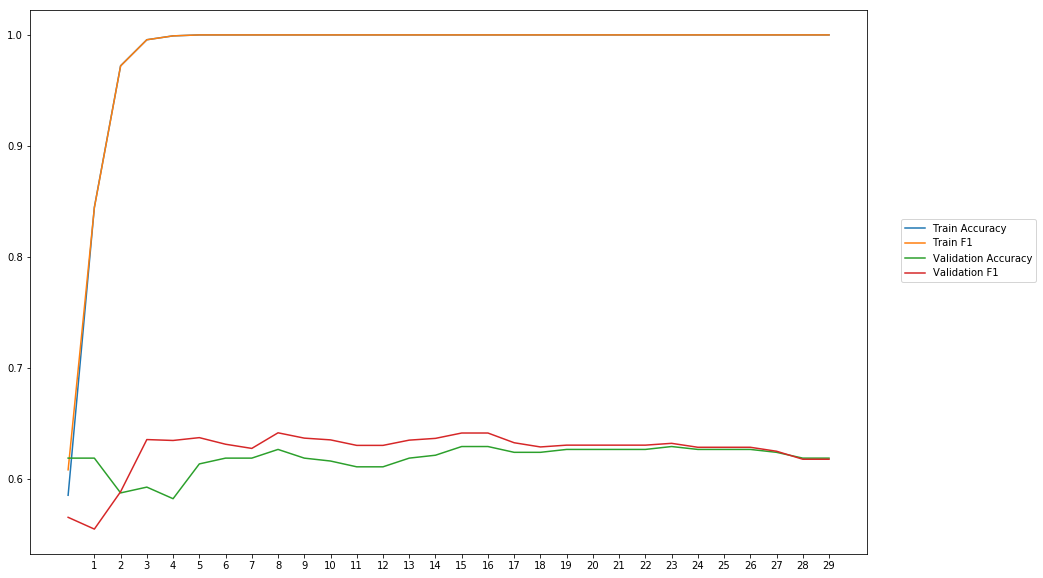

Average Accuracy: 61.86%
Average Precision: 61.41%
Average Recall: 64.10%
Average F1: 62.55%

-----Fold 9--------


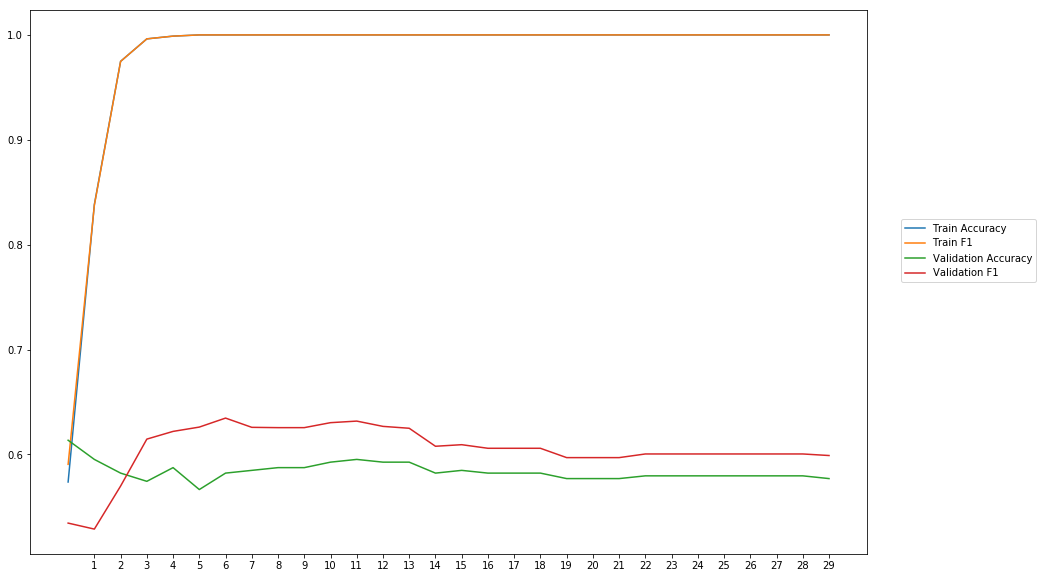

Average Accuracy: 58.38%
Average Precision: 57.61%
Average Recall: 64.31%
Average F1: 60.50%

-----Fold 10--------


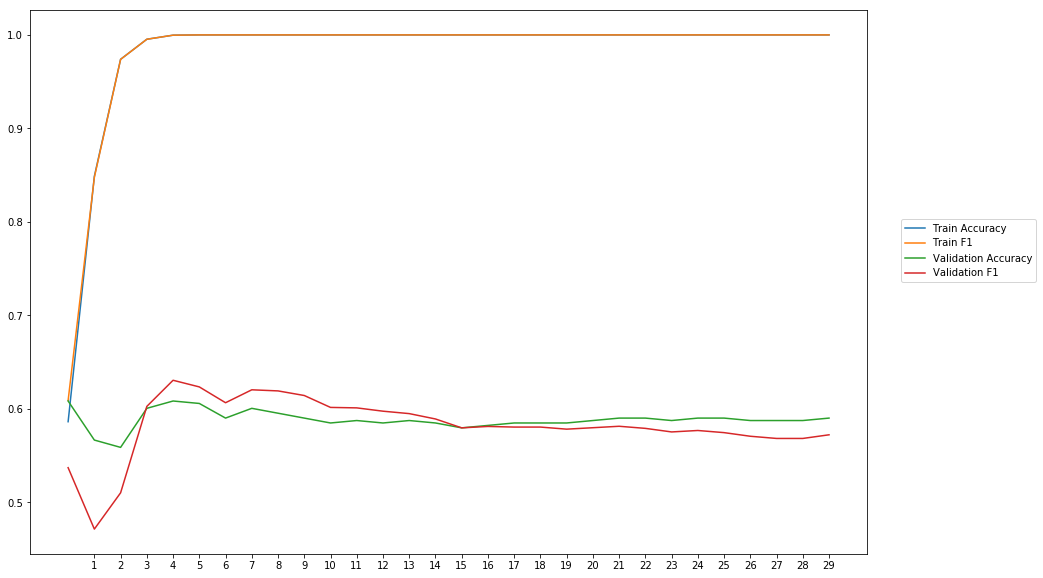

Average Accuracy: 58.86%
Average Precision: 59.00%
Average Recall: 57.89%
Average F1: 58.22%

-------Overallresults-------


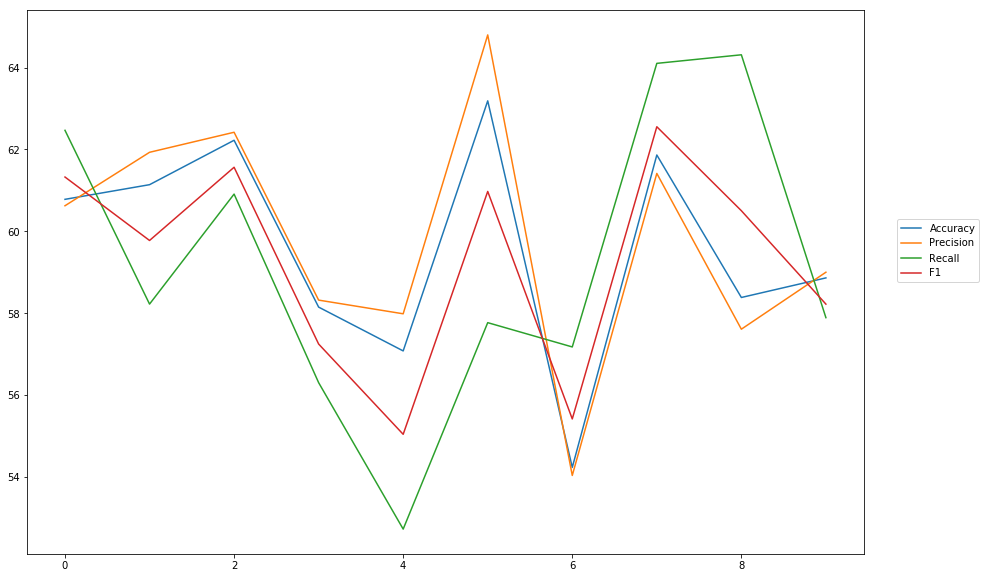

Accuracy: Mean = 59.59% (+/- 2.61%), Max = 63.19%, Min =  54.23%
Precision: Mean = 59.81% (+/- 2.90%), Max = 64.80%, Min =  54.03%
Recall: Mean = 59.19% (+/- 3.51%), Max = 64.31%, Min =  52.72%
F1: Mean = 59.26% (+/- 2.51%), Max = 62.55%, Min =  55.04%


In [9]:
cross_val(model, EPOCHS, 16, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_16')


-----Fold 1--------


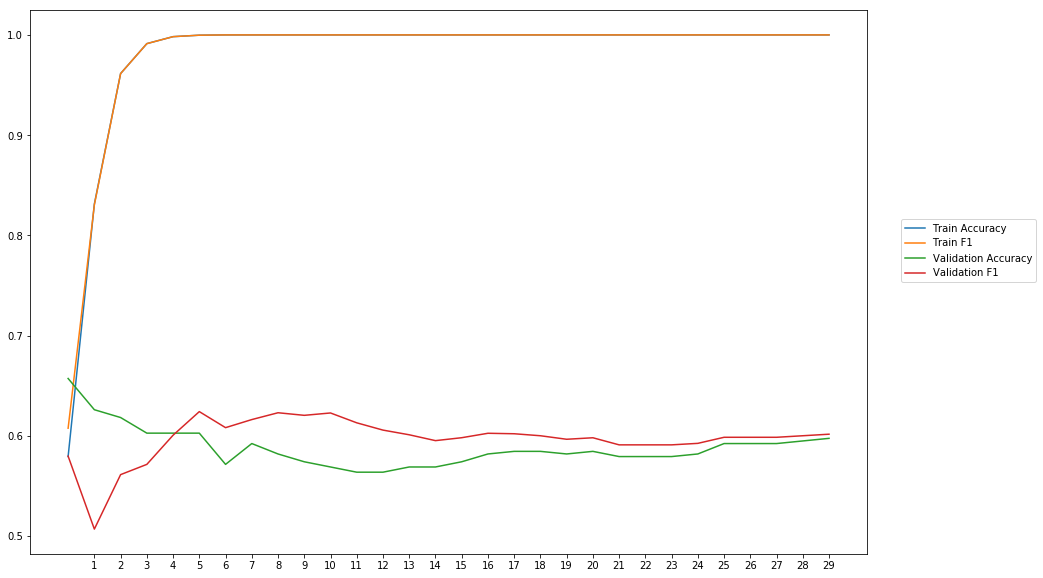

Average Accuracy: 58.81%
Average Precision: 58.93%
Average Recall: 61.56%
Average F1: 59.69%

-----Fold 2--------


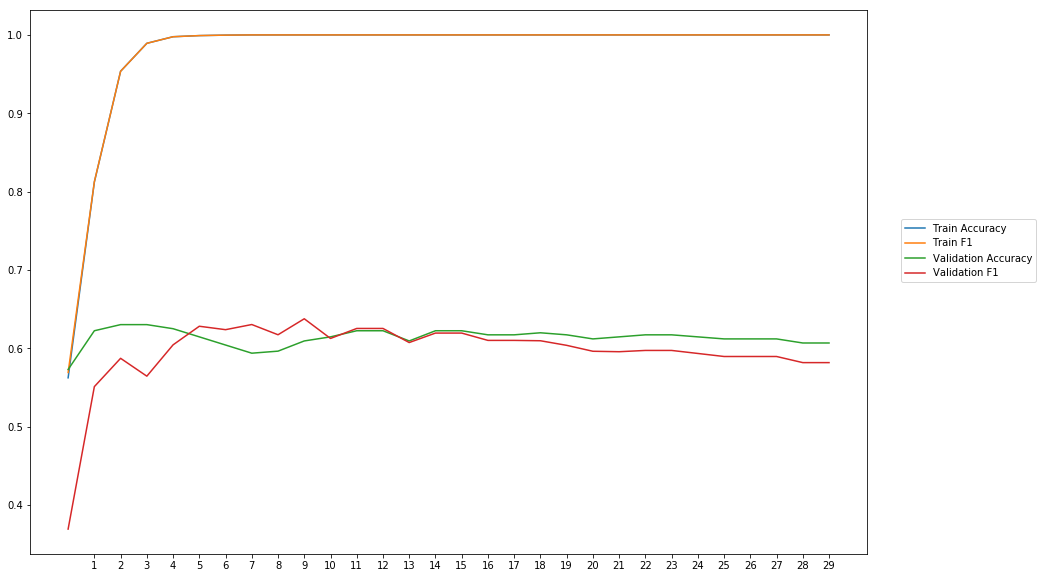

Average Accuracy: 61.36%
Average Precision: 62.31%
Average Recall: 58.01%
Average F1: 59.56%

-----Fold 3--------


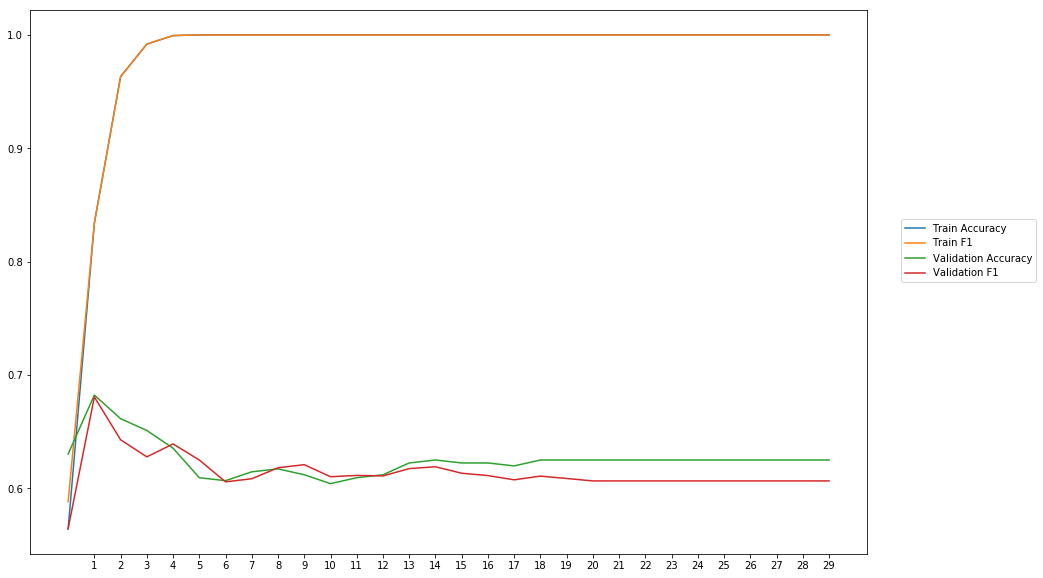

Average Accuracy: 62.53%
Average Precision: 63.05%
Average Recall: 60.00%
Average F1: 61.40%

-----Fold 4--------


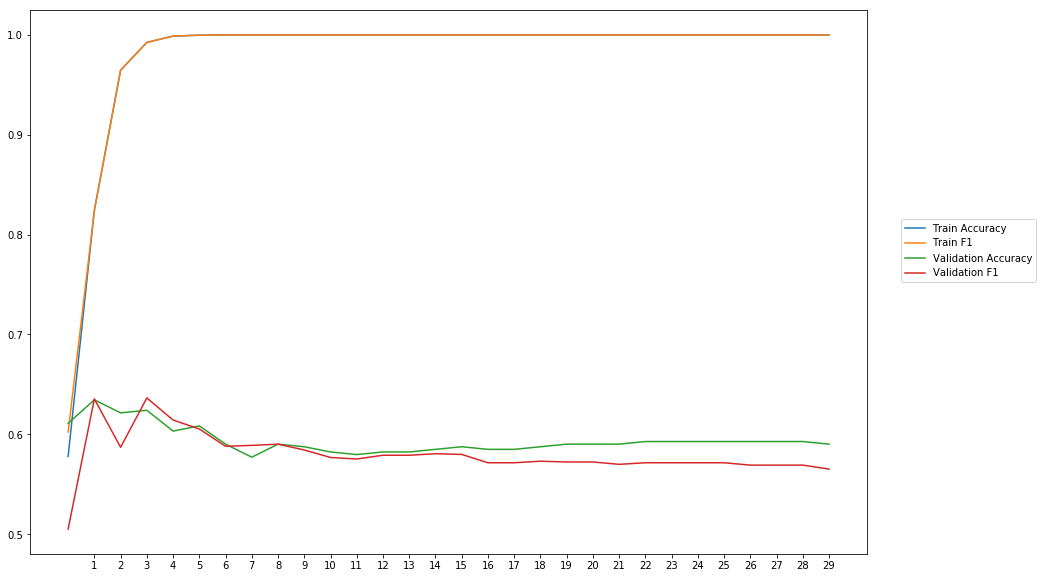

Average Accuracy: 59.37%
Average Precision: 59.99%
Average Recall: 56.39%
Average F1: 57.97%

-----Fold 5--------


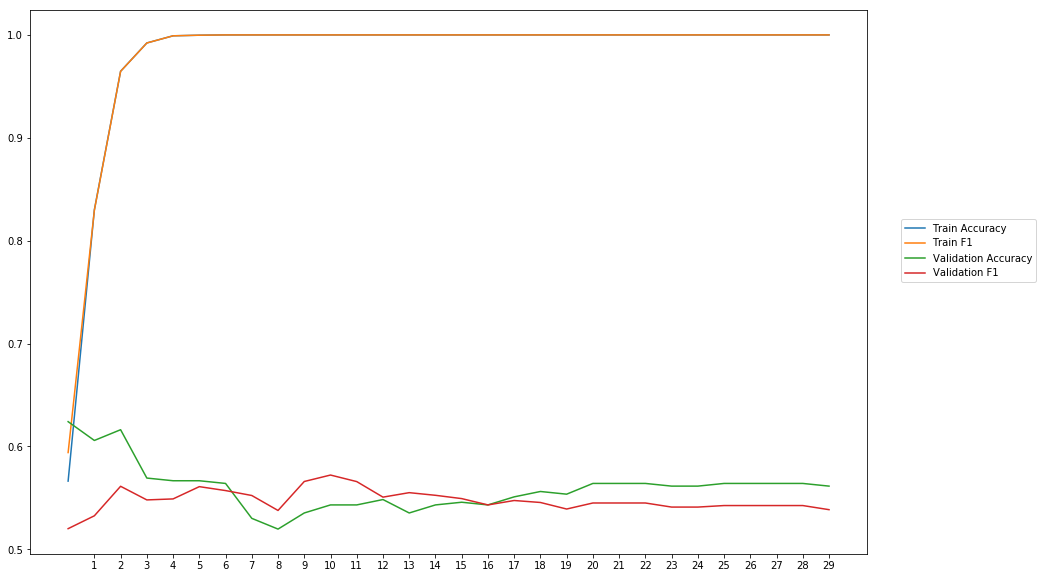

Average Accuracy: 55.97%
Average Precision: 56.63%
Average Recall: 53.54%
Average F1: 54.77%

-----Fold 6--------


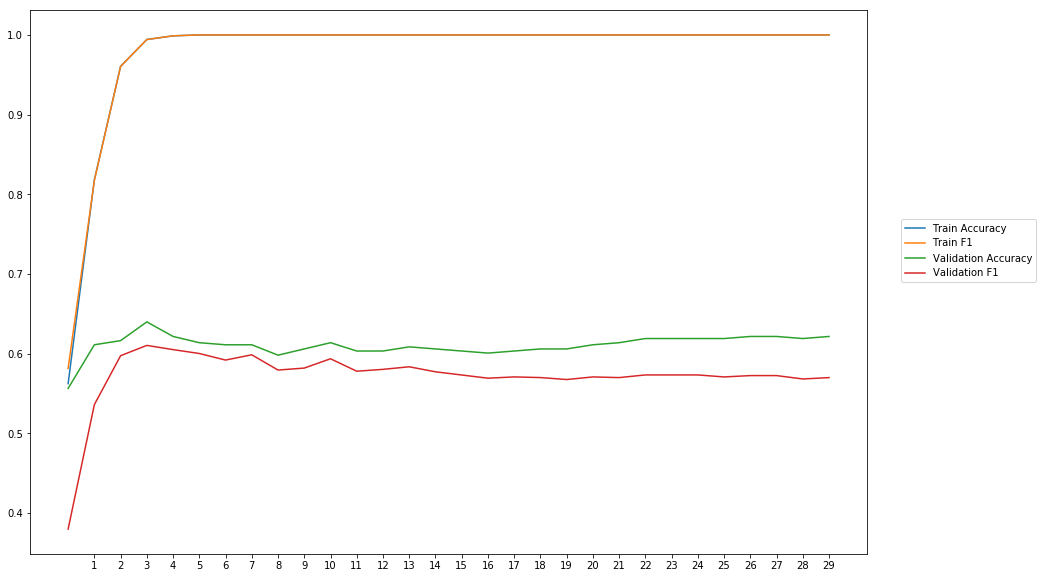

Average Accuracy: 61.06%
Average Precision: 63.28%
Average Recall: 52.51%
Average F1: 57.18%

-----Fold 7--------


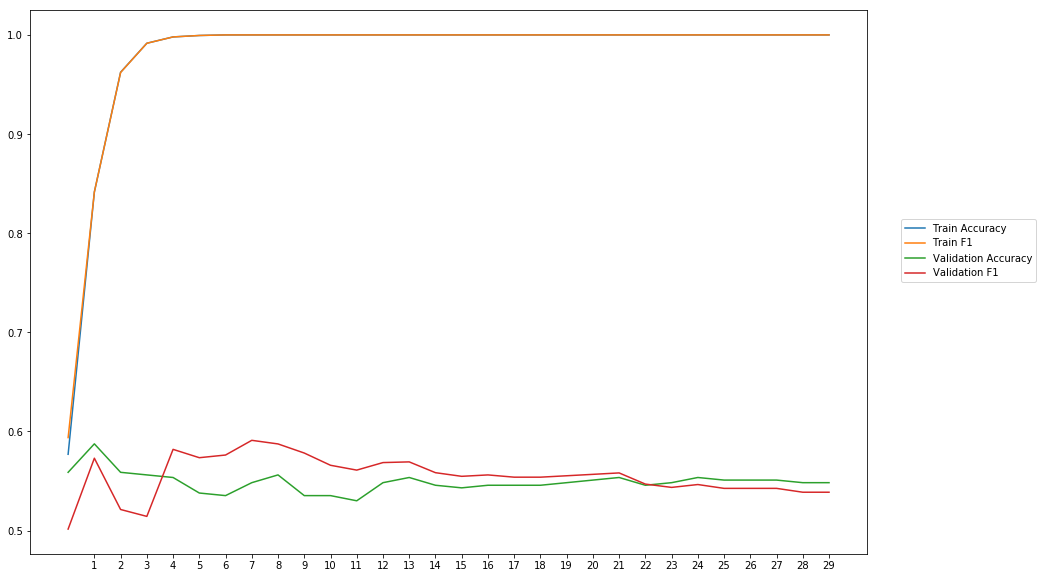

Average Accuracy: 54.90%
Average Precision: 54.73%
Average Recall: 56.63%
Average F1: 55.51%

-----Fold 8--------


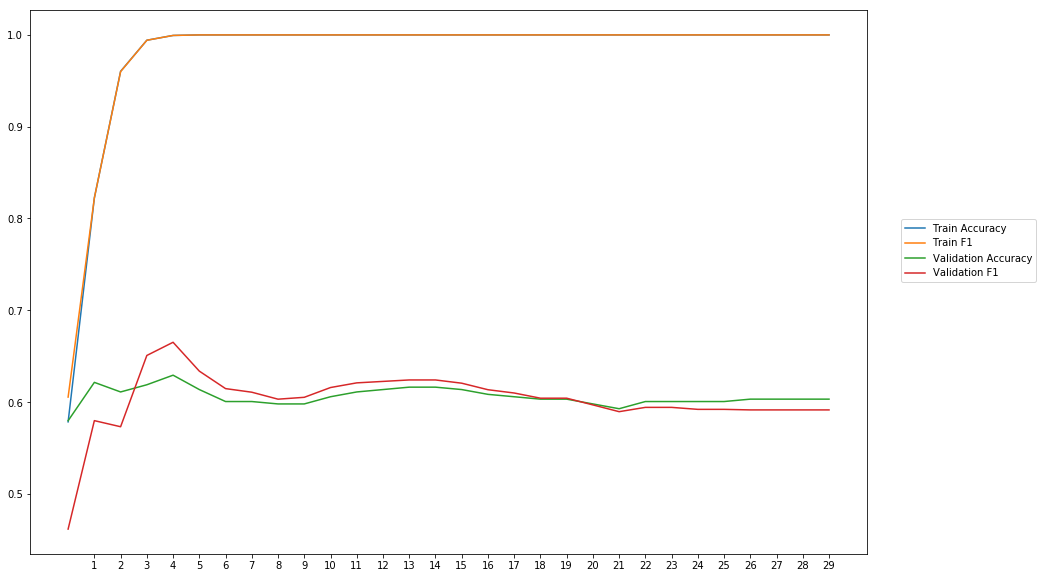

Average Accuracy: 60.57%
Average Precision: 60.59%
Average Recall: 60.42%
Average F1: 60.27%

-----Fold 9--------


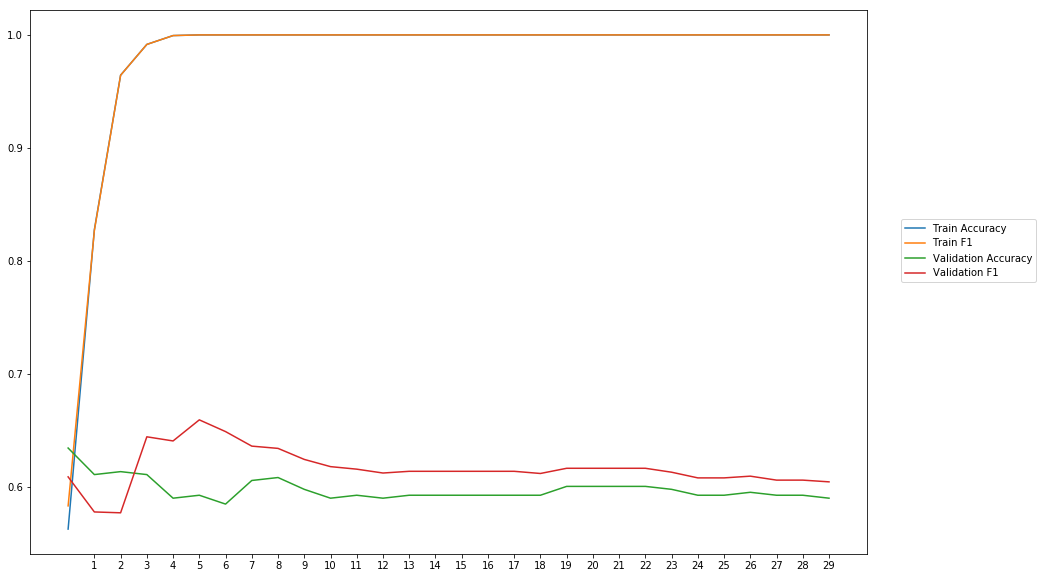

Average Accuracy: 59.78%
Average Precision: 58.90%
Average Recall: 65.11%
Average F1: 61.67%

-----Fold 10--------


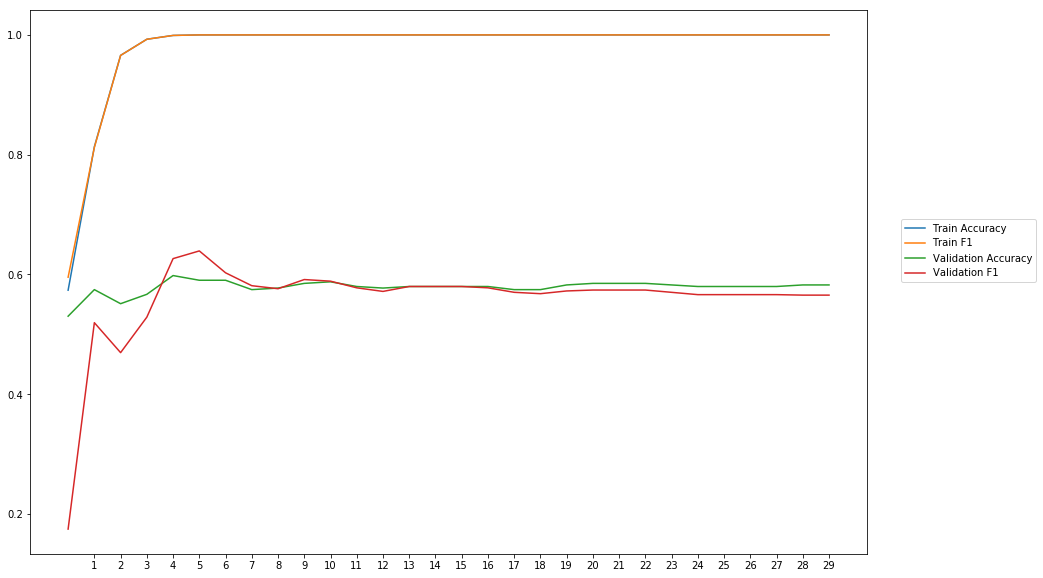

Average Accuracy: 57.83%
Average Precision: 58.53%
Average Recall: 55.01%
Average F1: 55.85%

-------Overallresults-------


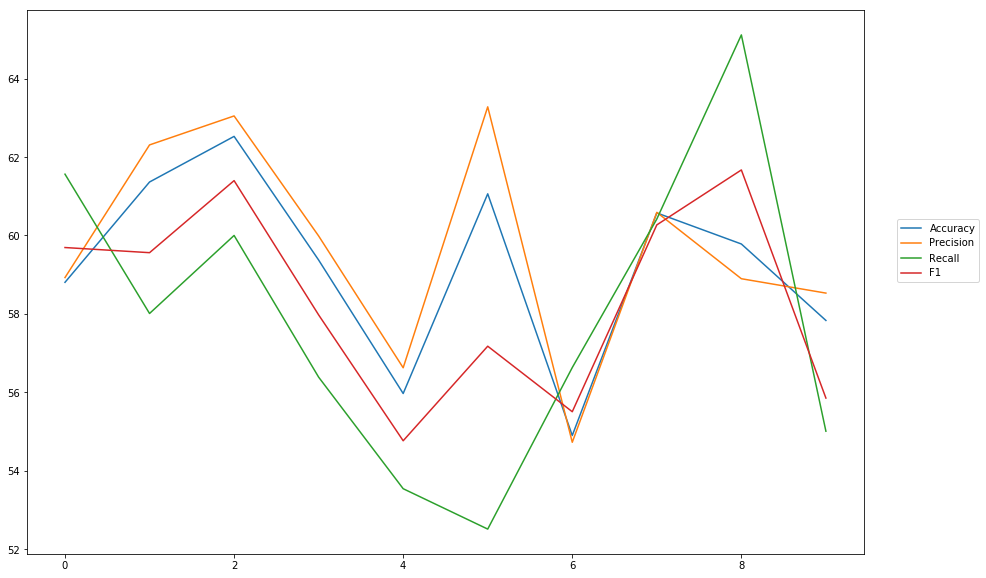

Accuracy: Mean = 59.22% (+/- 2.29%), Max = 62.53%, Min =  54.90%
Precision: Mean = 59.69% (+/- 2.62%), Max = 63.28%, Min =  54.73%
Recall: Mean = 57.92% (+/- 3.69%), Max = 65.11%, Min =  52.51%
F1: Mean = 58.39% (+/- 2.37%), Max = 61.67%, Min =  54.77%


In [11]:
cross_val(model, EPOCHS, 32, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_32')


-----Fold 1--------


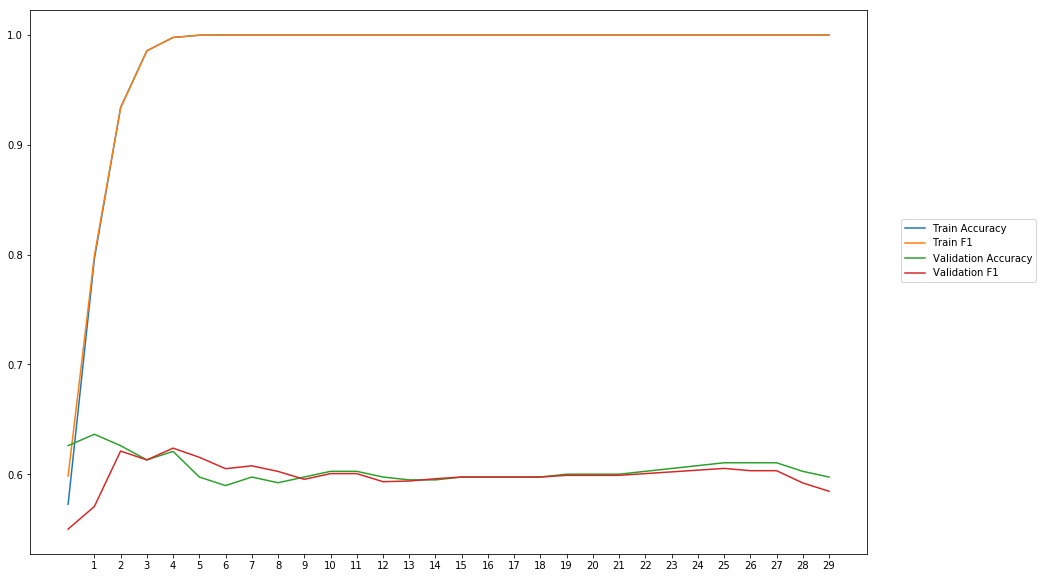

Average Accuracy: 60.42%
Average Precision: 60.71%
Average Recall: 59.39%
Average F1: 59.90%

-----Fold 2--------


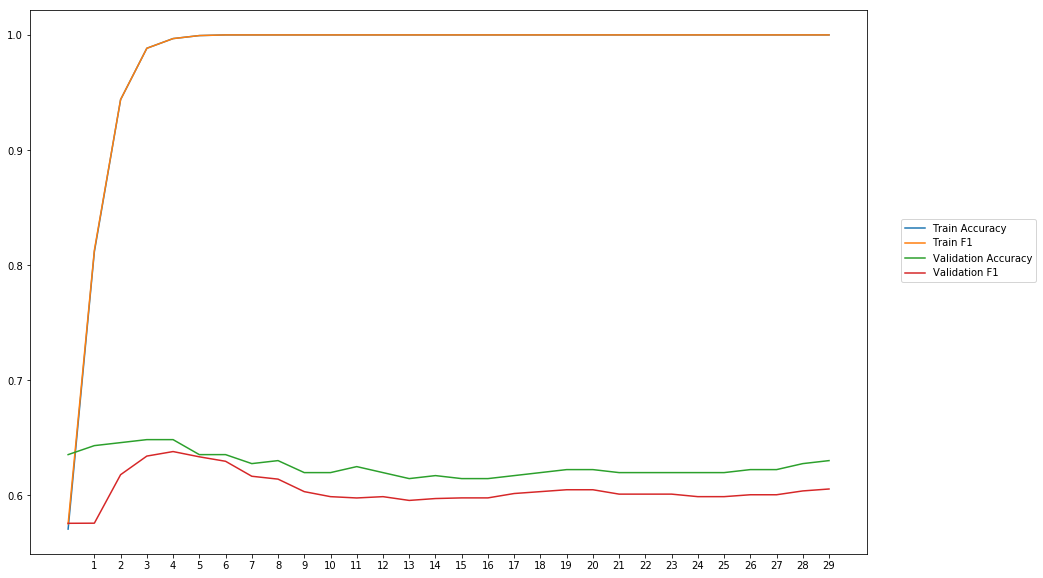

Average Accuracy: 62.60%
Average Precision: 63.79%
Average Recall: 57.66%
Average F1: 60.50%

-----Fold 3--------


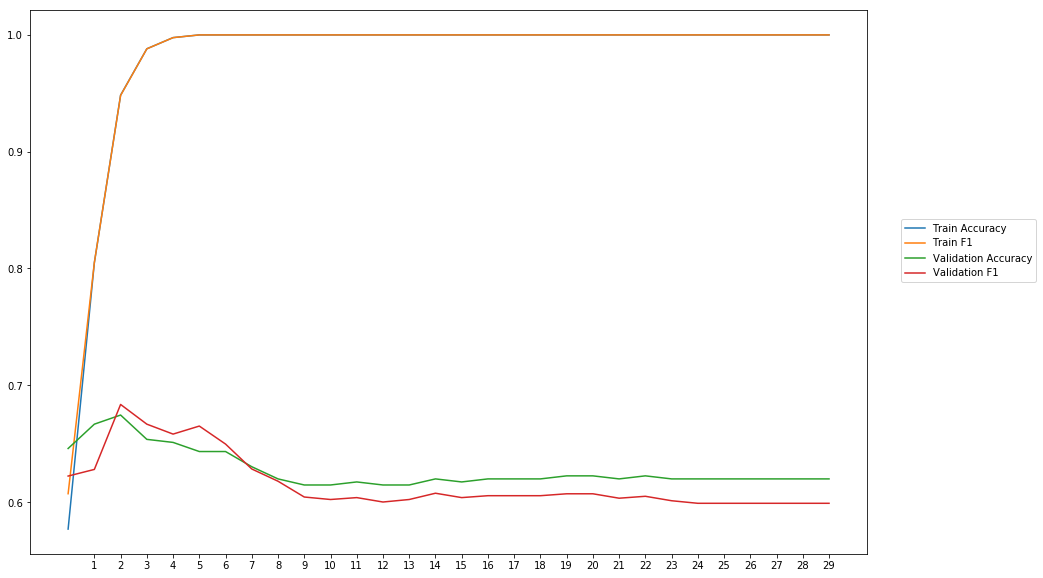

Average Accuracy: 62.75%
Average Precision: 63.21%
Average Recall: 60.19%
Average F1: 61.59%

-----Fold 4--------


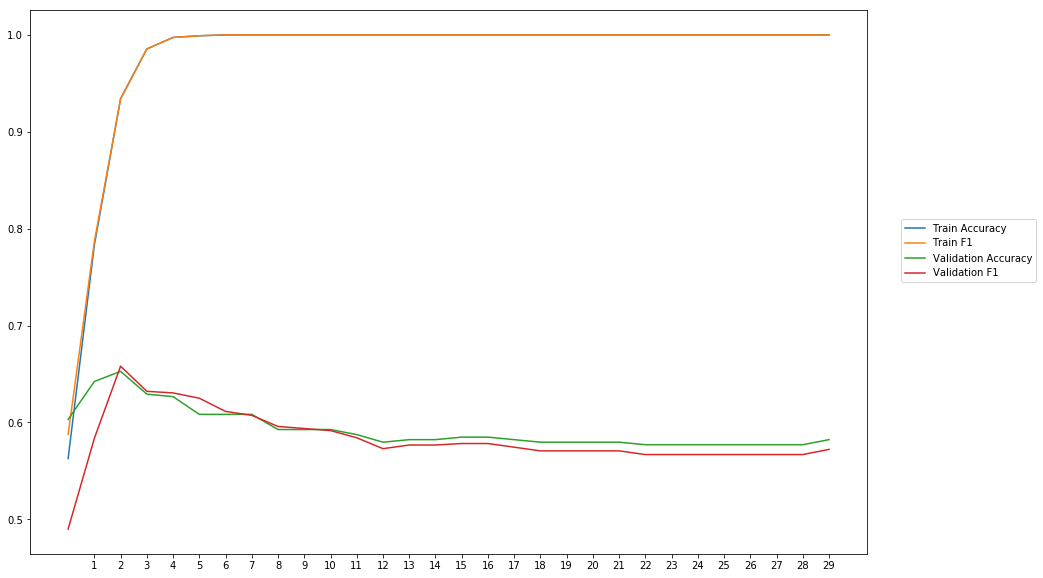

Average Accuracy: 59.27%
Average Precision: 59.70%
Average Recall: 57.28%
Average F1: 58.28%

-----Fold 5--------


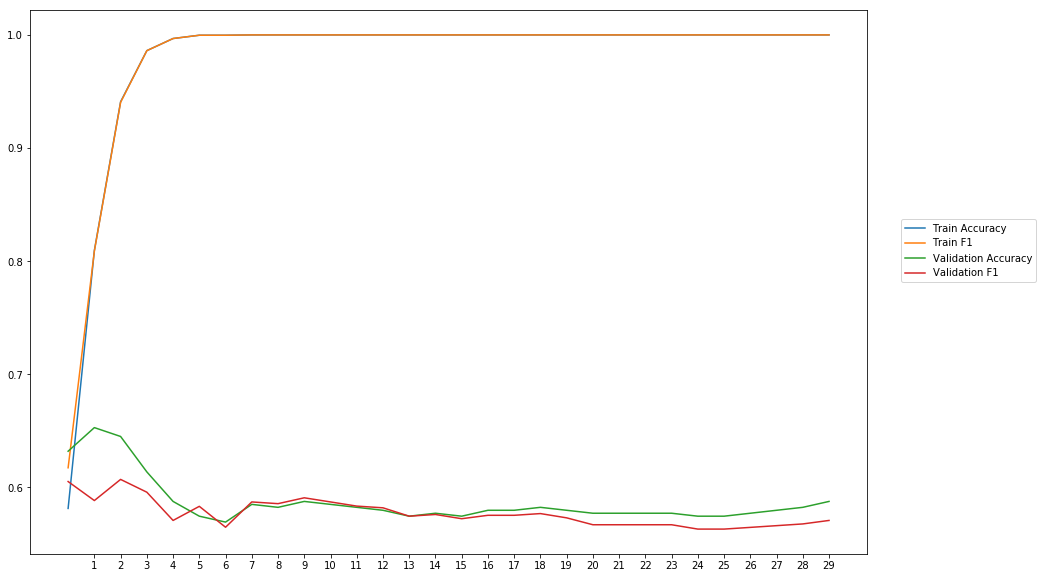

Average Accuracy: 58.69%
Average Precision: 59.16%
Average Recall: 56.51%
Average F1: 57.71%

-----Fold 6--------


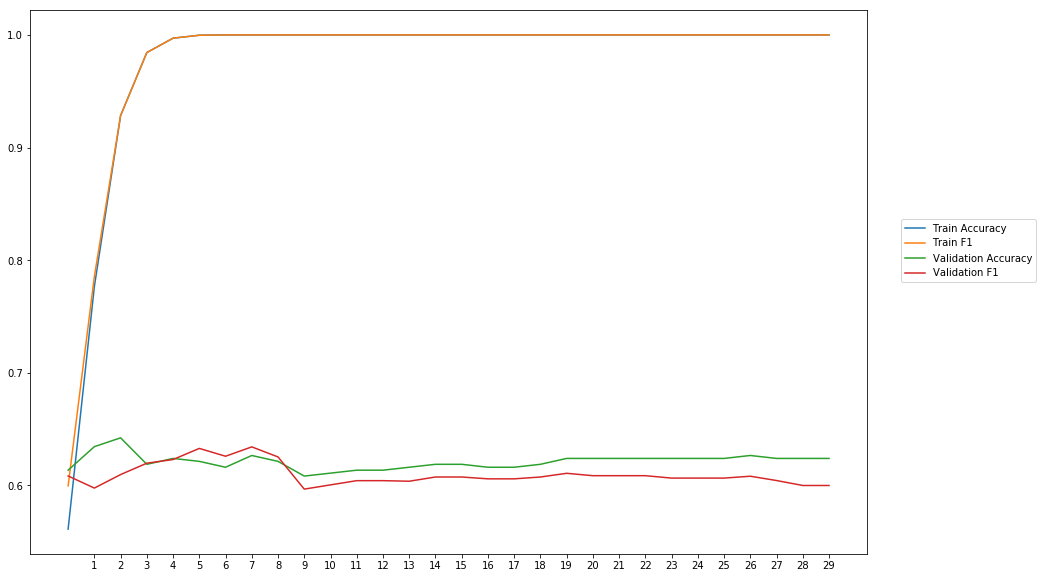

Average Accuracy: 62.12%
Average Precision: 62.77%
Average Recall: 59.37%
Average F1: 60.97%

-----Fold 7--------


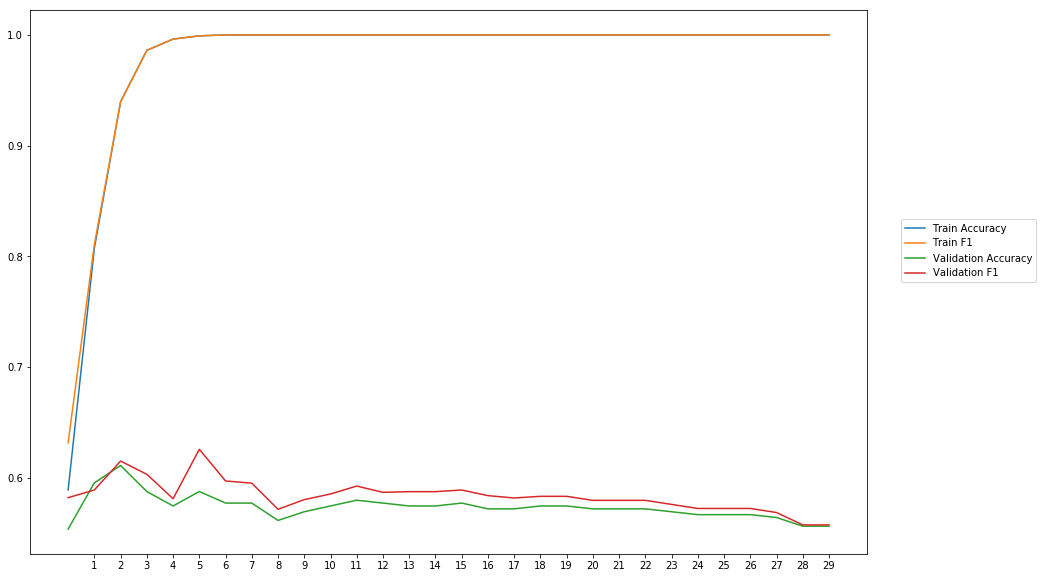

Average Accuracy: 57.35%
Average Precision: 56.86%
Average Recall: 60.02%
Average F1: 58.37%

-----Fold 8--------


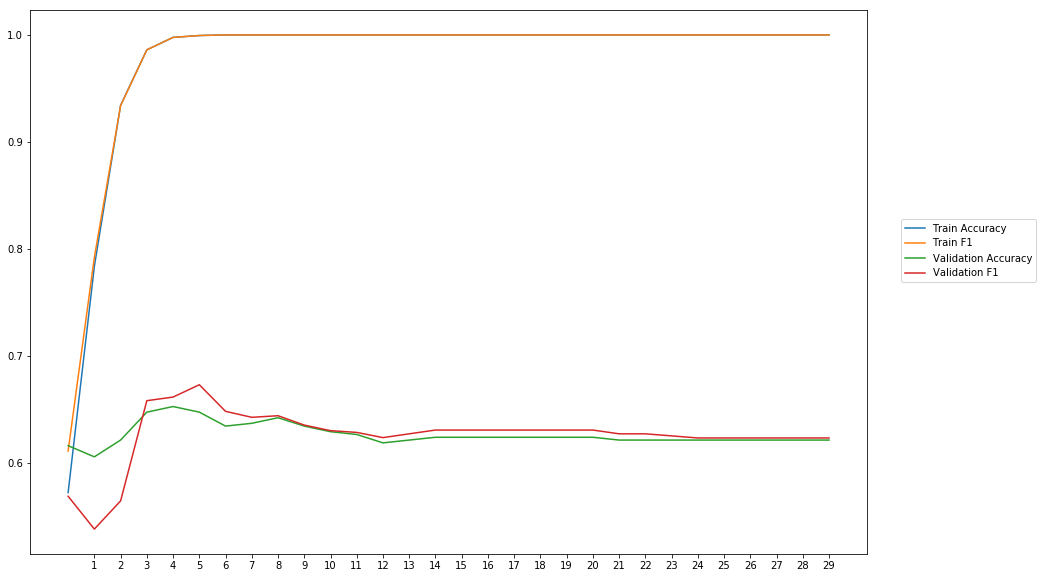

Average Accuracy: 62.65%
Average Precision: 62.52%
Average Recall: 62.98%
Average F1: 62.60%

-----Fold 9--------


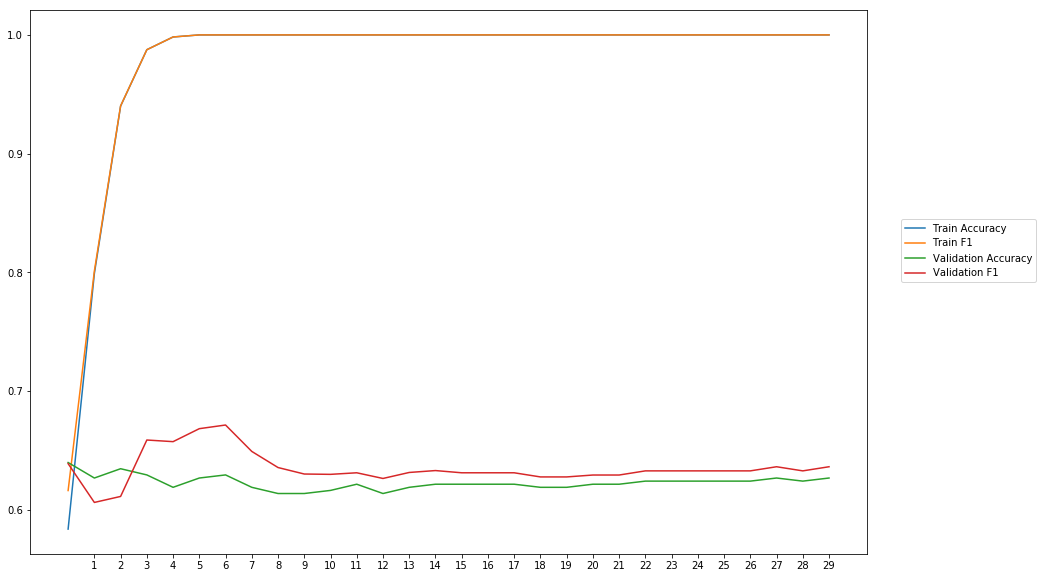

Average Accuracy: 62.28%
Average Precision: 61.40%
Average Recall: 65.95%
Average F1: 63.51%

-----Fold 10--------


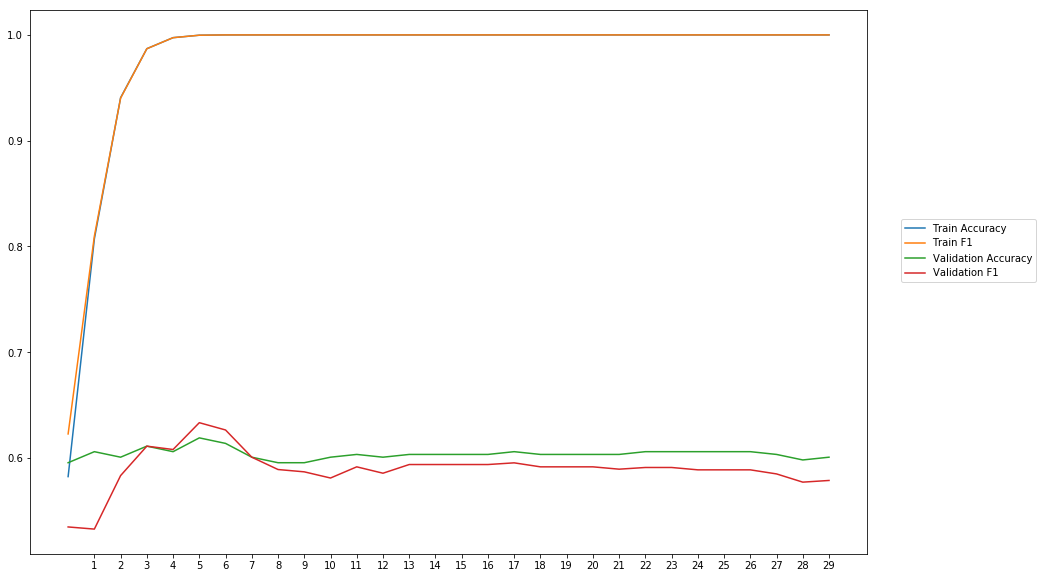

Average Accuracy: 60.36%
Average Precision: 60.97%
Average Recall: 57.23%
Average F1: 58.94%

-------Overallresults-------


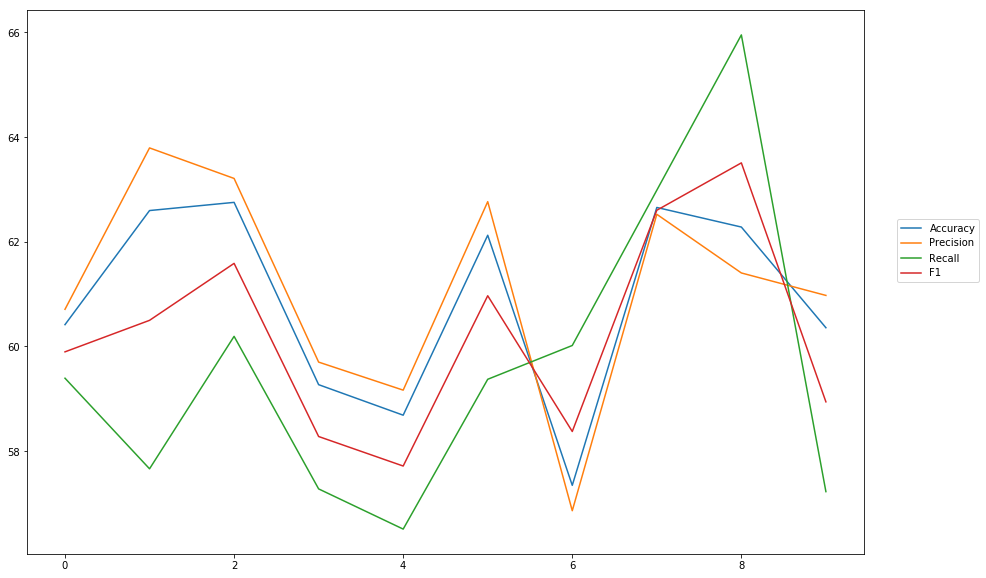

Accuracy: Mean = 60.85% (+/- 1.83%), Max = 62.75%, Min =  57.35%
Precision: Mean = 61.11% (+/- 2.01%), Max = 63.79%, Min =  56.86%
Recall: Mean = 59.66% (+/- 2.77%), Max = 65.95%, Min =  56.51%
F1: Mean = 60.24% (+/- 1.85%), Max = 63.51%, Min =  57.71%


In [12]:
cross_val(model, EPOCHS, 100, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_100')


-----Fold 1--------


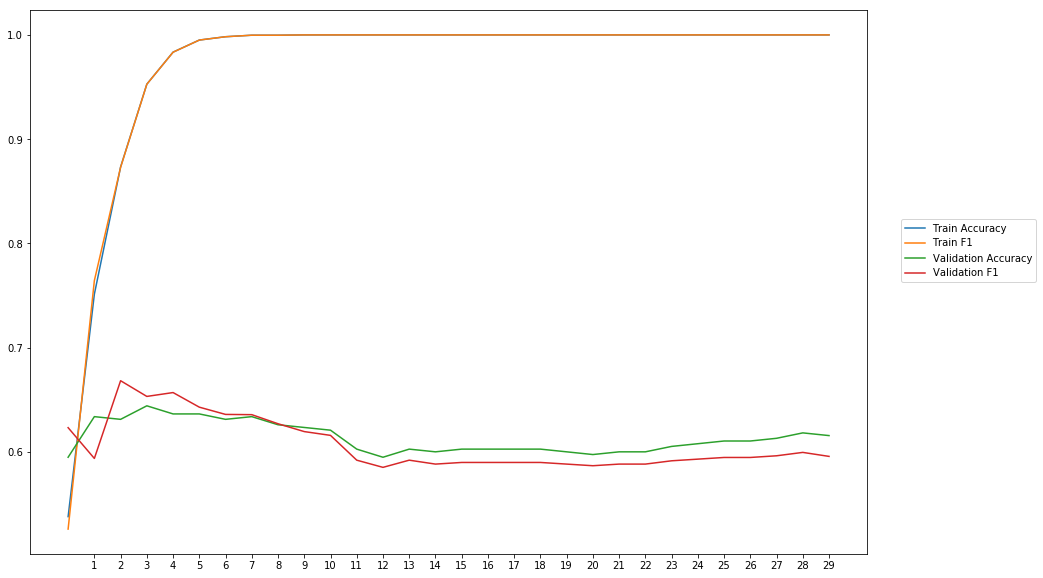

Average Accuracy: 61.33%
Average Precision: 61.54%
Average Recall: 60.03%
Average F1: 60.68%

-----Fold 2--------


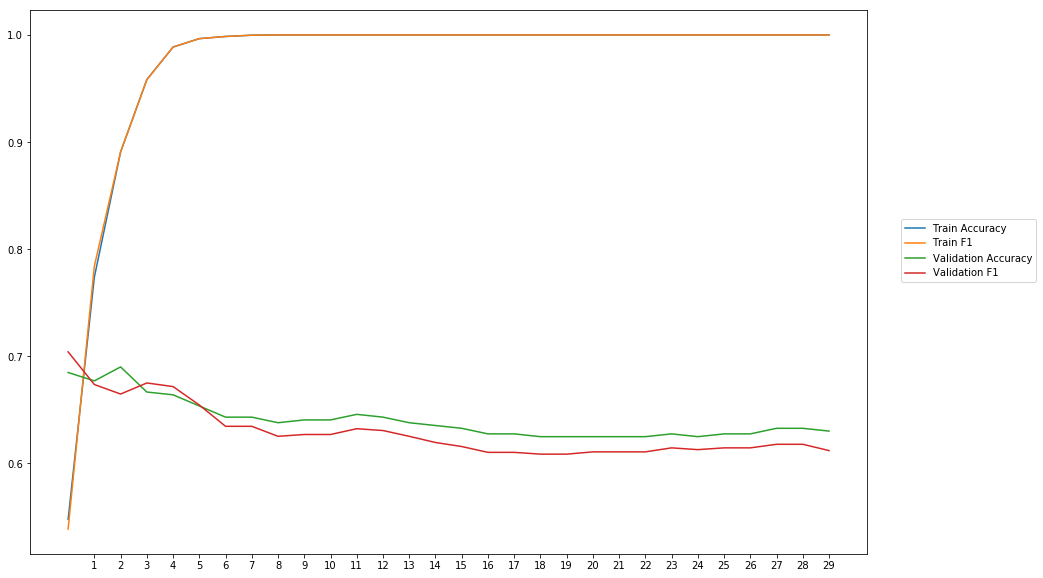

Average Accuracy: 64.07%
Average Precision: 64.55%
Average Recall: 61.55%
Average F1: 62.97%

-----Fold 3--------


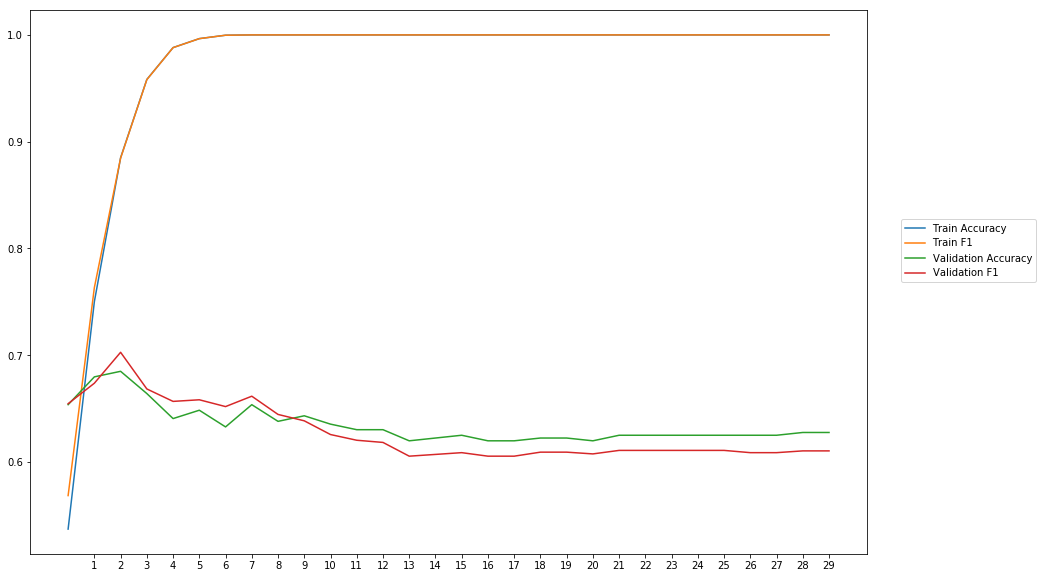

Average Accuracy: 63.45%
Average Precision: 63.57%
Average Recall: 62.08%
Average F1: 62.75%

-----Fold 4--------


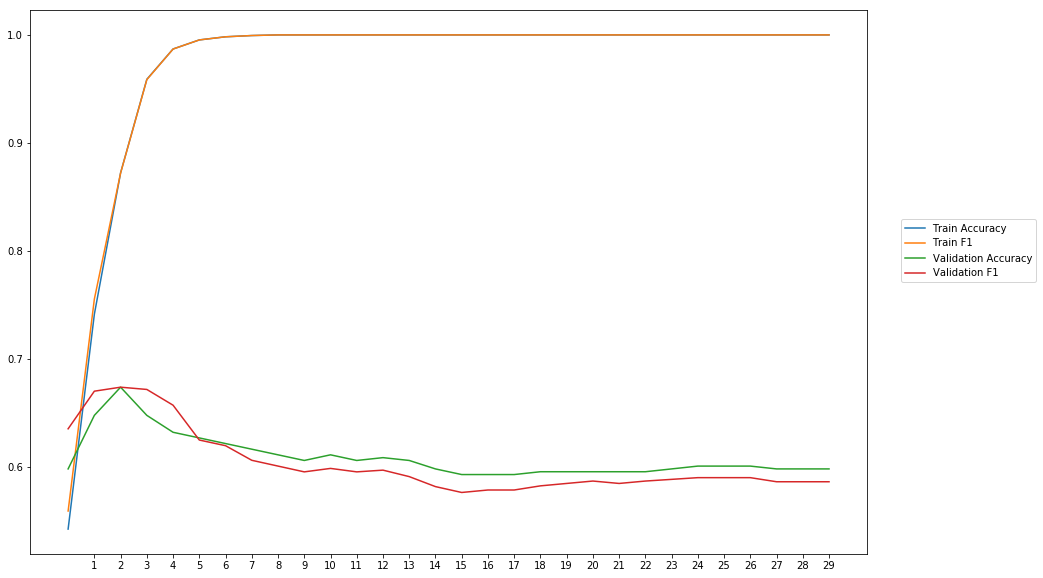

Average Accuracy: 60.85%
Average Precision: 60.93%
Average Recall: 59.83%
Average F1: 60.29%

-----Fold 5--------


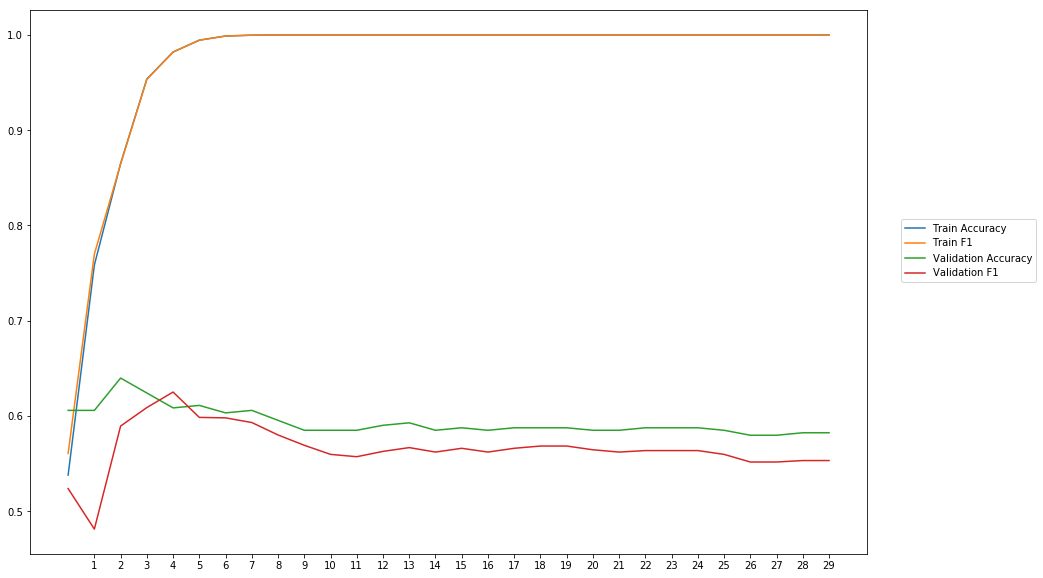

Average Accuracy: 59.32%
Average Precision: 60.63%
Average Recall: 53.49%
Average F1: 56.63%

-----Fold 6--------


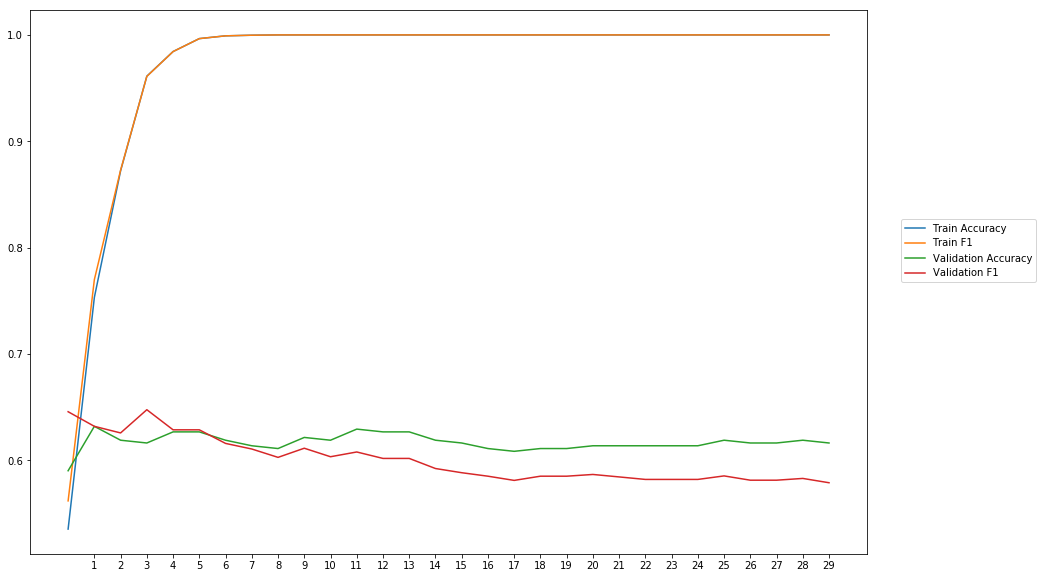

Average Accuracy: 61.69%
Average Precision: 62.67%
Average Recall: 57.91%
Average F1: 60.01%

-----Fold 7--------


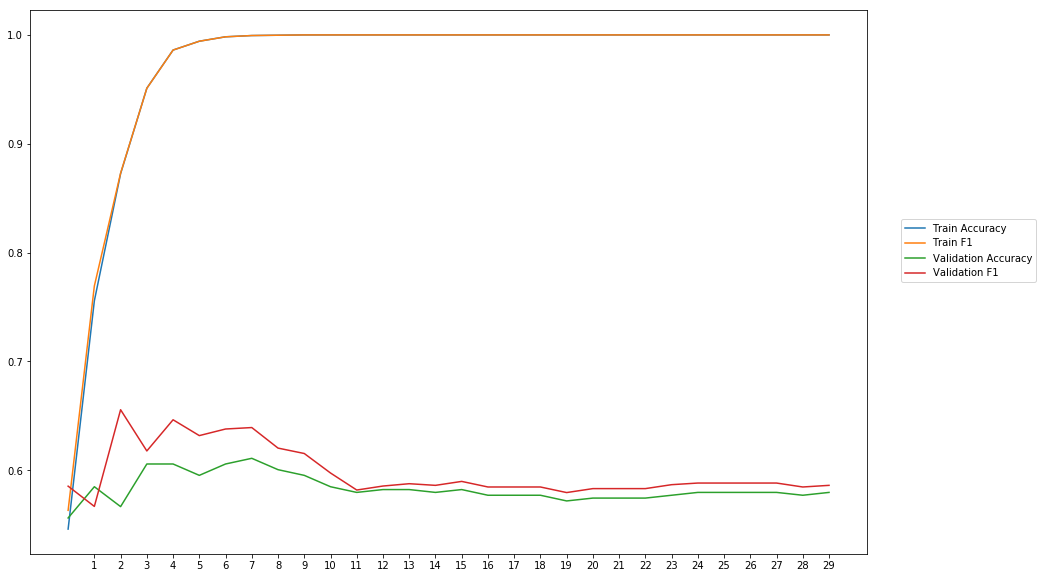

Average Accuracy: 58.32%
Average Precision: 57.62%
Average Recall: 62.39%
Average F1: 59.79%

-----Fold 8--------


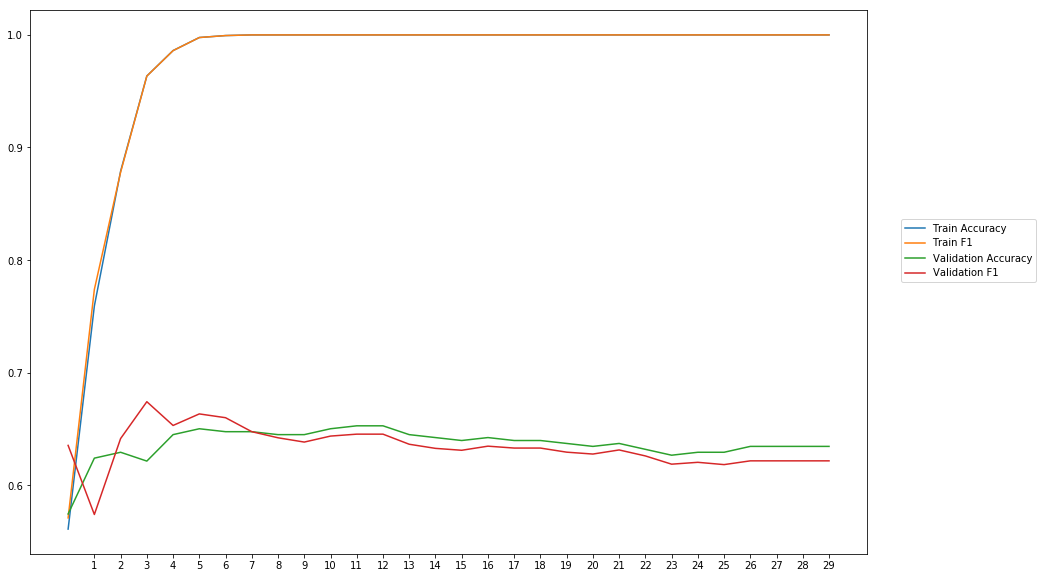

Average Accuracy: 63.66%
Average Precision: 63.81%
Average Recall: 63.32%
Average F1: 63.41%

-----Fold 9--------


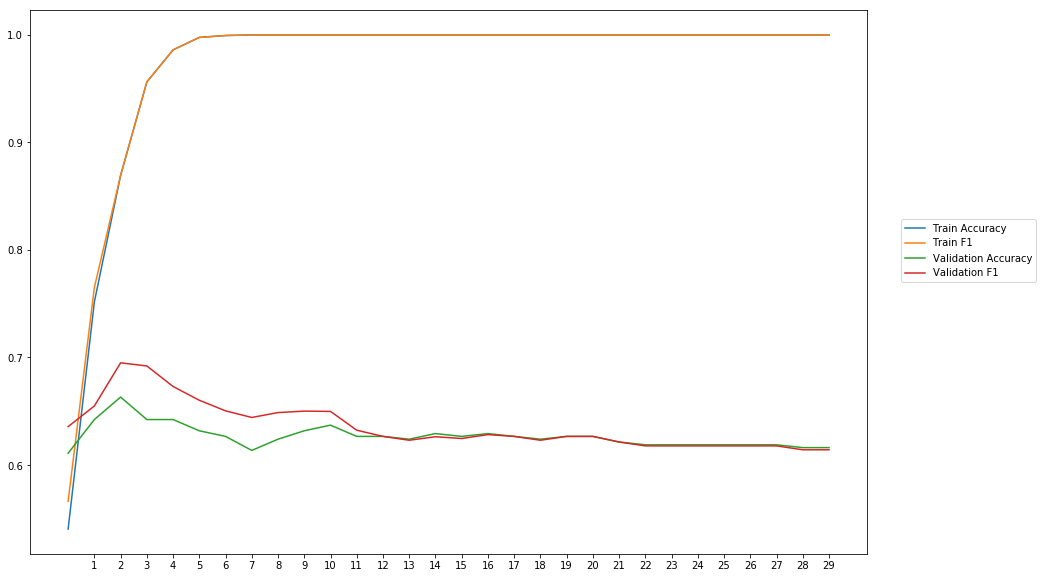

Average Accuracy: 62.66%
Average Precision: 61.88%
Average Recall: 65.60%
Average F1: 63.58%

-----Fold 10--------


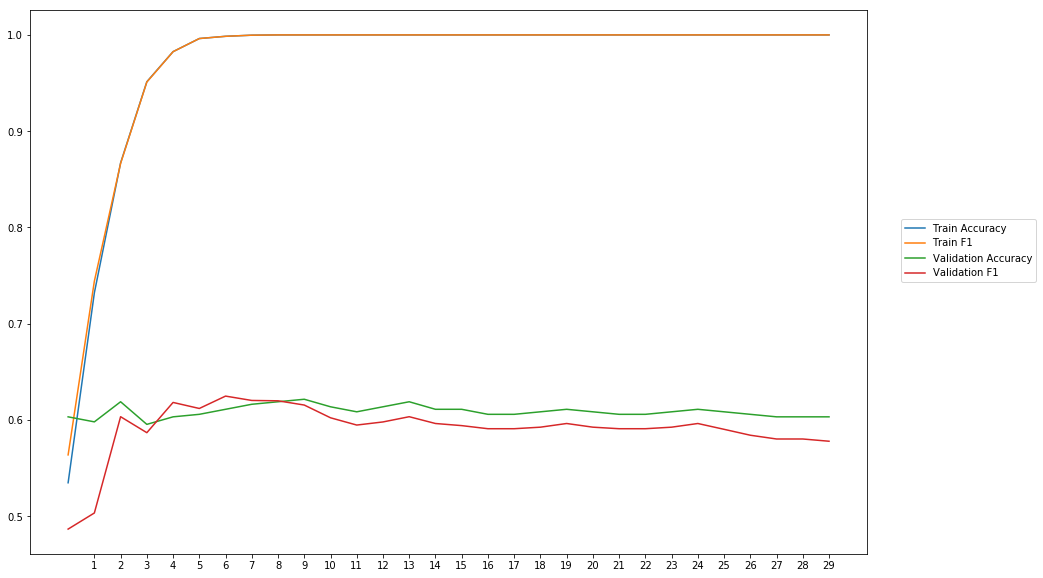

Average Accuracy: 60.87%
Average Precision: 61.82%
Average Recall: 56.98%
Average F1: 59.08%

-------Overallresults-------


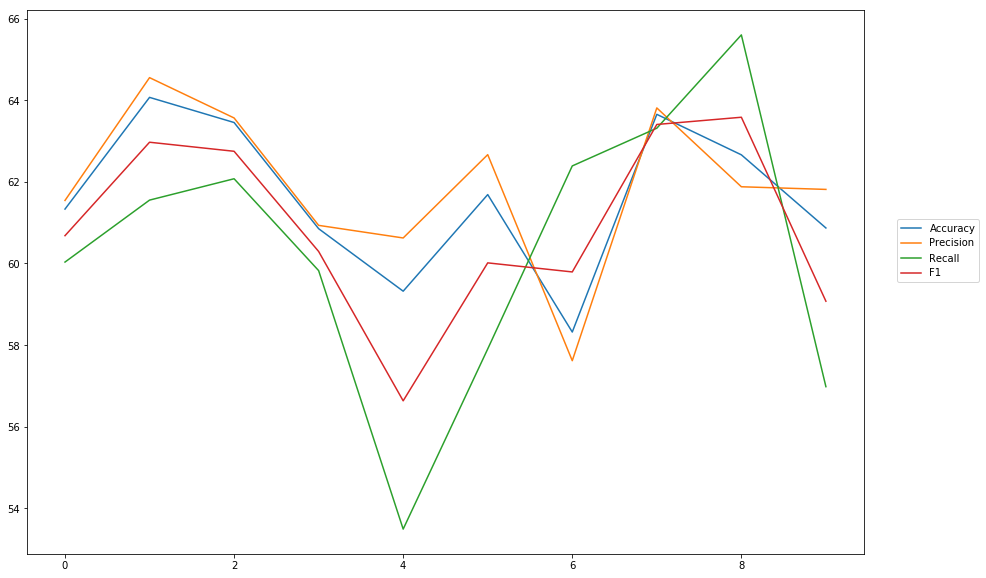

Accuracy: Mean = 61.62% (+/- 1.79%), Max = 64.07%, Min =  58.32%
Precision: Mean = 61.90% (+/- 1.87%), Max = 64.55%, Min =  57.62%
Recall: Mean = 60.32% (+/- 3.31%), Max = 65.60%, Min =  53.49%
F1: Mean = 60.92% (+/- 2.12%), Max = 63.58%, Min =  56.63%


In [13]:
cross_val(model, EPOCHS, 256, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_256')


-----Fold 1--------


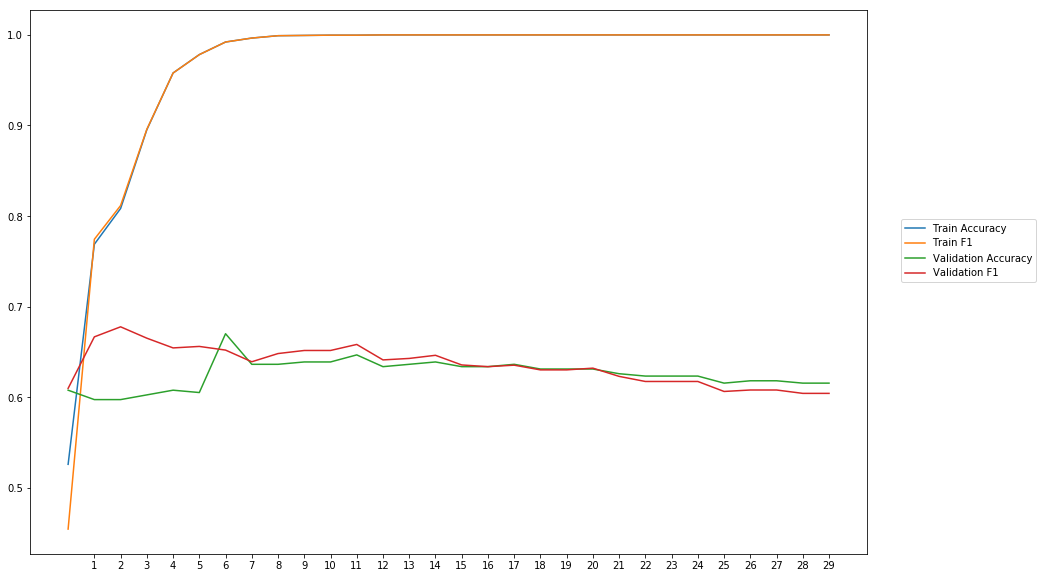

Average Accuracy: 62.57%
Average Precision: 62.00%
Average Recall: 65.75%
Average F1: 63.55%

-----Fold 2--------


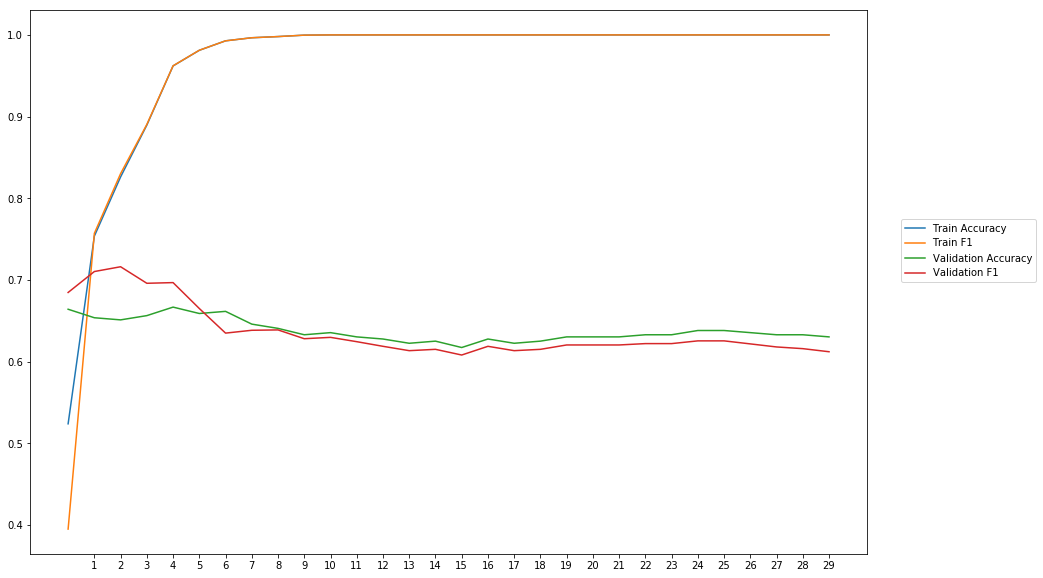

Average Accuracy: 63.76%
Average Precision: 63.50%
Average Recall: 64.28%
Average F1: 63.62%

-----Fold 3--------


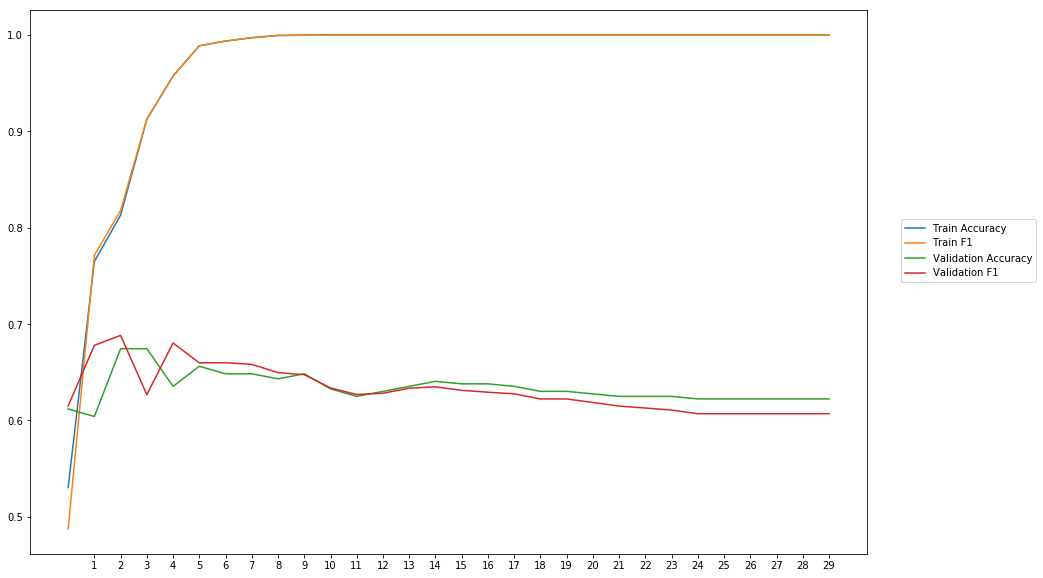

Average Accuracy: 63.39%
Average Precision: 63.34%
Average Recall: 63.42%
Average F1: 63.18%

-----Fold 4--------


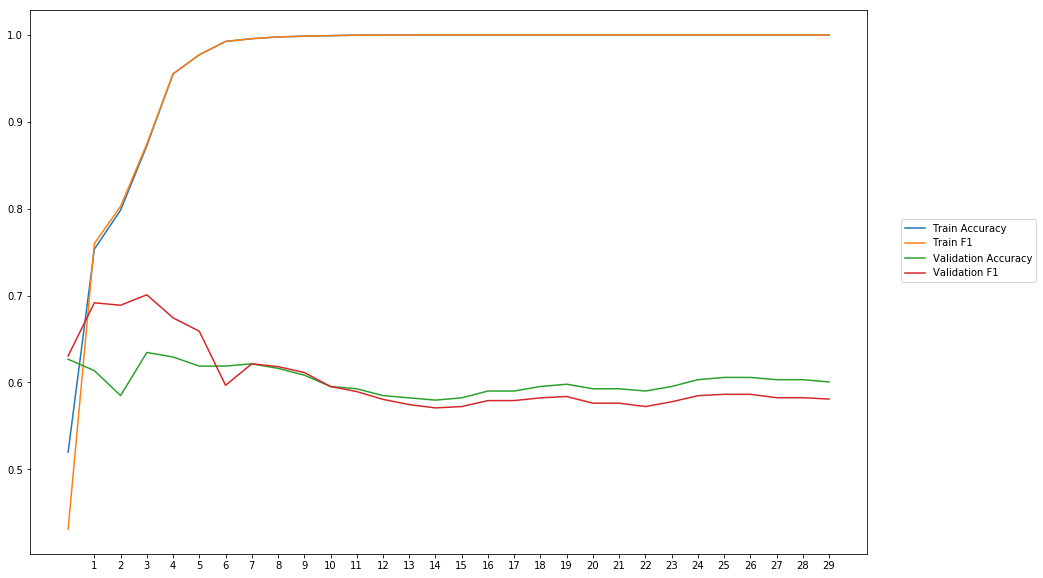

Average Accuracy: 60.18%
Average Precision: 59.96%
Average Recall: 61.64%
Average F1: 60.35%

-----Fold 5--------


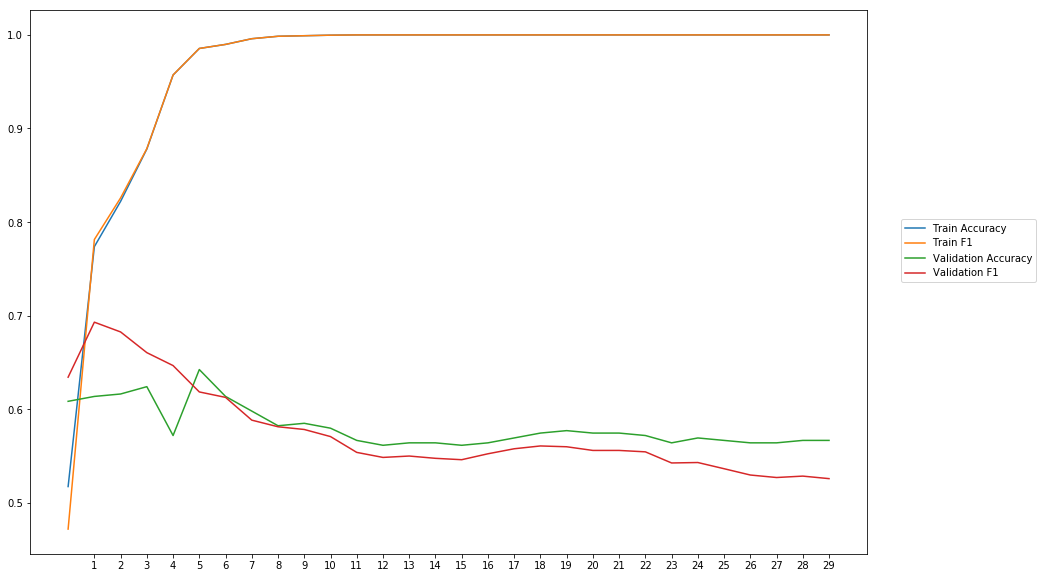

Average Accuracy: 58.06%
Average Precision: 58.03%
Average Recall: 57.66%
Average F1: 57.47%

-----Fold 6--------


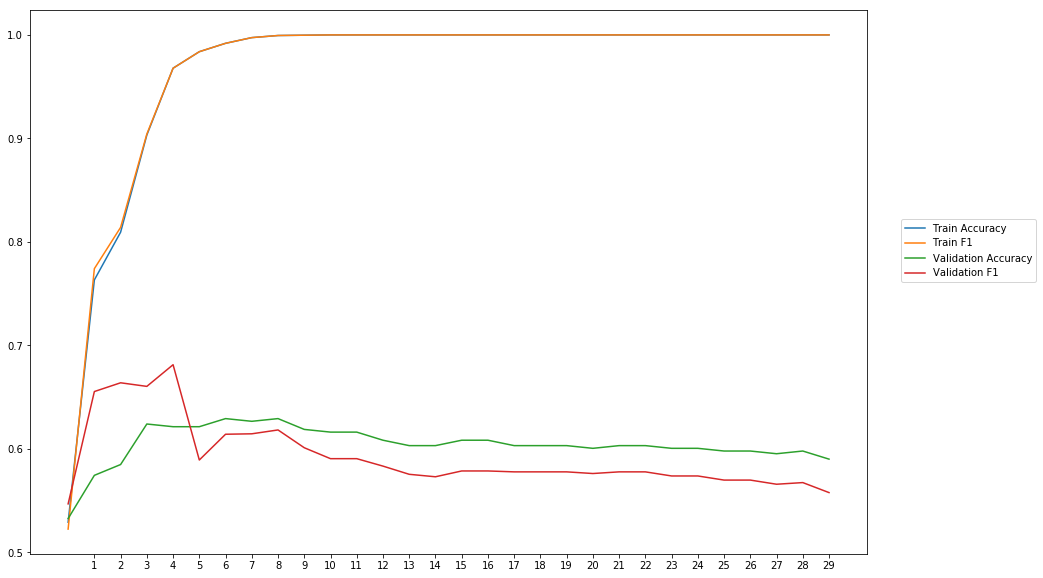

Average Accuracy: 60.41%
Average Precision: 61.10%
Average Recall: 58.18%
Average F1: 59.20%

-----Fold 7--------


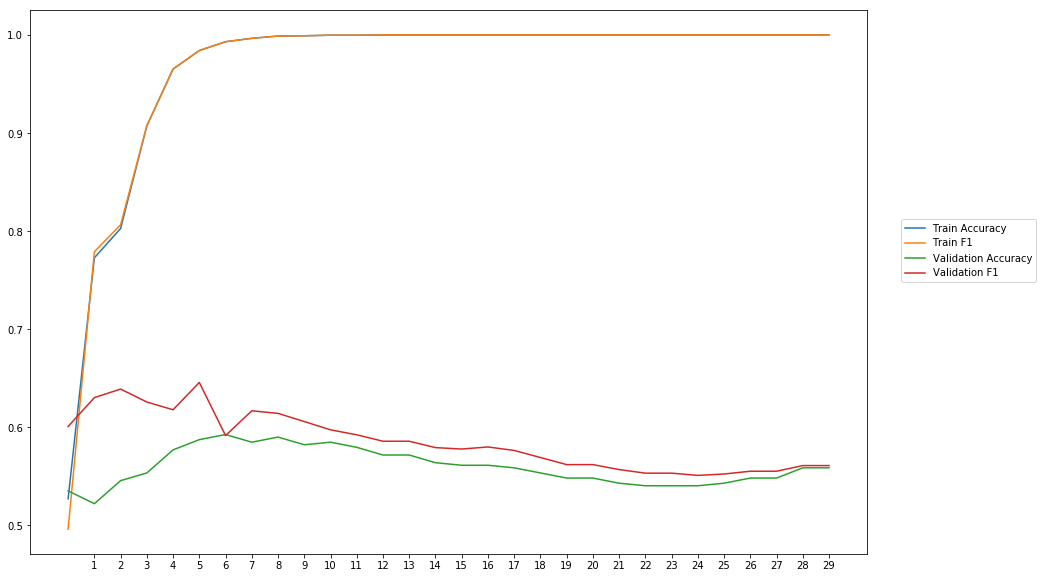

Average Accuracy: 55.99%
Average Precision: 55.28%
Average Recall: 62.65%
Average F1: 58.52%

-----Fold 8--------


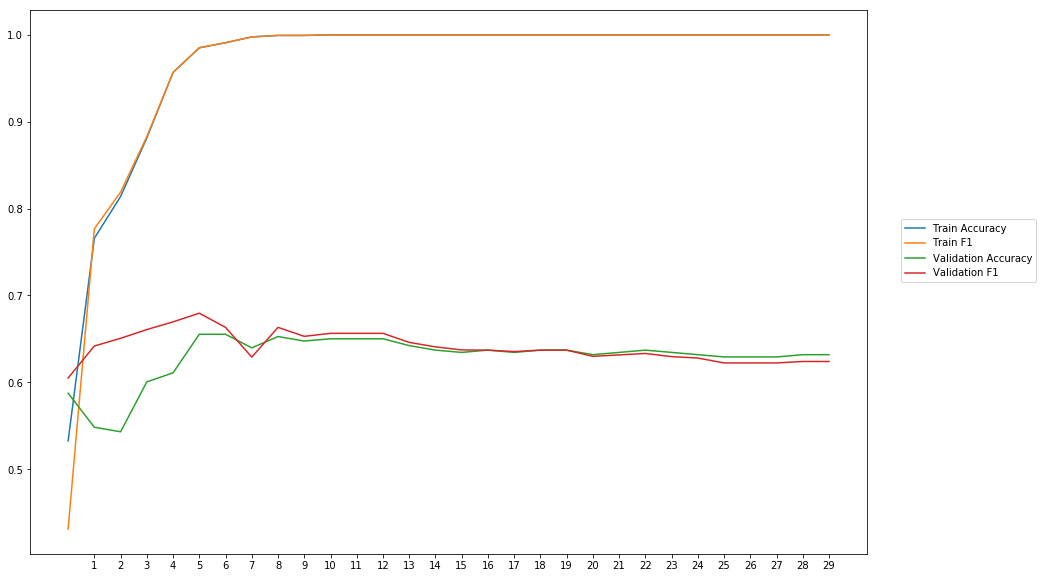

Average Accuracy: 62.91%
Average Precision: 62.37%
Average Recall: 66.51%
Average F1: 64.08%

-----Fold 9--------


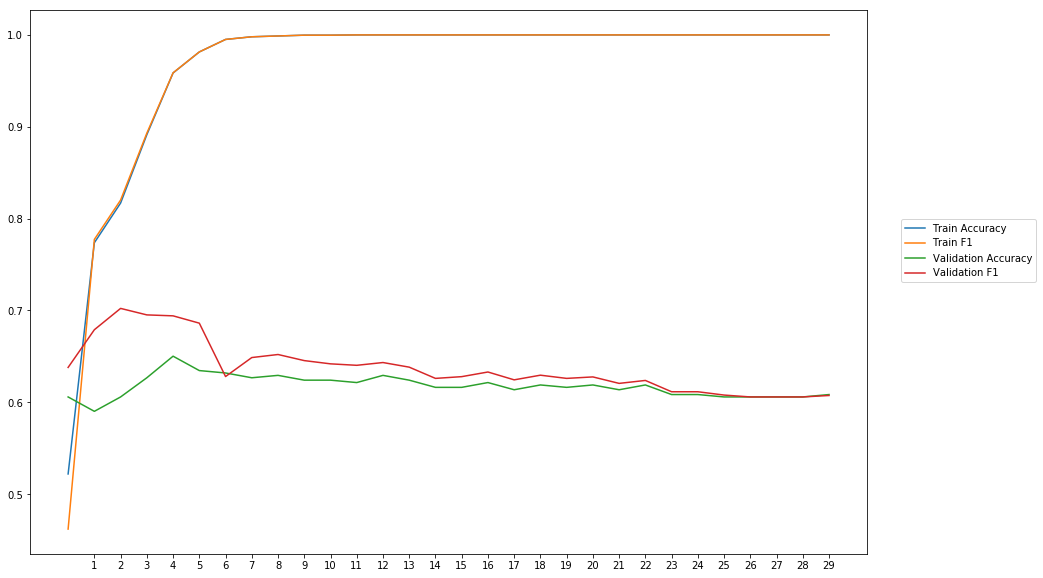

Average Accuracy: 61.75%
Average Precision: 60.50%
Average Recall: 68.01%
Average F1: 63.75%

-----Fold 10--------


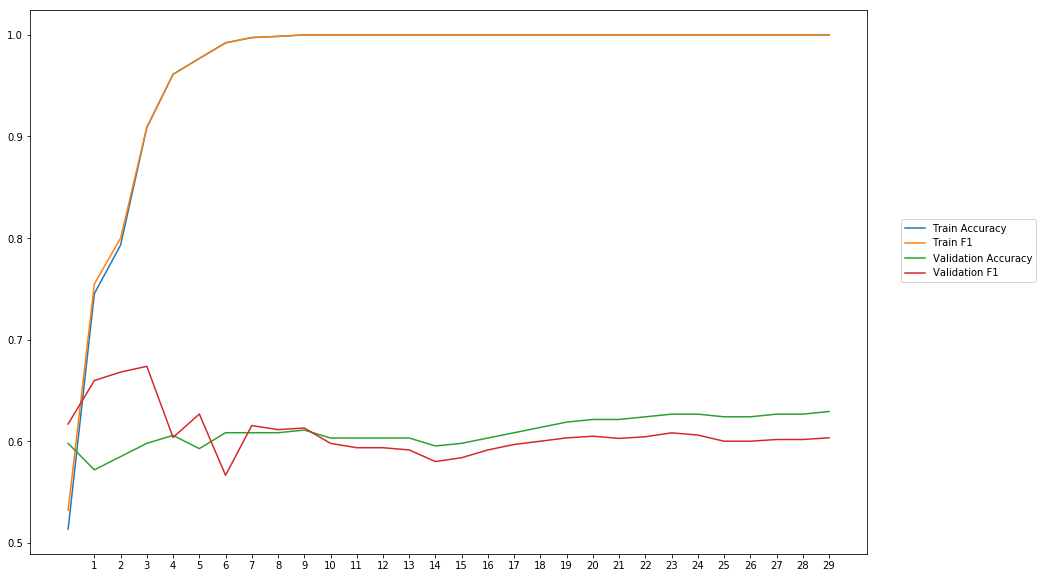

Average Accuracy: 60.96%
Average Precision: 61.24%
Average Recall: 61.03%
Average F1: 60.73%

-------Overallresults-------


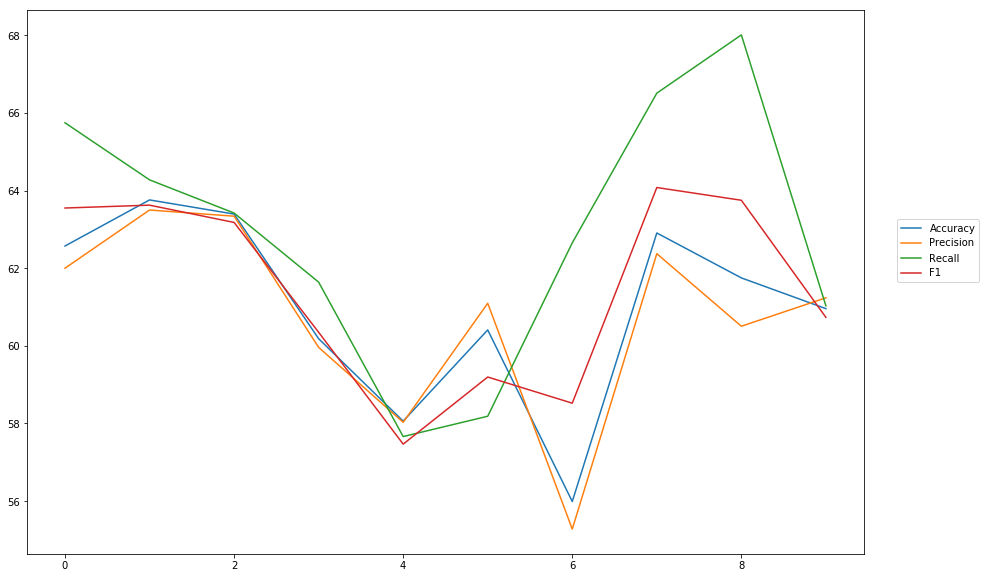

Accuracy: Mean = 61.00% (+/- 2.34%), Max = 63.76%, Min =  55.99%
Precision: Mean = 60.73% (+/- 2.38%), Max = 63.50%, Min =  55.28%
Recall: Mean = 62.91% (+/- 3.23%), Max = 68.01%, Min =  57.66%
F1: Mean = 61.44% (+/- 2.36%), Max = 64.08%, Min =  57.47%


In [20]:
cross_val(model, EPOCHS, 512, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_512')


-----Fold 1--------


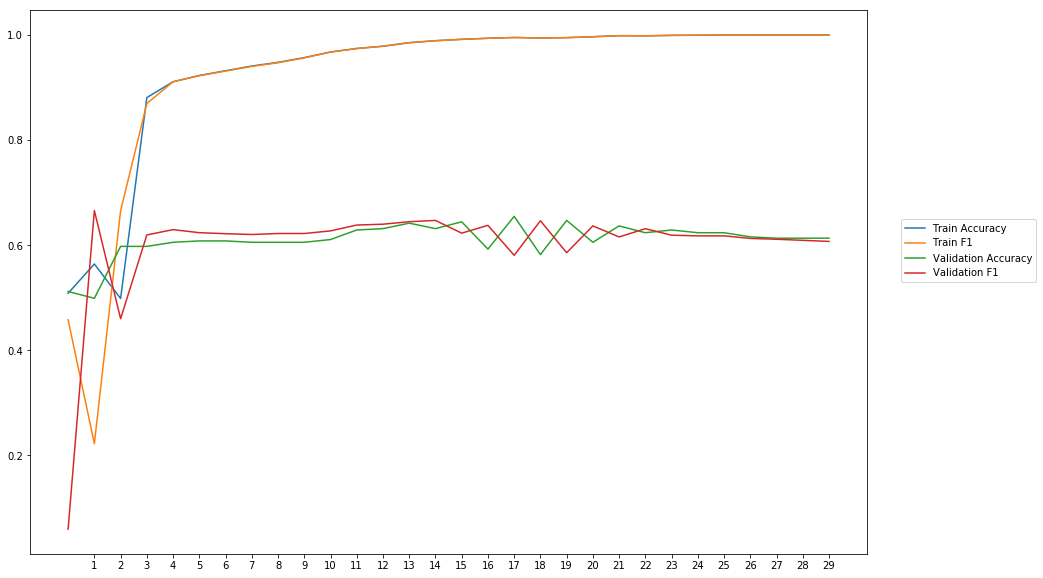

Average Accuracy: 61.00%
Average Precision: 62.13%
Average Recall: 61.55%
Average F1: 59.95%

-----Fold 2--------


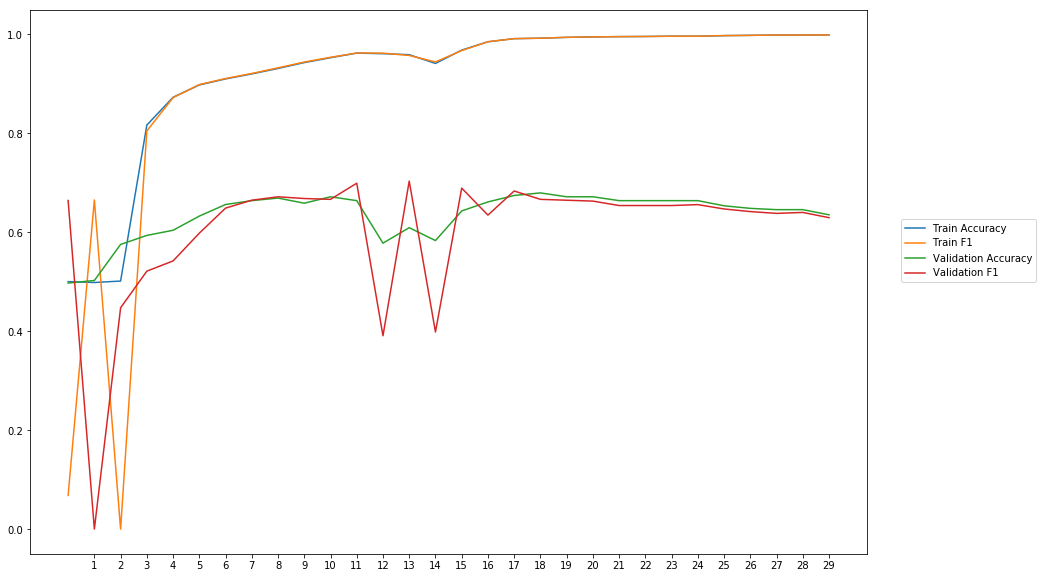

Average Accuracy: 63.50%
Average Precision: 62.91%
Average Recall: 60.59%
Average F1: 60.35%

-----Fold 3--------


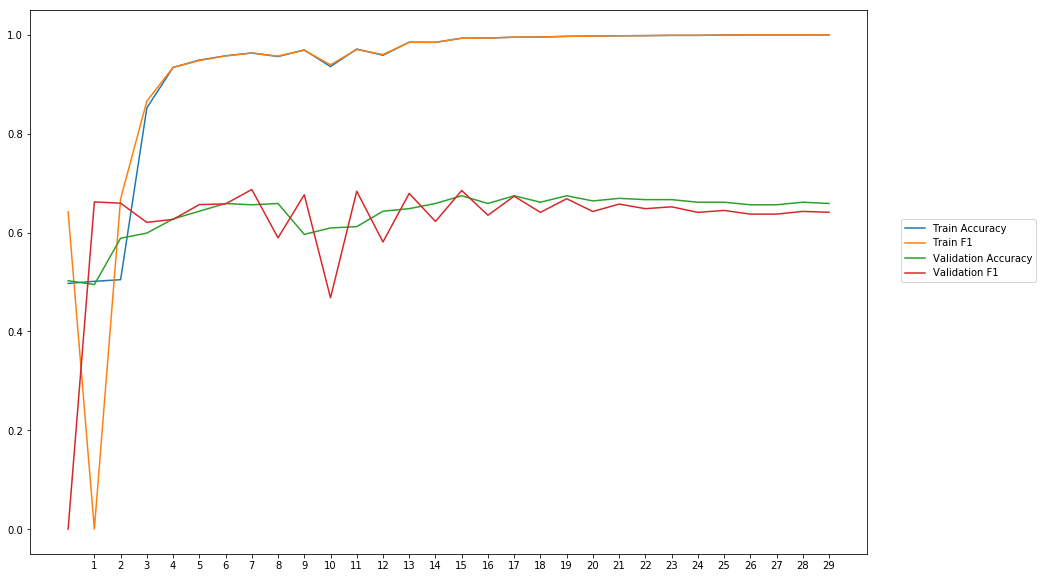

Average Accuracy: 63.88%
Average Precision: 63.07%
Average Recall: 63.12%
Average F1: 62.06%

-----Fold 4--------


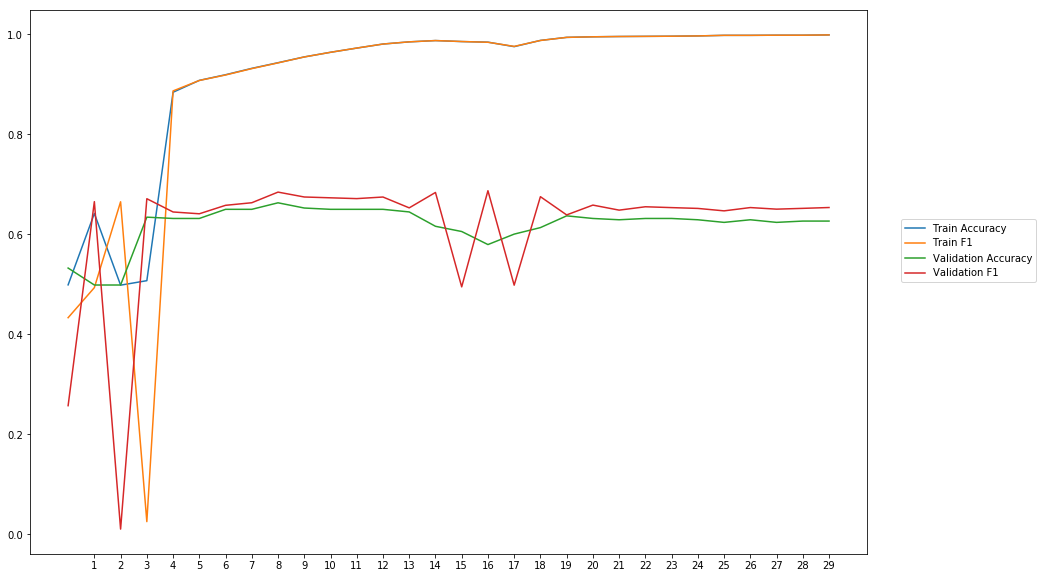

Average Accuracy: 61.92%
Average Precision: 60.65%
Average Recall: 66.32%
Average F1: 61.49%

-----Fold 5--------


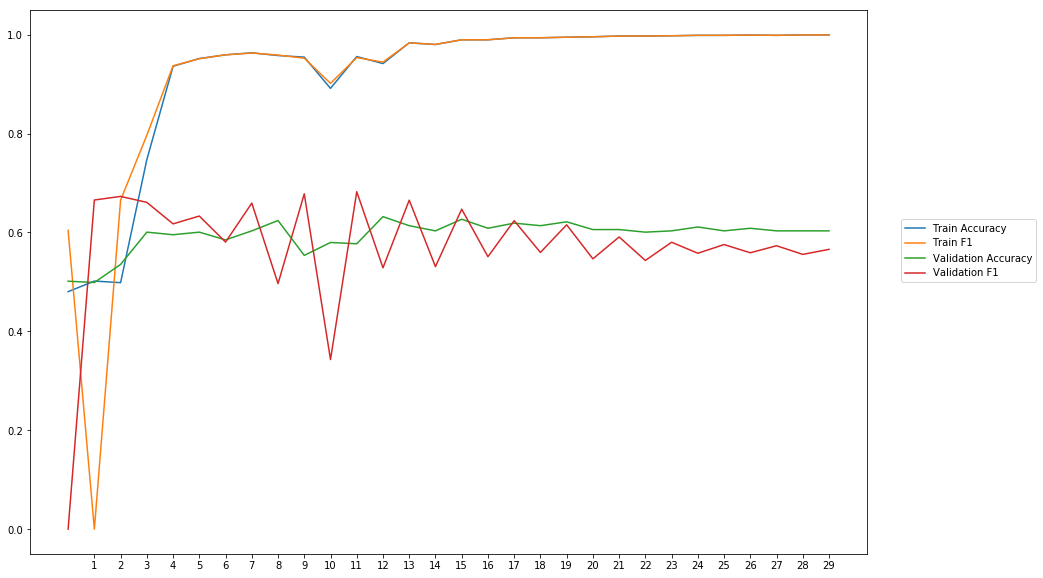

Average Accuracy: 59.46%
Average Precision: 59.64%
Average Recall: 58.53%
Average F1: 56.86%

-----Fold 6--------


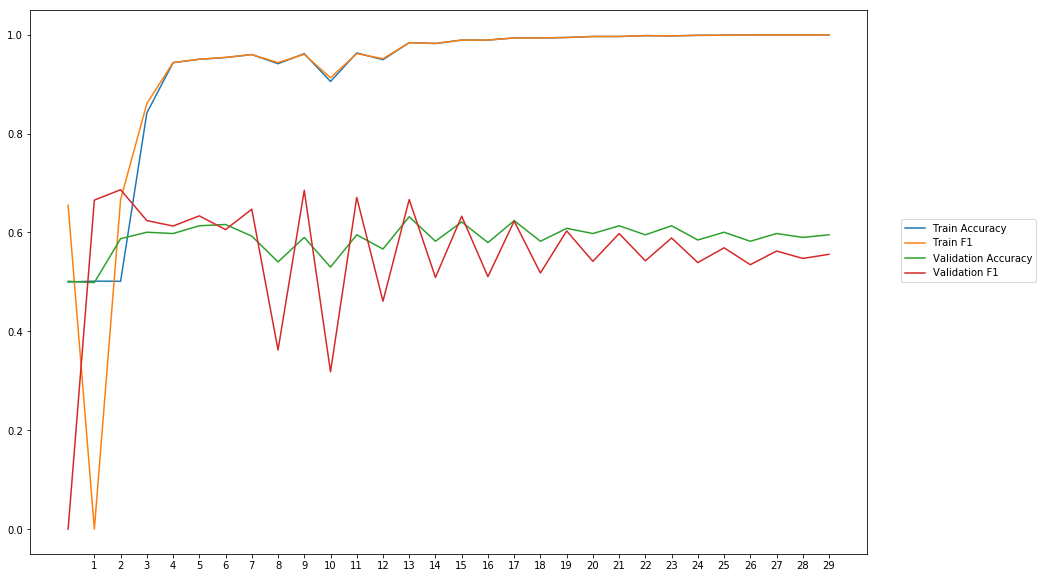

Average Accuracy: 58.77%
Average Precision: 57.85%
Average Recall: 56.14%
Average F1: 55.39%

-----Fold 7--------


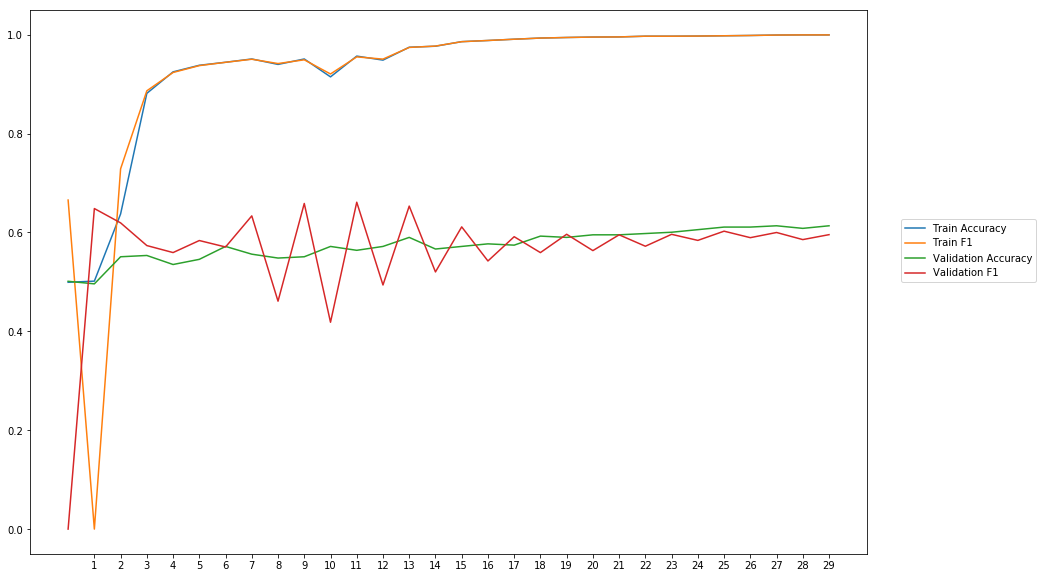

Average Accuracy: 57.44%
Average Precision: 56.10%
Average Recall: 58.36%
Average F1: 56.14%

-----Fold 8--------


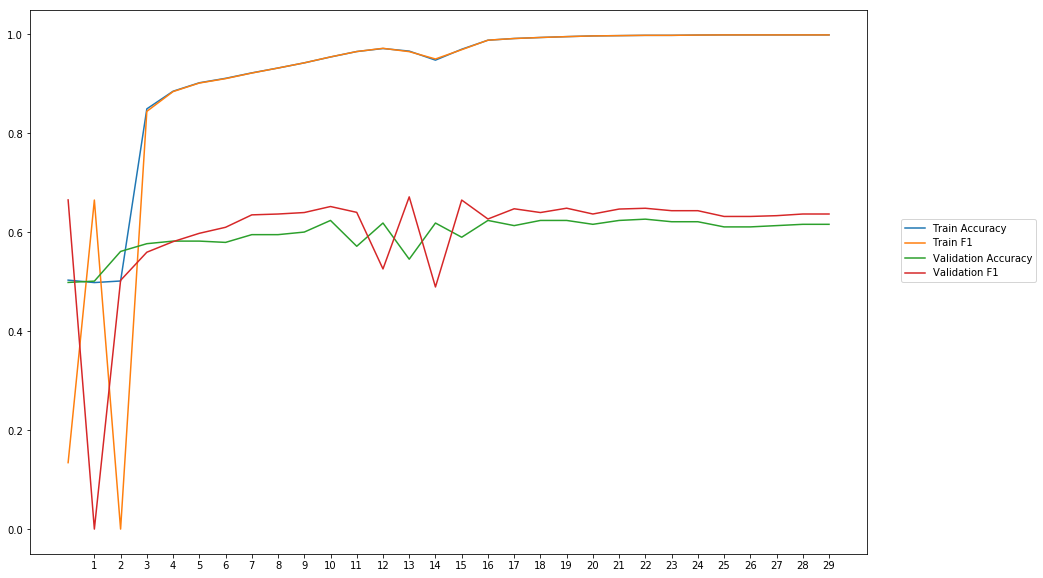

Average Accuracy: 59.69%
Average Precision: 57.54%
Average Recall: 64.97%
Average F1: 60.10%

-----Fold 9--------


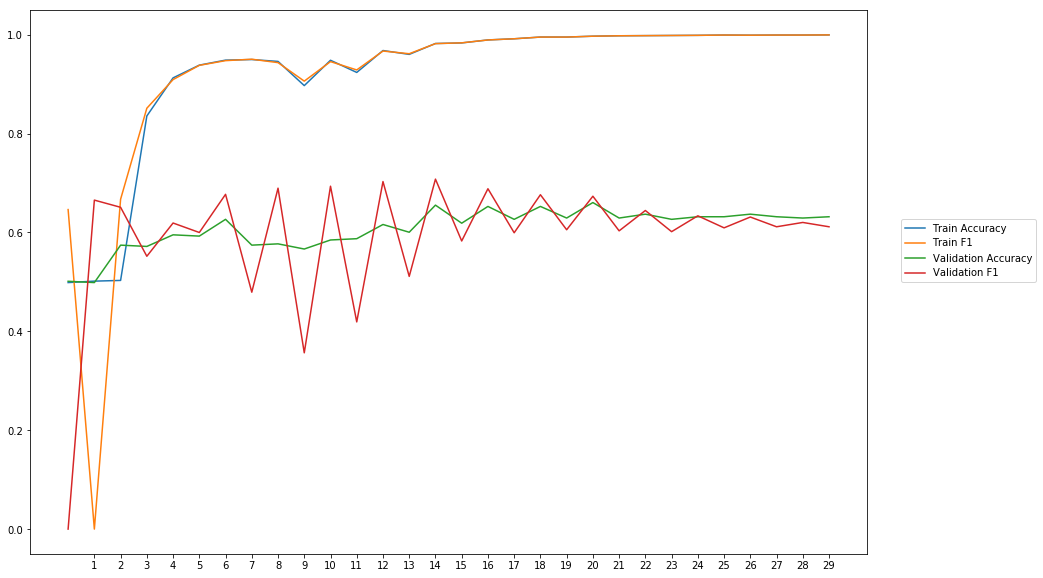

Average Accuracy: 60.84%
Average Precision: 59.75%
Average Recall: 62.09%
Average F1: 59.06%

-----Fold 10--------


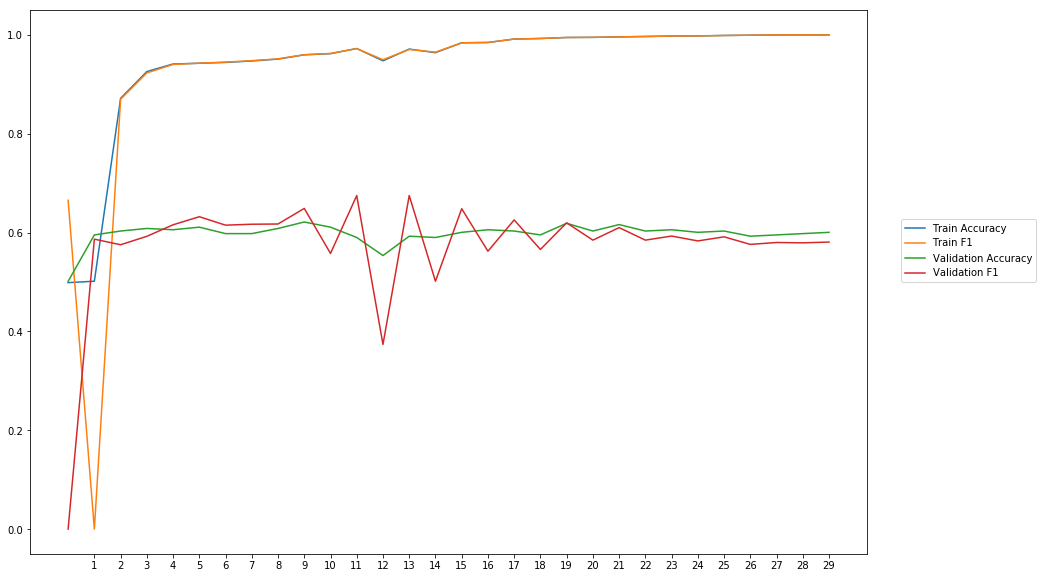

Average Accuracy: 59.77%
Average Precision: 58.46%
Average Recall: 57.38%
Average F1: 57.23%

-------Overallresults-------


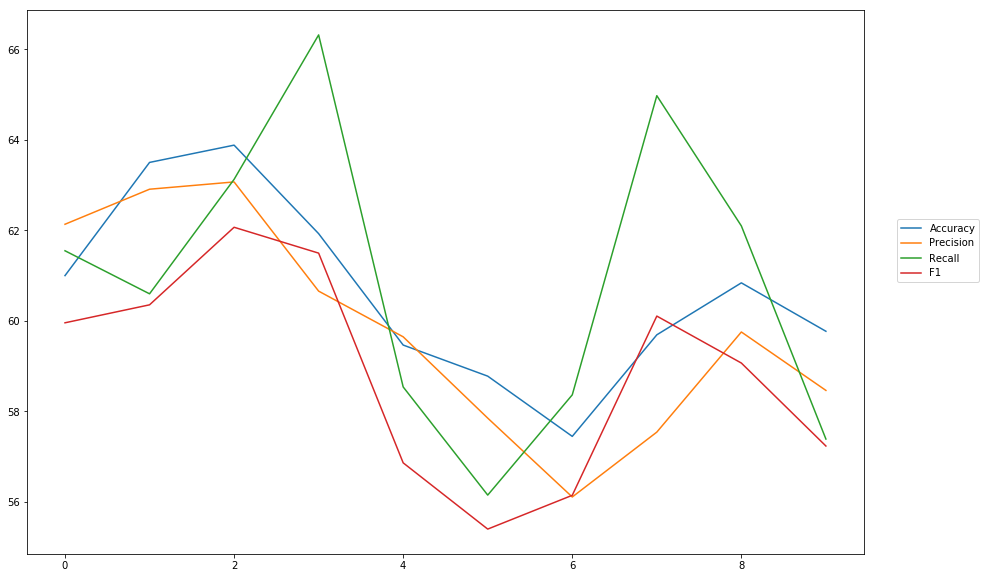

Accuracy: Mean = 60.63% (+/- 1.93%), Max = 63.88%, Min =  57.44%
Precision: Mean = 59.81% (+/- 2.26%), Max = 63.07%, Min =  56.10%
Recall: Mean = 60.91% (+/- 3.16%), Max = 66.32%, Min =  56.14%
F1: Mean = 58.86% (+/- 2.20%), Max = 62.06%, Min =  55.39%


In [16]:
cross_val(model, EPOCHS, 3451, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_3451')


-----Fold 1--------


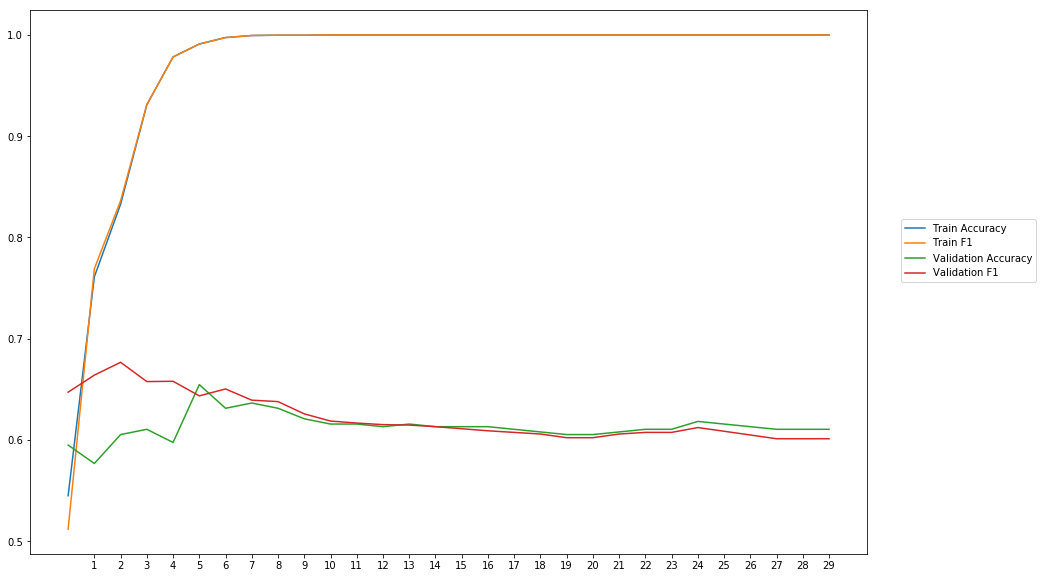

Average Accuracy: 61.31%
Average Precision: 60.82%
Average Recall: 64.24%
Average F1: 62.21%

-----Fold 2--------


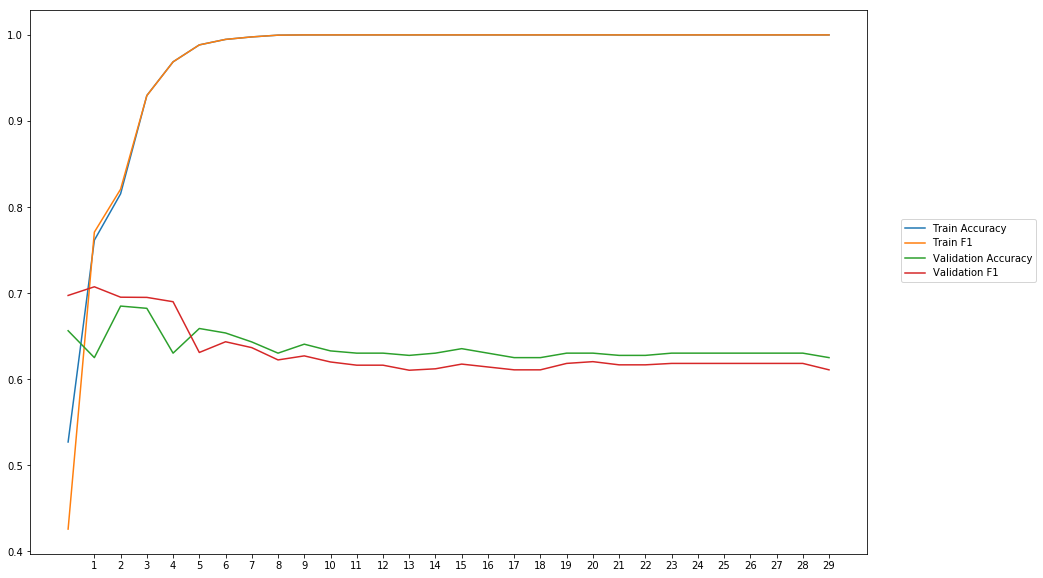

Average Accuracy: 63.65%
Average Precision: 63.68%
Average Recall: 63.33%
Average F1: 63.22%

-----Fold 3--------


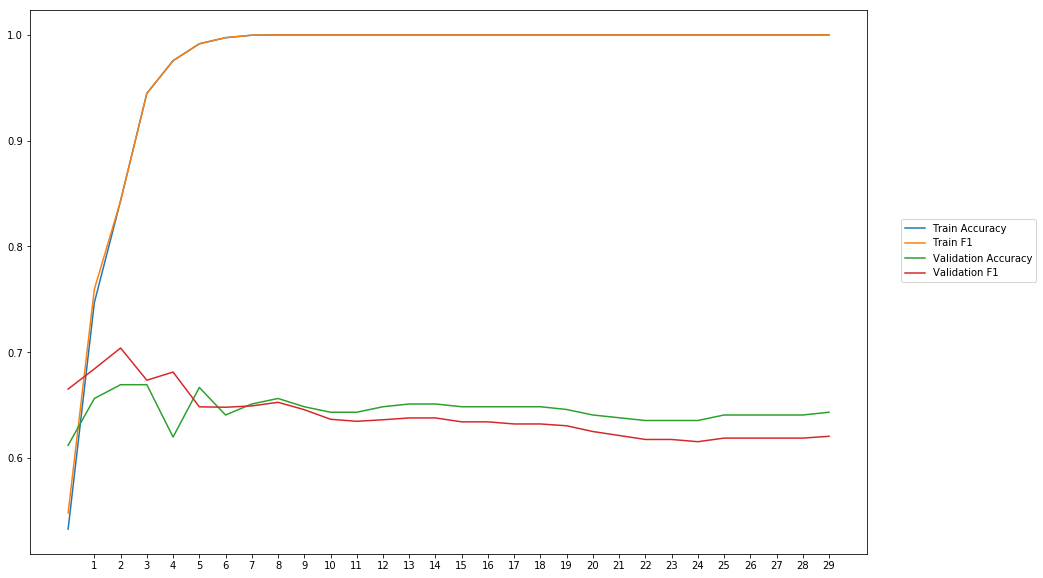

Average Accuracy: 64.52%
Average Precision: 64.76%
Average Recall: 63.65%
Average F1: 63.97%

-----Fold 4--------


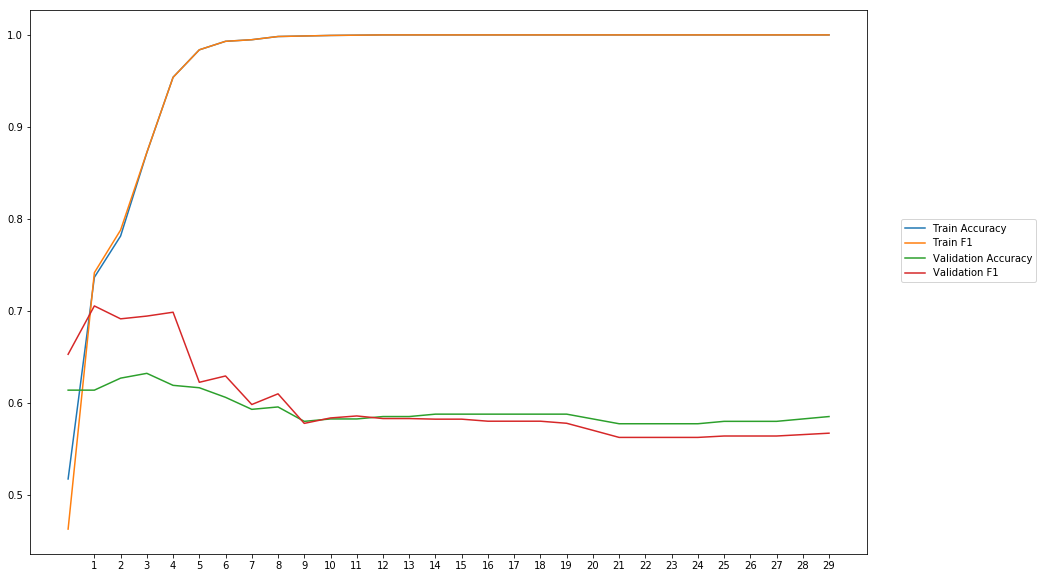

Average Accuracy: 59.16%
Average Precision: 58.60%
Average Recall: 61.87%
Average F1: 59.78%

-----Fold 5--------


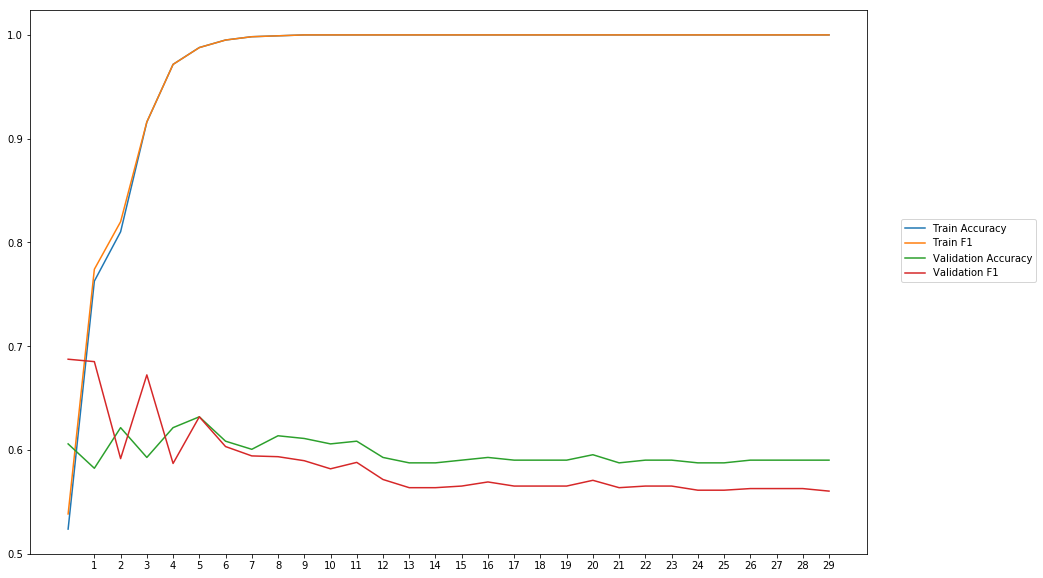

Average Accuracy: 59.74%
Average Precision: 60.29%
Average Recall: 57.85%
Average F1: 58.56%

-----Fold 6--------


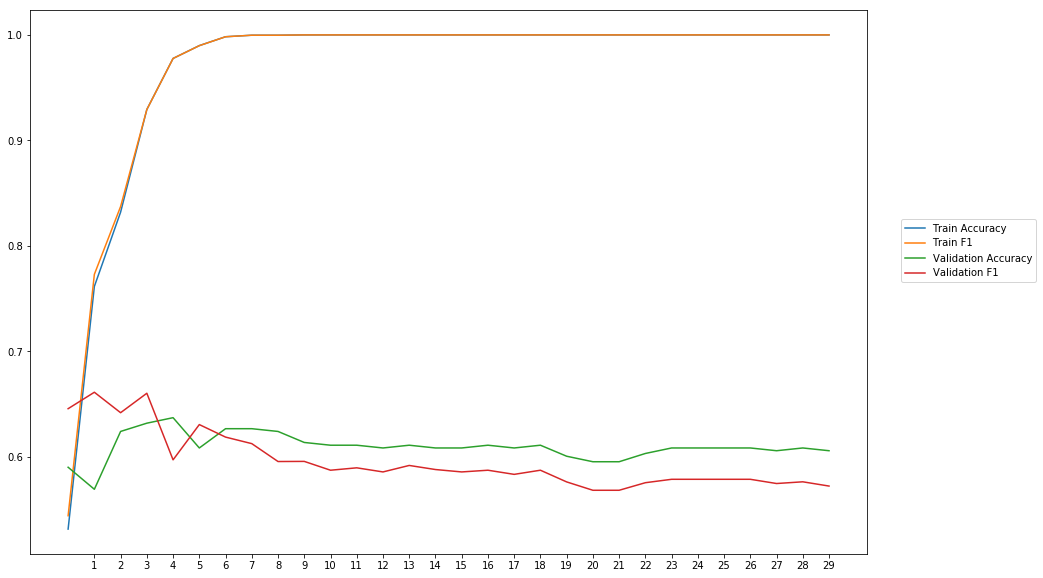

Average Accuracy: 60.96%
Average Precision: 61.78%
Average Recall: 58.12%
Average F1: 59.57%

-----Fold 7--------


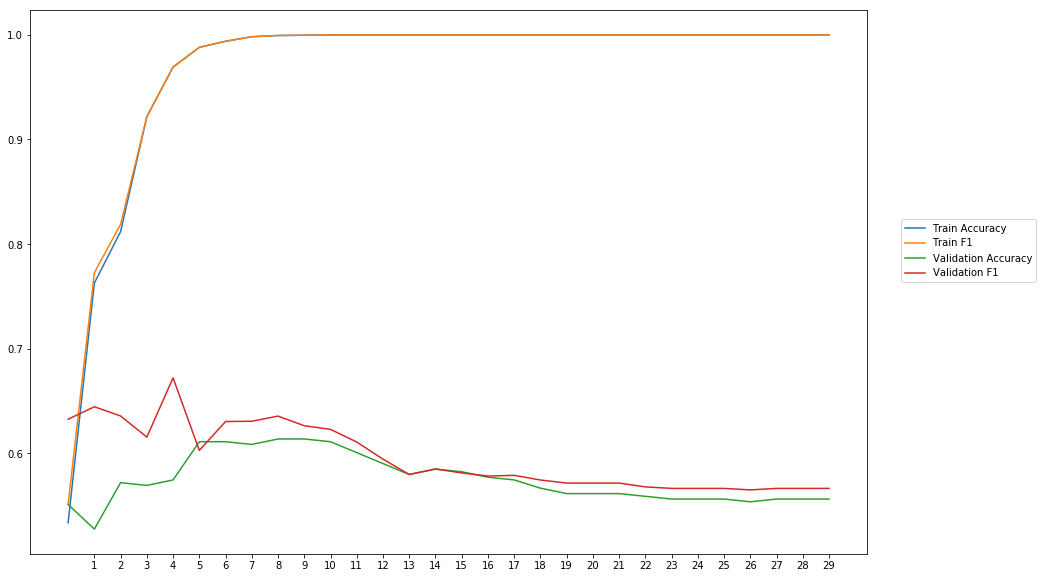

Average Accuracy: 57.50%
Average Precision: 56.80%
Average Recall: 63.28%
Average F1: 59.58%

-----Fold 8--------


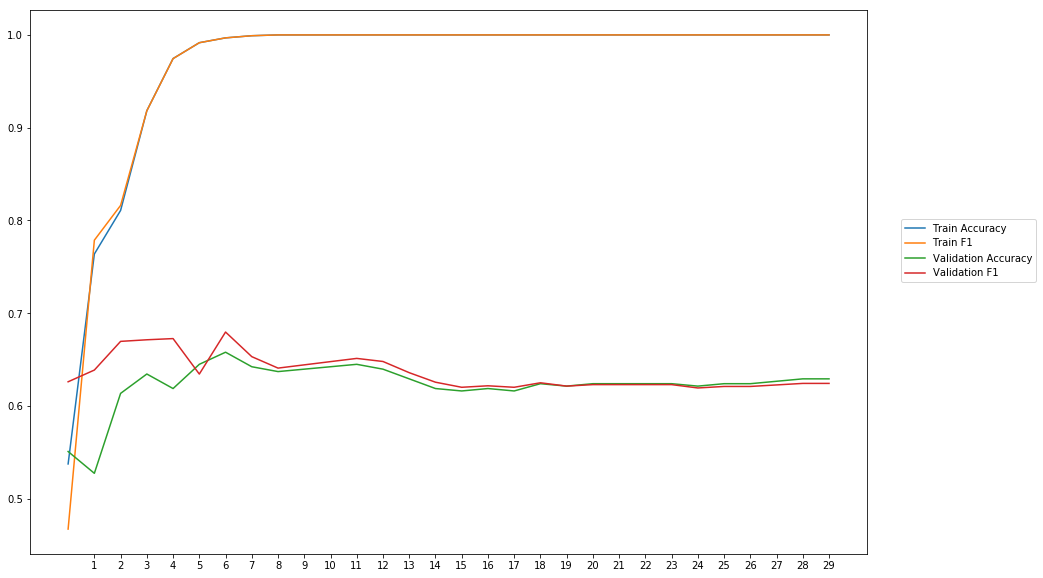

Average Accuracy: 62.30%
Average Precision: 61.65%
Average Recall: 66.16%
Average F1: 63.58%

-----Fold 9--------


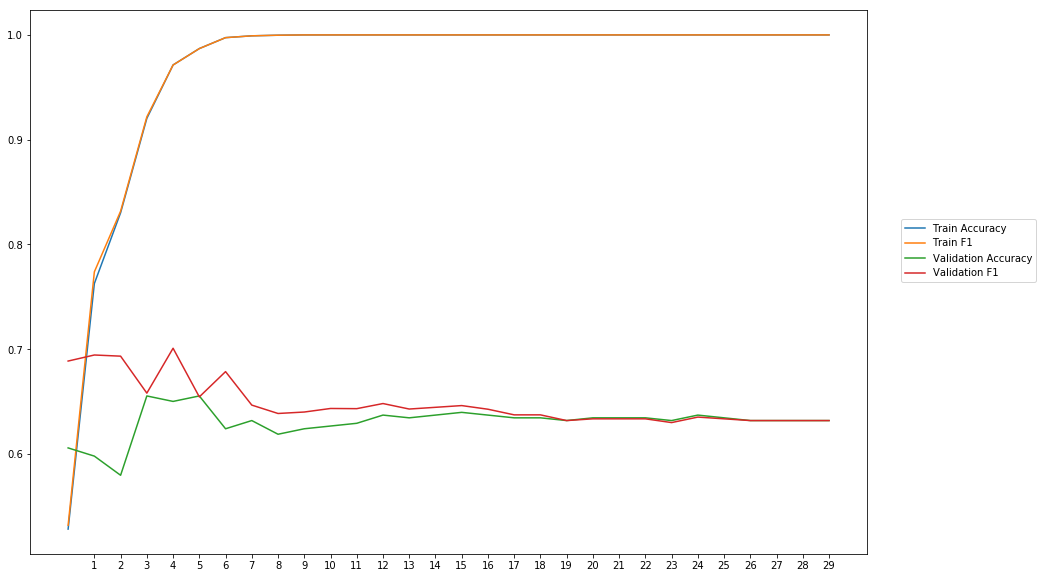

Average Accuracy: 63.06%
Average Precision: 62.05%
Average Recall: 68.67%
Average F1: 64.79%

-----Fold 10--------


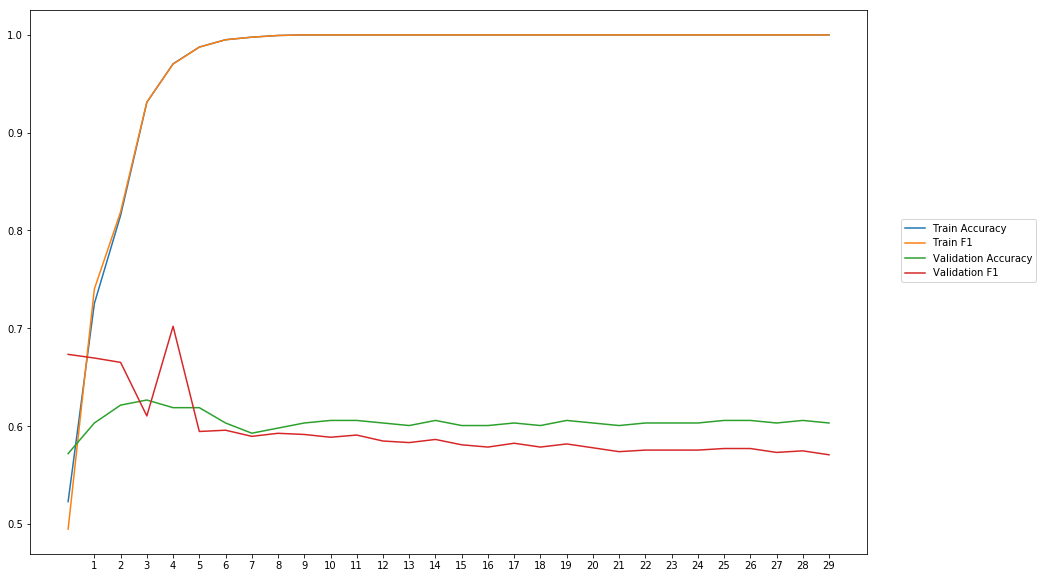

Average Accuracy: 60.42%
Average Precision: 60.87%
Average Recall: 59.27%
Average F1: 59.57%

-------Overallresults-------


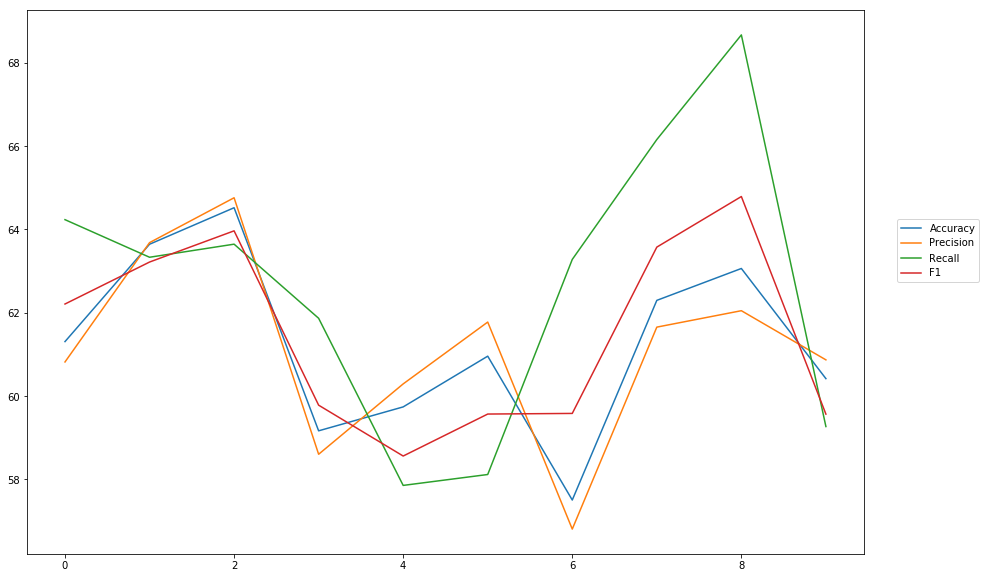

Accuracy: Mean = 61.26% (+/- 2.06%), Max = 64.52%, Min =  57.50%
Precision: Mean = 61.13% (+/- 2.17%), Max = 64.76%, Min =  56.80%
Recall: Mean = 62.64% (+/- 3.30%), Max = 68.67%, Min =  57.85%
F1: Mean = 61.48% (+/- 2.18%), Max = 64.79%, Min =  58.56%


In [21]:
cross_val(model, EPOCHS, 384, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_384')


-----Fold 1--------


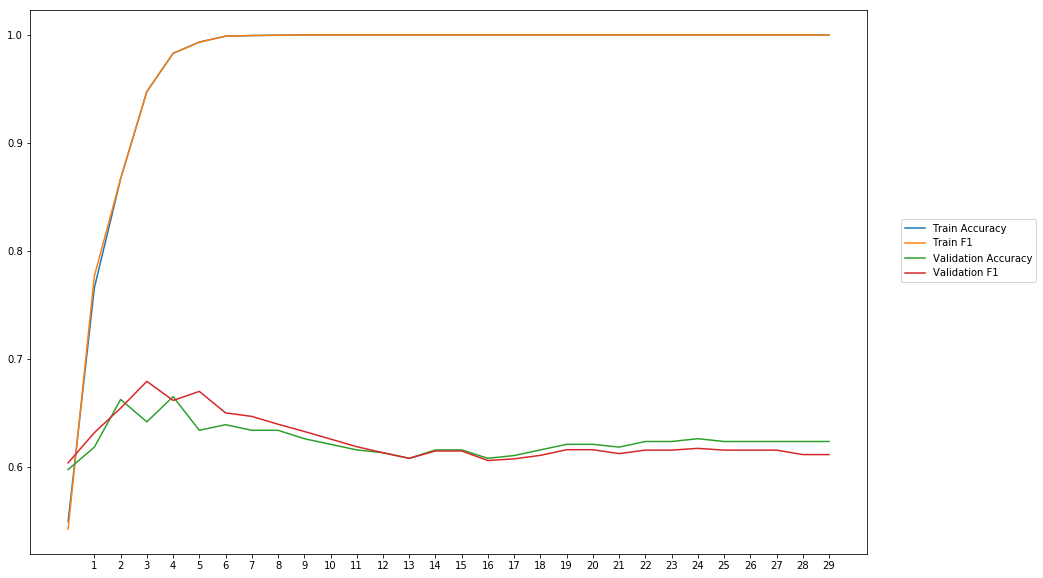

Average Accuracy: 62.41%
Average Precision: 62.20%
Average Recall: 62.92%
Average F1: 62.49%

-----Fold 2--------


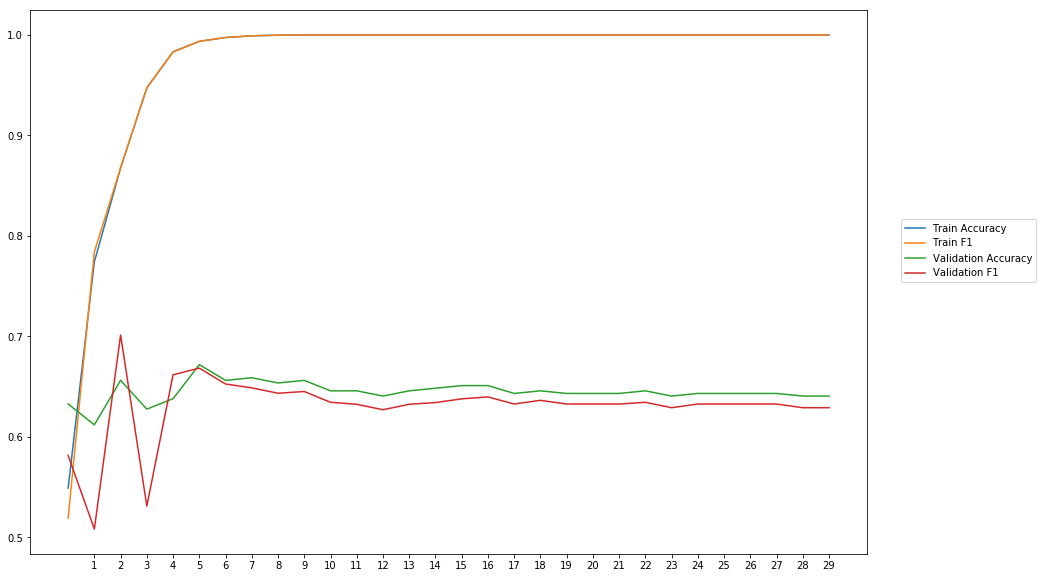

Average Accuracy: 64.51%
Average Precision: 65.43%
Average Recall: 61.31%
Average F1: 63.00%

-----Fold 3--------


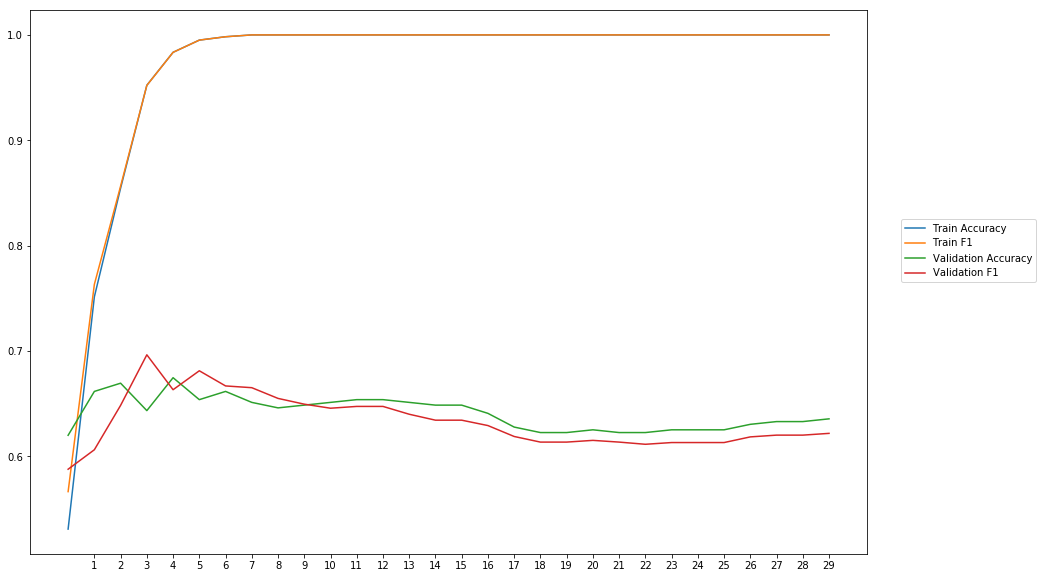

Average Accuracy: 64.08%
Average Precision: 64.40%
Average Recall: 62.62%
Average F1: 63.33%

-----Fold 4--------


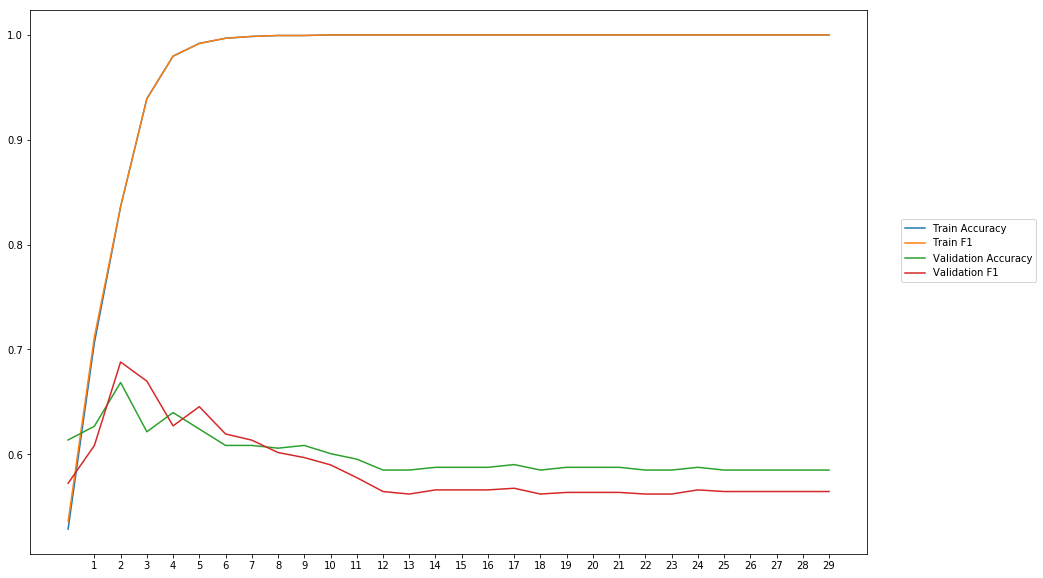

Average Accuracy: 59.90%
Average Precision: 60.33%
Average Recall: 57.12%
Average F1: 58.55%

-----Fold 5--------


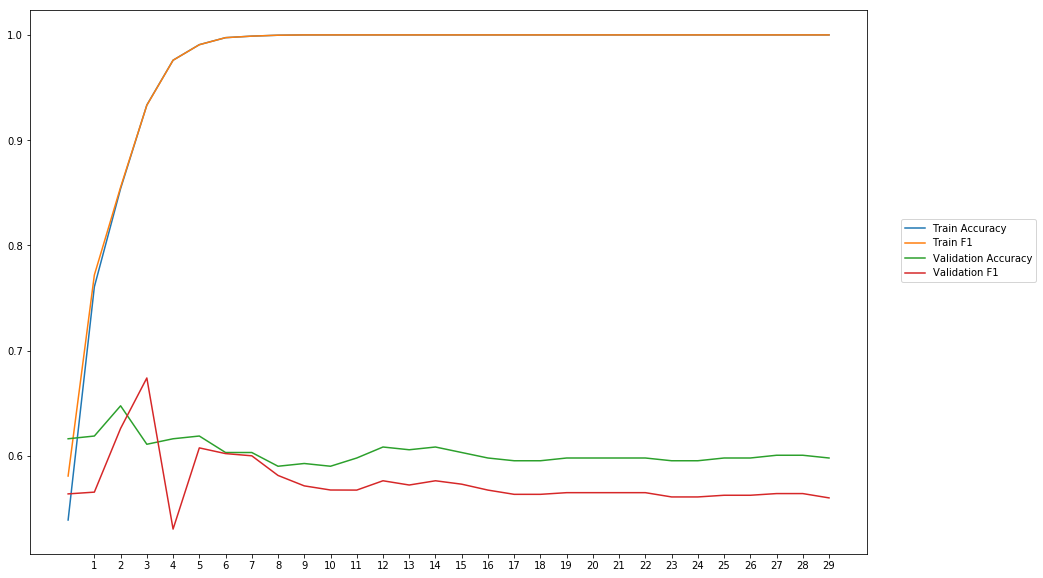

Average Accuracy: 60.32%
Average Precision: 61.83%
Average Recall: 54.08%
Average F1: 57.48%

-----Fold 6--------


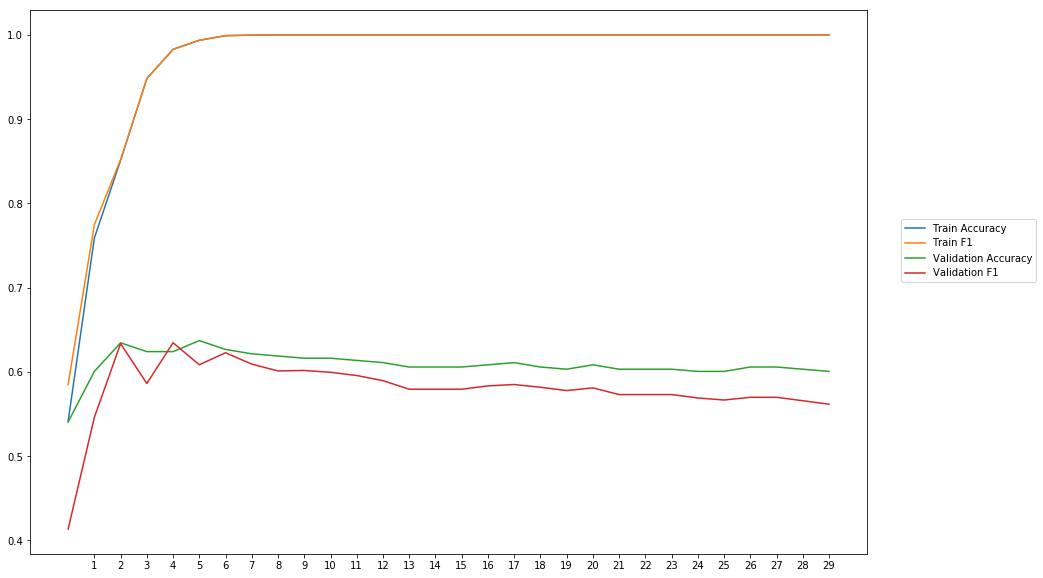

Average Accuracy: 60.88%
Average Precision: 62.25%
Average Recall: 54.57%
Average F1: 58.03%

-----Fold 7--------


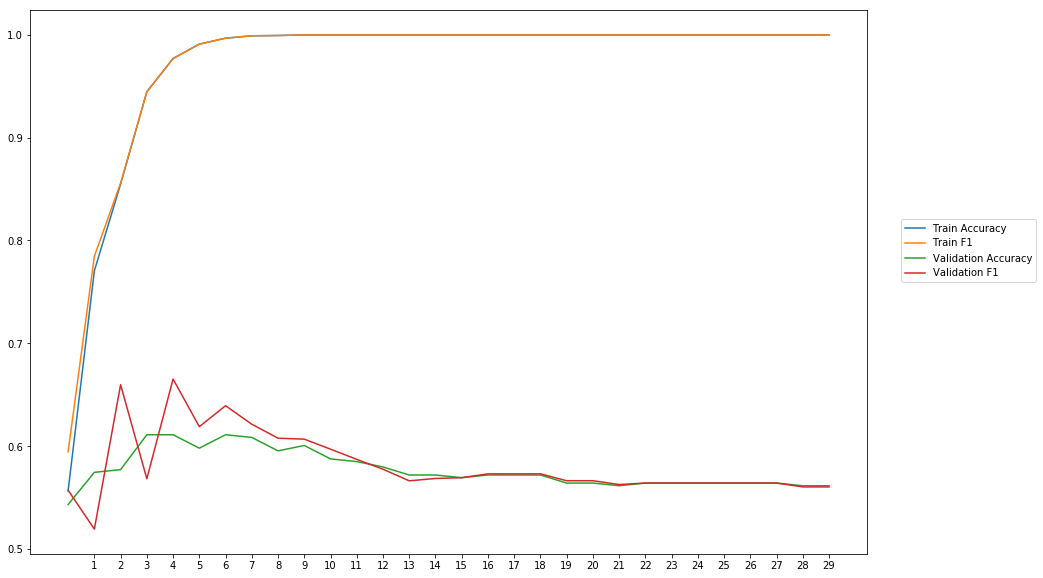

Average Accuracy: 57.68%
Average Precision: 57.38%
Average Recall: 59.35%
Average F1: 58.15%

-----Fold 8--------


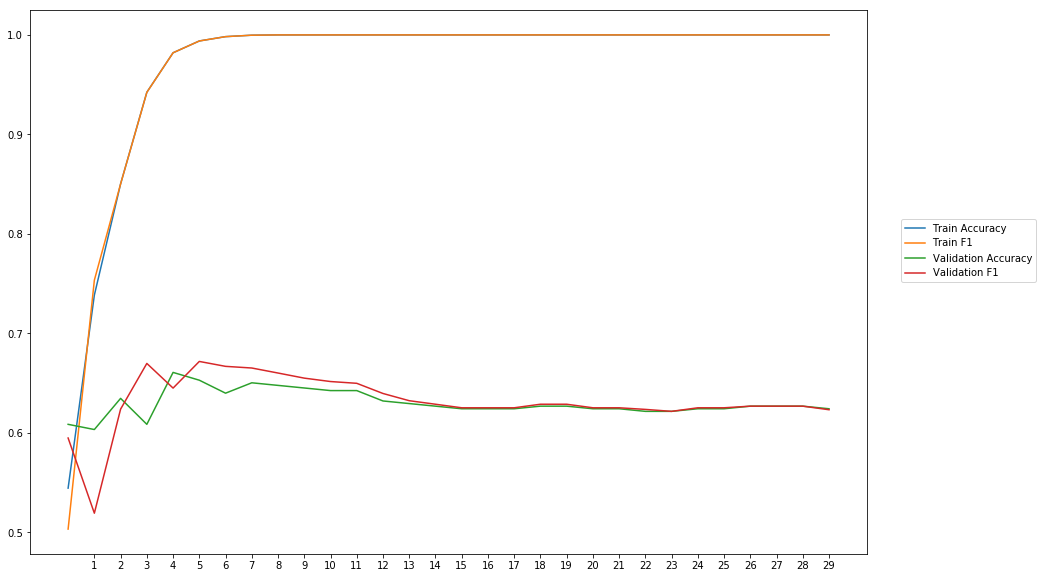

Average Accuracy: 62.97%
Average Precision: 62.68%
Average Recall: 64.01%
Average F1: 63.17%

-----Fold 9--------


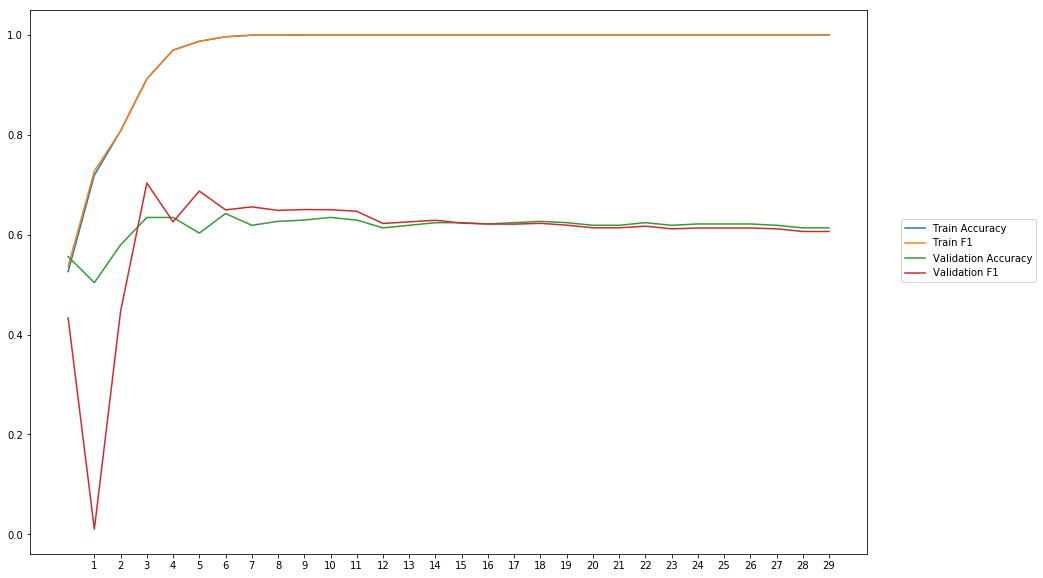

Average Accuracy: 61.53%
Average Precision: 63.05%
Average Recall: 60.72%
Average F1: 59.71%

-----Fold 10--------


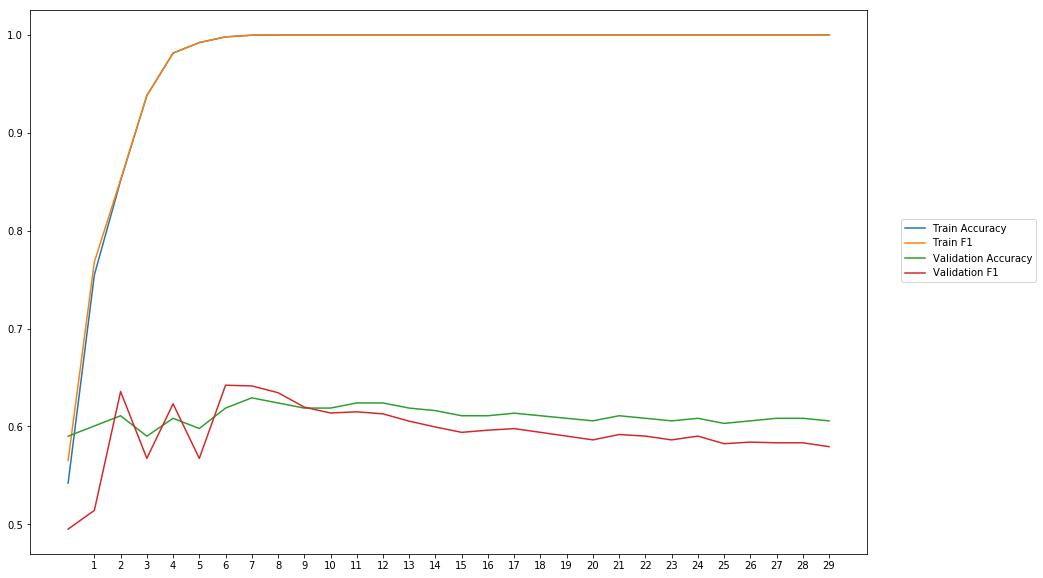

Average Accuracy: 61.05%
Average Precision: 61.86%
Average Recall: 57.50%
Average F1: 59.39%

-------Overallresults-------


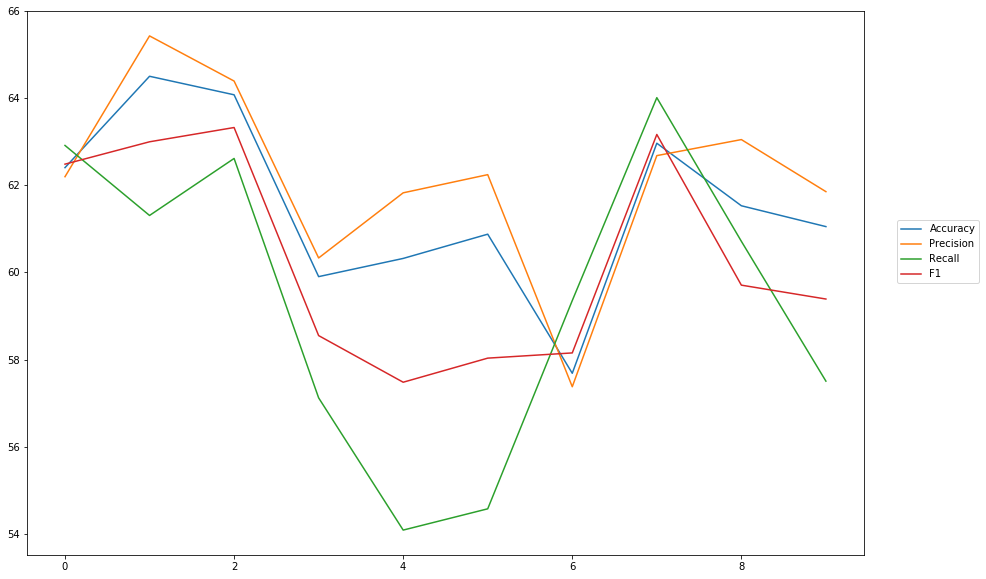

Accuracy: Mean = 61.53% (+/- 1.94%), Max = 64.51%, Min =  57.68%
Precision: Mean = 62.14% (+/- 2.08%), Max = 65.43%, Min =  57.38%
Recall: Mean = 59.42% (+/- 3.31%), Max = 64.01%, Min =  54.08%
F1: Mean = 60.33% (+/- 2.27%), Max = 63.33%, Min =  57.48%


In [22]:
cross_val(model, EPOCHS, 320, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_320')


-----Fold 1--------


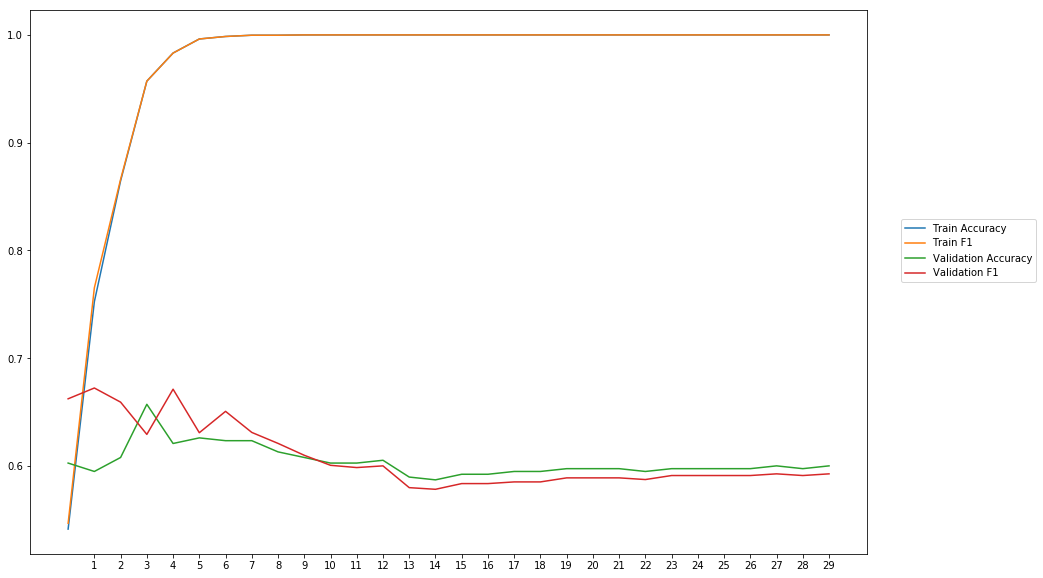

Average Accuracy: 60.37%
Average Precision: 60.08%
Average Recall: 61.94%
Average F1: 60.75%

-----Fold 2--------


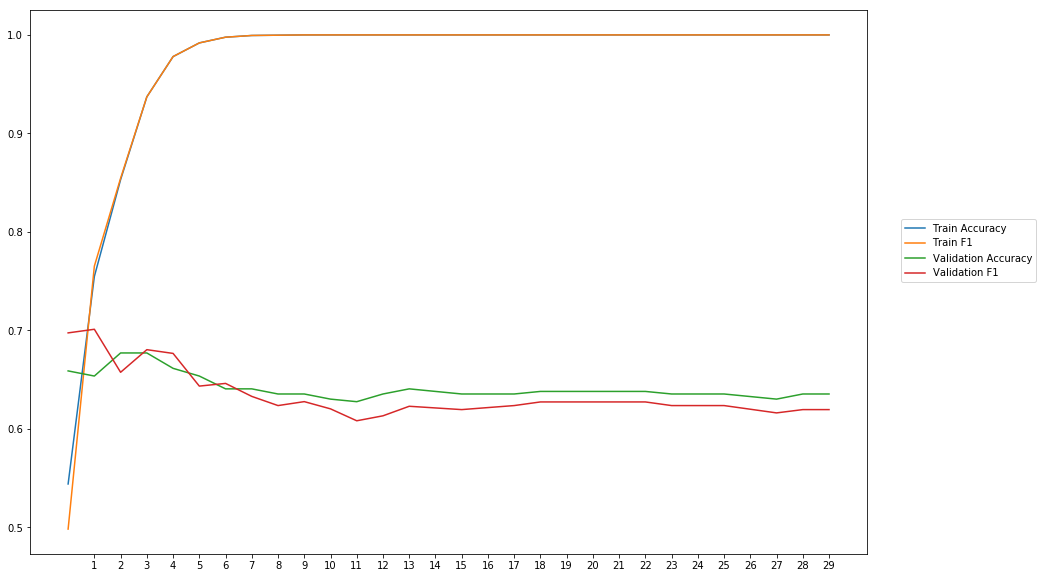

Average Accuracy: 64.14%
Average Precision: 64.37%
Average Recall: 62.72%
Average F1: 63.40%

-----Fold 3--------


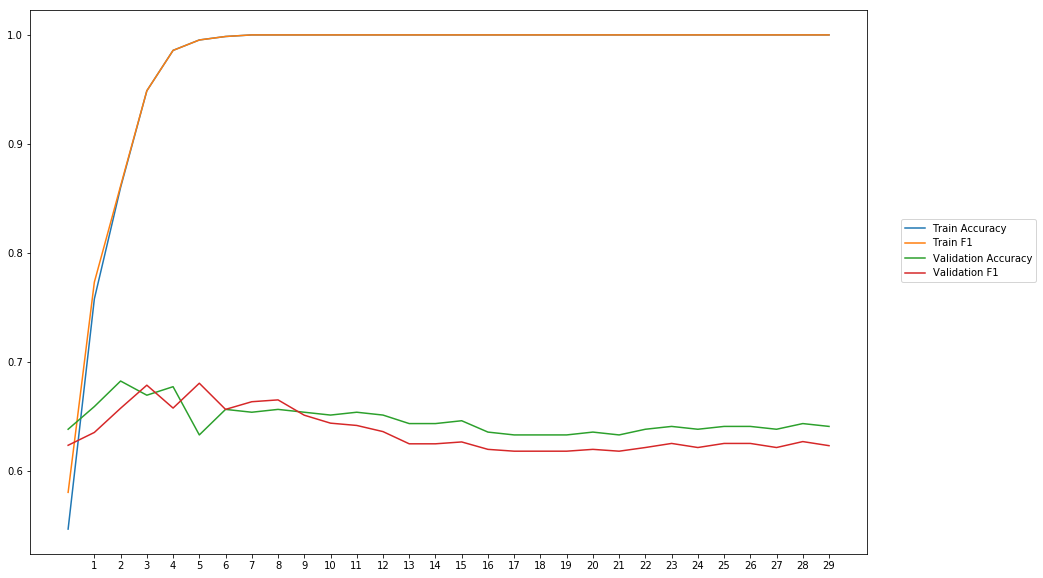

Average Accuracy: 64.63%
Average Precision: 65.24%
Average Recall: 62.13%
Average F1: 63.54%

-----Fold 4--------


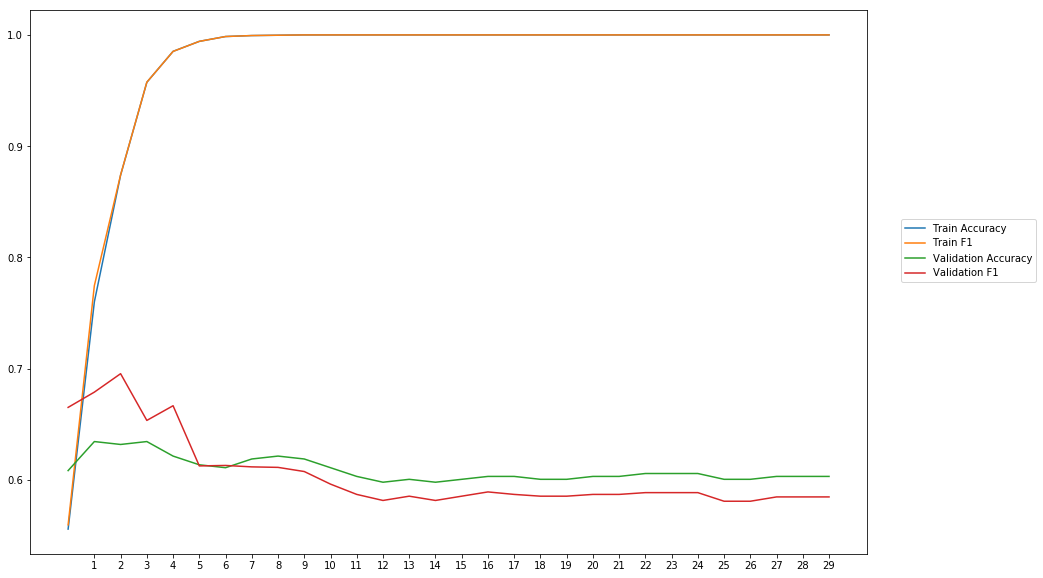

Average Accuracy: 60.89%
Average Precision: 60.93%
Average Recall: 60.49%
Average F1: 60.45%

-----Fold 5--------


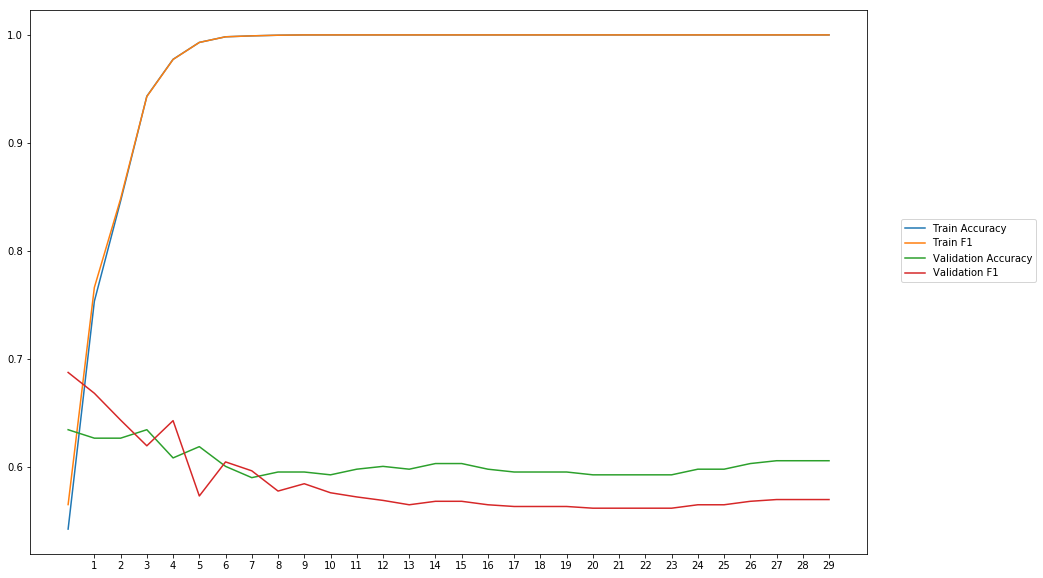

Average Accuracy: 60.32%
Average Precision: 61.17%
Average Recall: 56.40%
Average F1: 58.42%

-----Fold 6--------


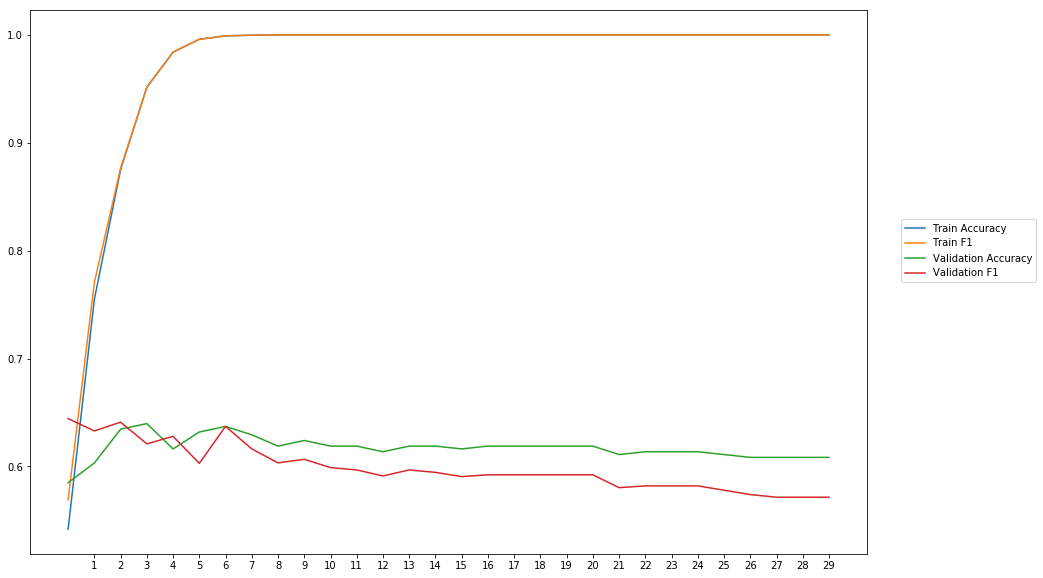

Average Accuracy: 61.71%
Average Precision: 62.83%
Average Recall: 57.45%
Average F1: 59.85%

-----Fold 7--------


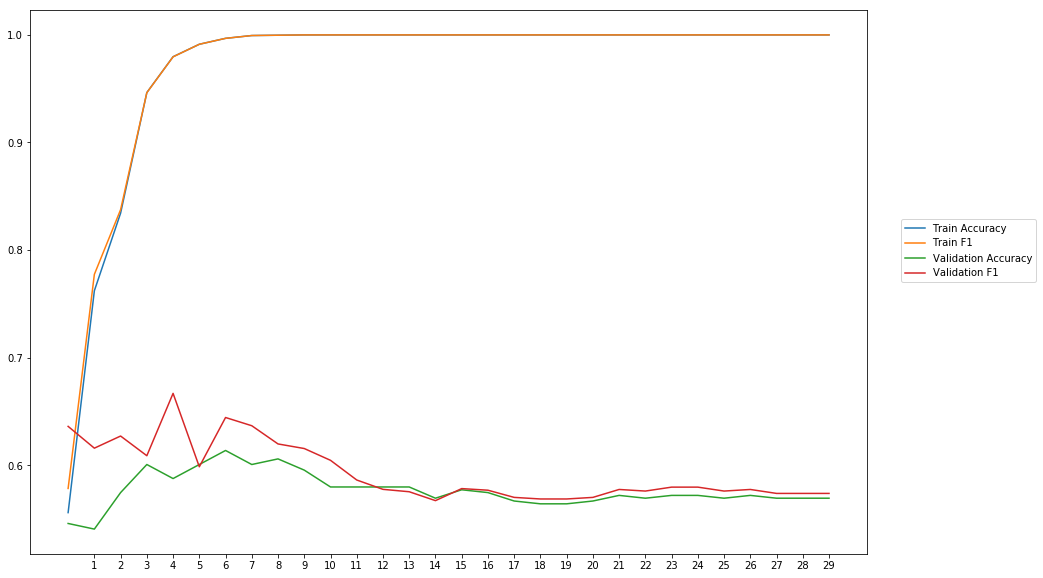

Average Accuracy: 57.66%
Average Precision: 57.00%
Average Recall: 62.29%
Average F1: 59.32%

-----Fold 8--------


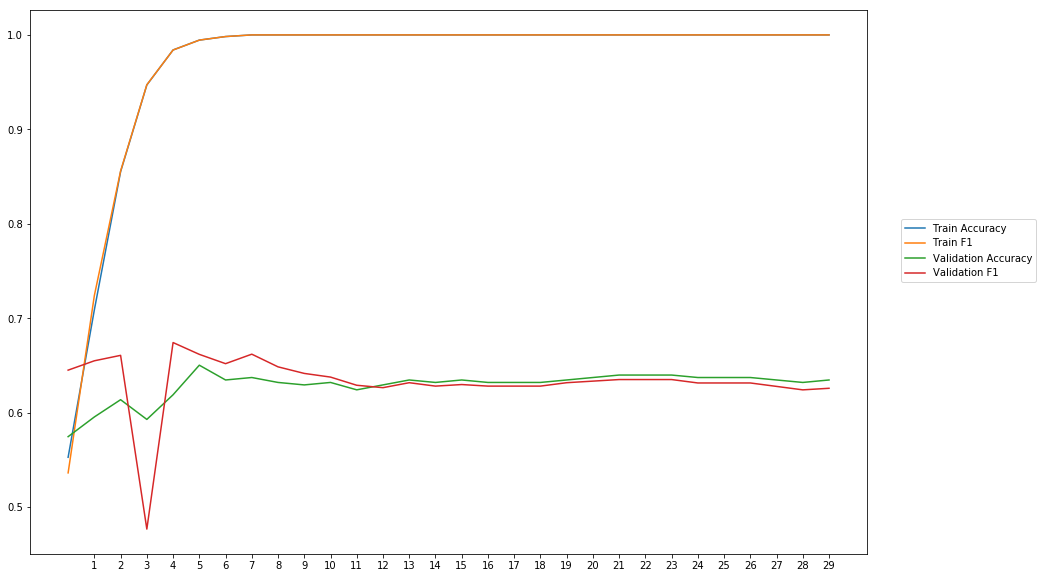

Average Accuracy: 62.87%
Average Precision: 62.62%
Average Recall: 64.66%
Average F1: 63.27%

-----Fold 9--------


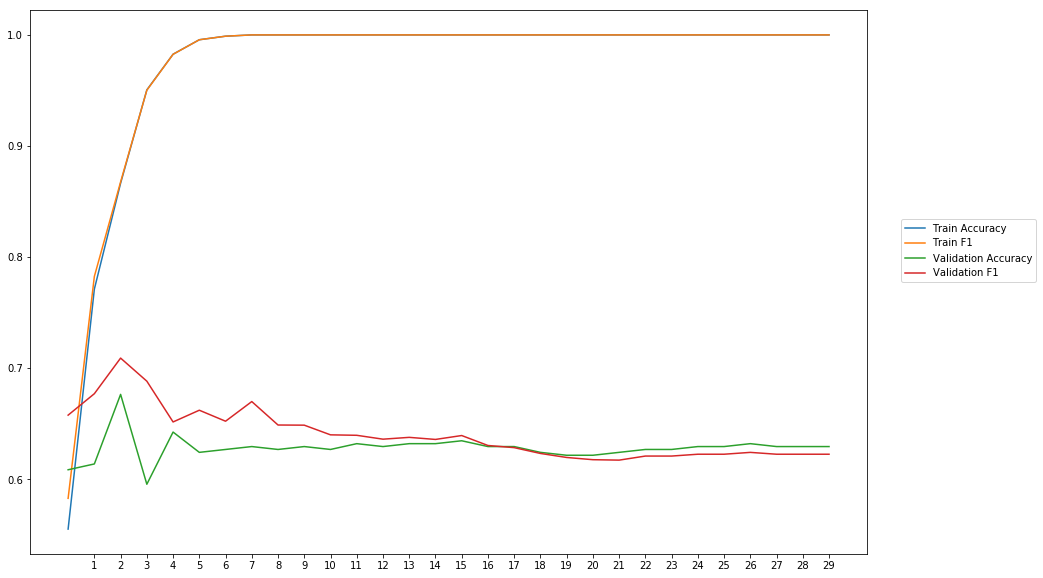

Average Accuracy: 62.79%
Average Precision: 61.96%
Average Recall: 66.75%
Average F1: 64.01%

-----Fold 10--------


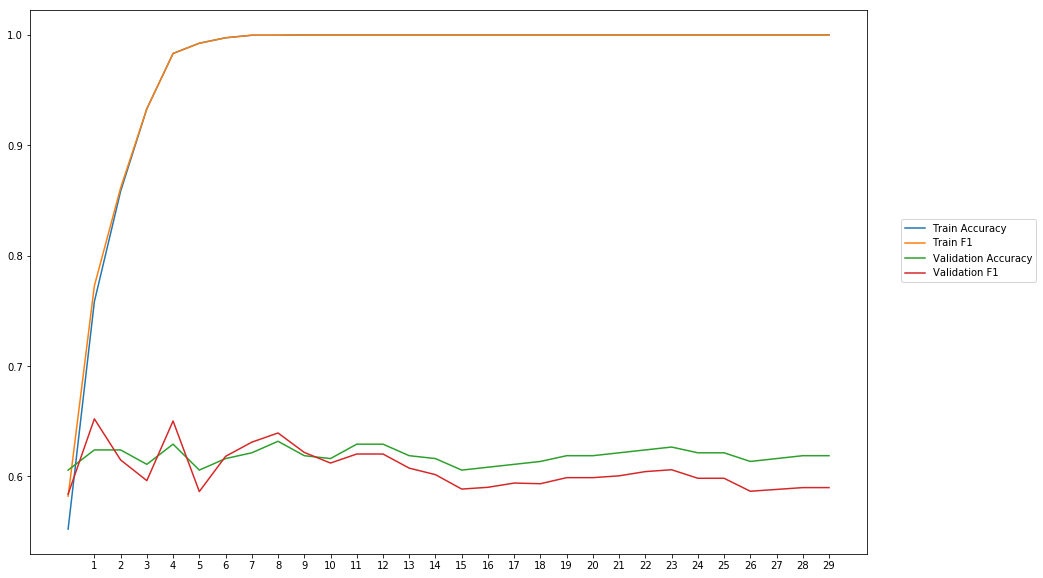

Average Accuracy: 61.85%
Average Precision: 62.48%
Average Recall: 59.01%
Average F1: 60.61%

-------Overallresults-------


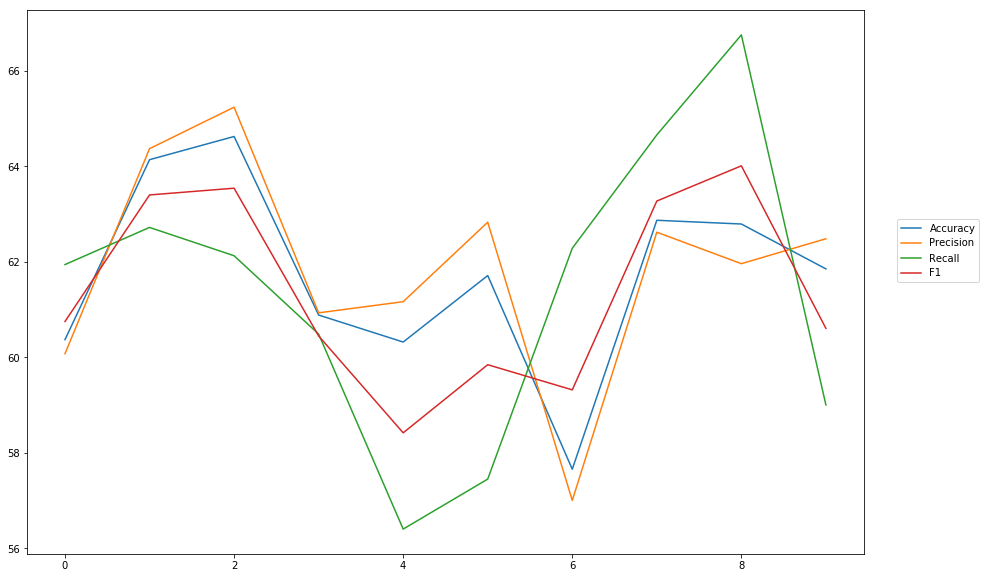

Accuracy: Mean = 61.72% (+/- 1.94%), Max = 64.63%, Min =  57.66%
Precision: Mean = 61.87% (+/- 2.19%), Max = 65.24%, Min =  57.00%
Recall: Mean = 61.38% (+/- 3.00%), Max = 66.75%, Min =  56.40%
F1: Mean = 61.36% (+/- 1.91%), Max = 64.01%, Min =  58.42%


In [23]:
cross_val(model, EPOCHS, 288, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_288')


-----Fold 1--------


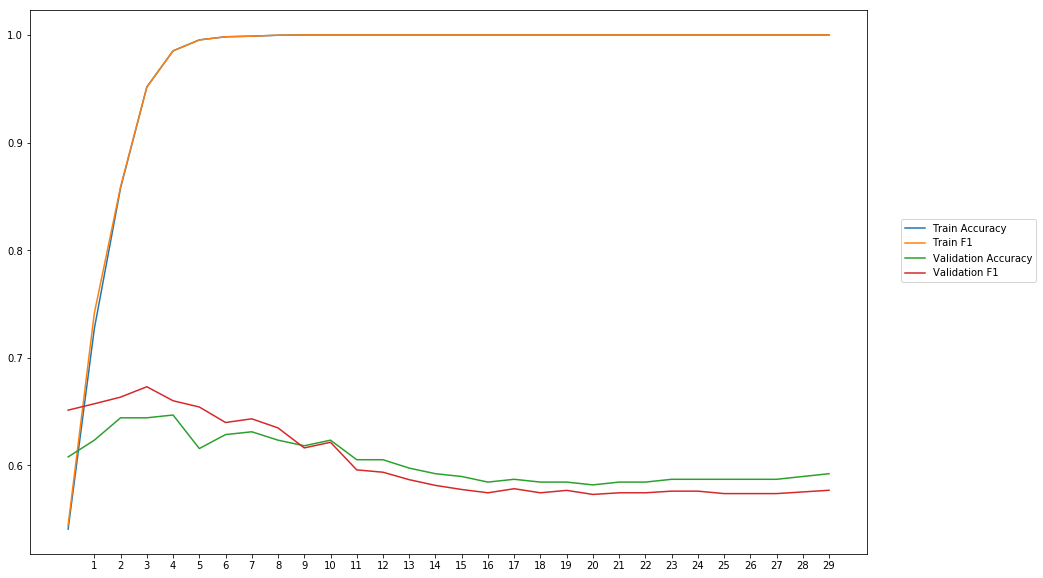

Average Accuracy: 60.35%
Average Precision: 60.07%
Average Recall: 60.85%
Average F1: 60.33%

-----Fold 2--------


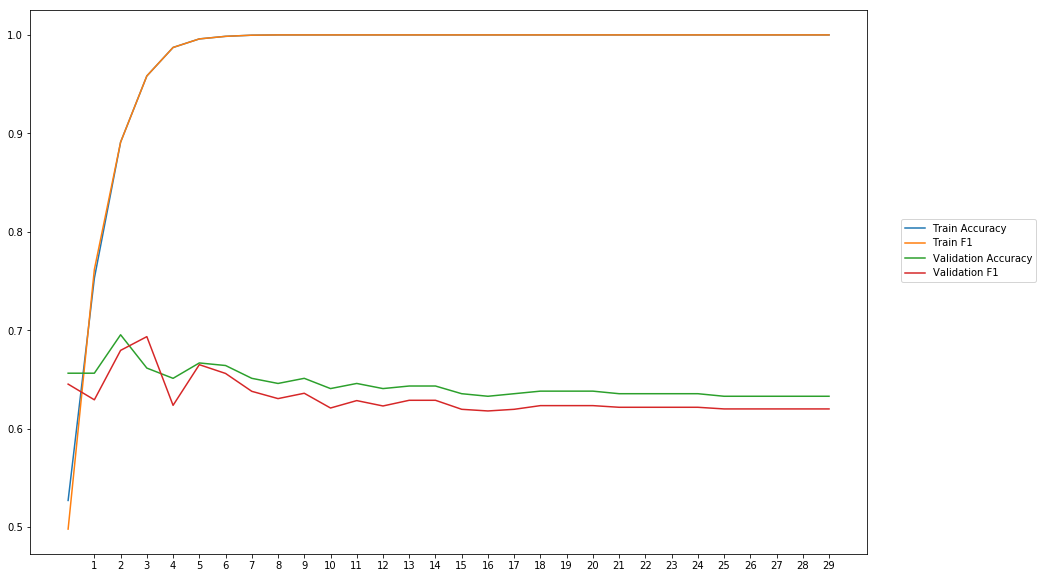

Average Accuracy: 64.45%
Average Precision: 65.21%
Average Recall: 61.27%
Average F1: 63.13%

-----Fold 3--------


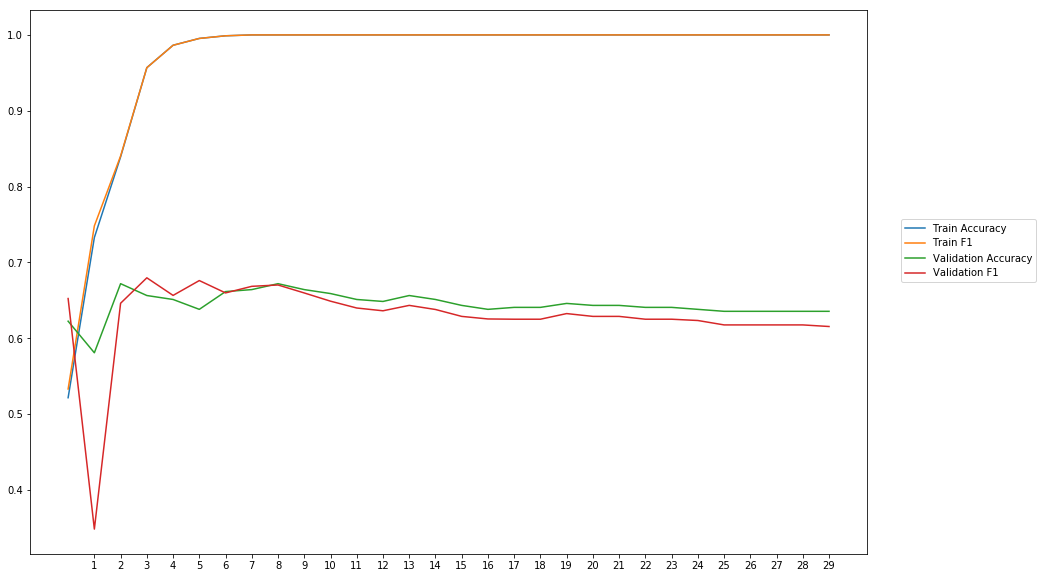

Average Accuracy: 64.46%
Average Precision: 65.45%
Average Recall: 61.62%
Average F1: 62.92%

-----Fold 4--------


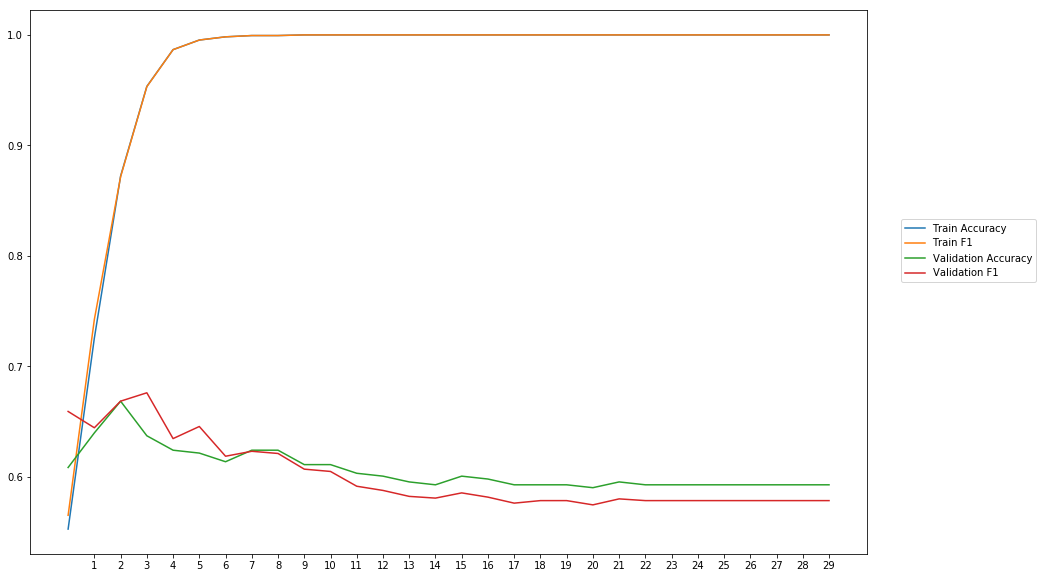

Average Accuracy: 60.59%
Average Precision: 60.63%
Average Recall: 59.77%
Average F1: 60.08%

-----Fold 5--------


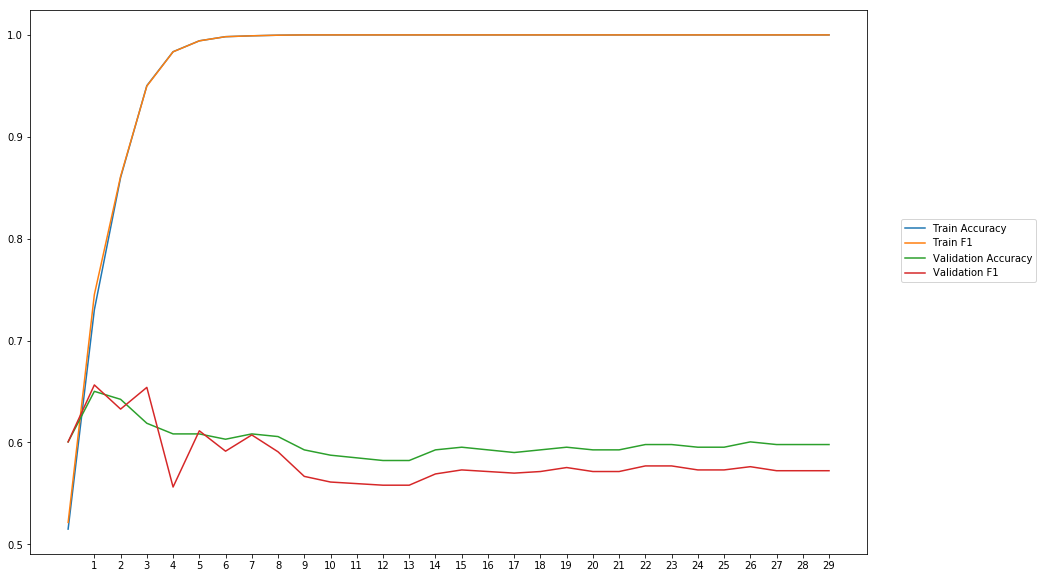

Average Accuracy: 60.00%
Average Precision: 60.71%
Average Recall: 56.11%
Average F1: 58.23%

-----Fold 6--------


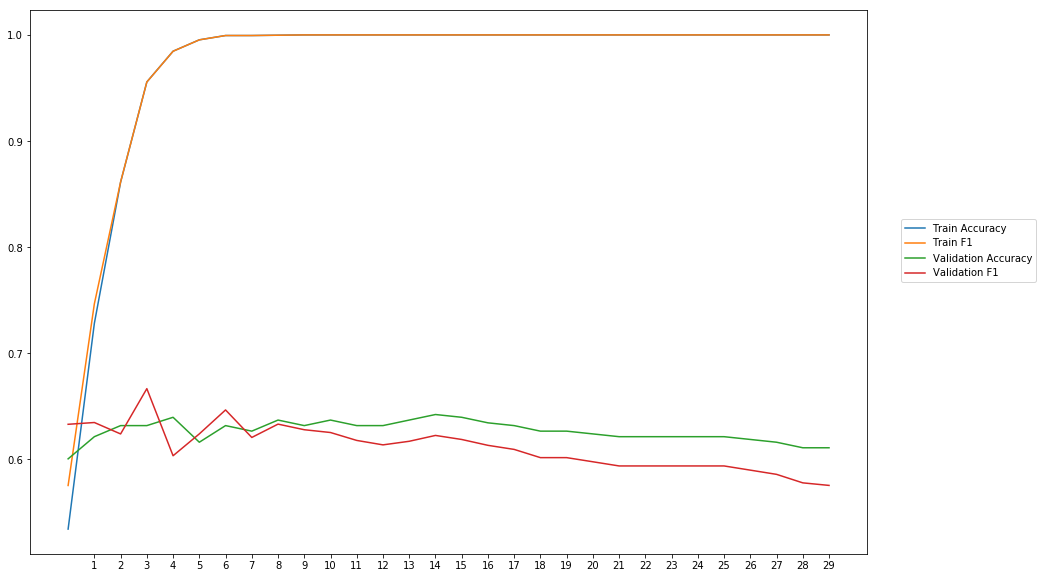

Average Accuracy: 62.65%
Average Precision: 63.59%
Average Recall: 59.21%
Average F1: 61.17%

-----Fold 7--------


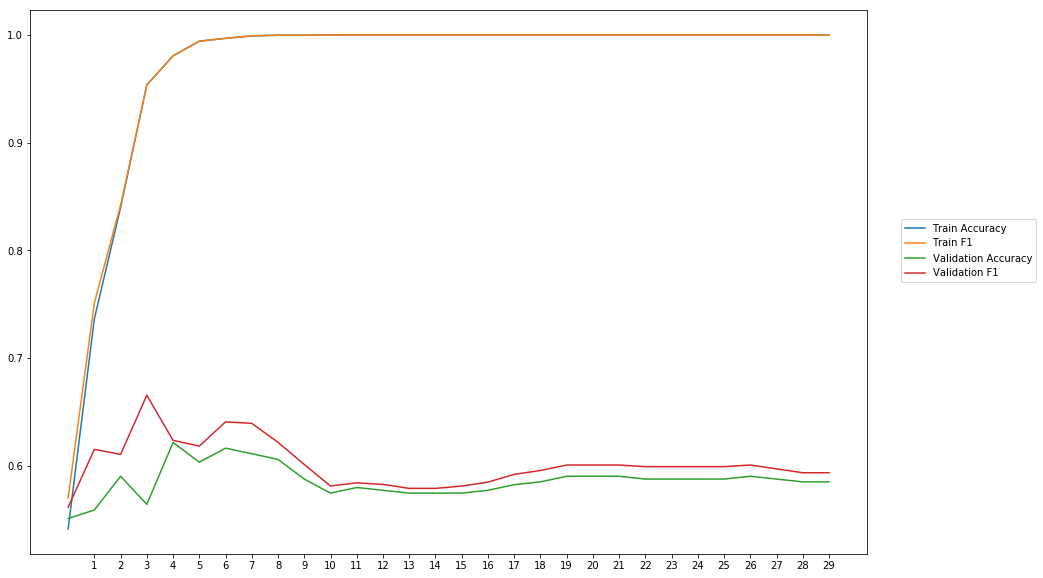

Average Accuracy: 58.58%
Average Precision: 57.88%
Average Recall: 62.81%
Average F1: 60.12%

-----Fold 8--------


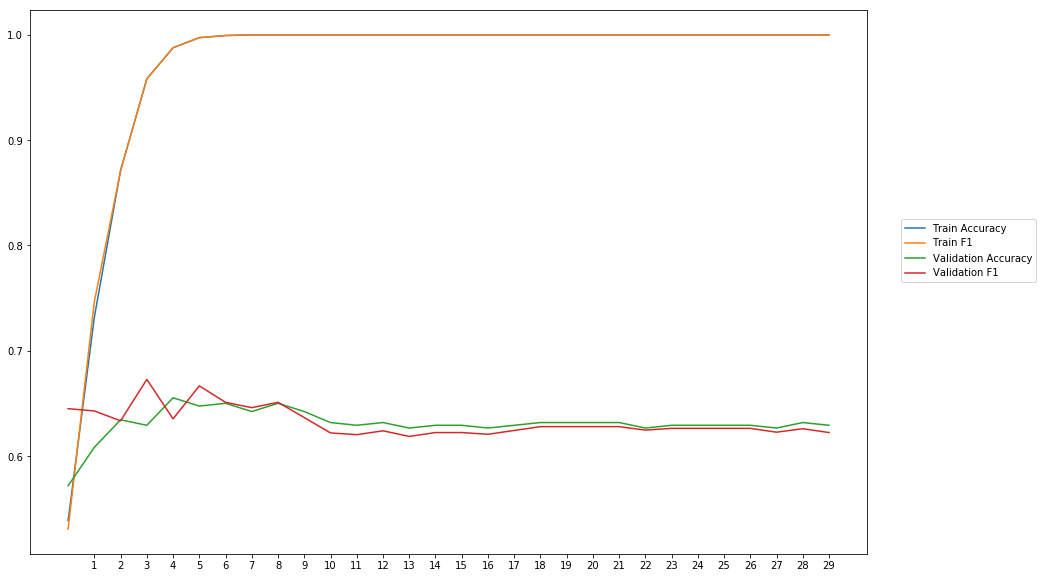

Average Accuracy: 63.08%
Average Precision: 62.96%
Average Recall: 63.77%
Average F1: 63.23%

-----Fold 9--------


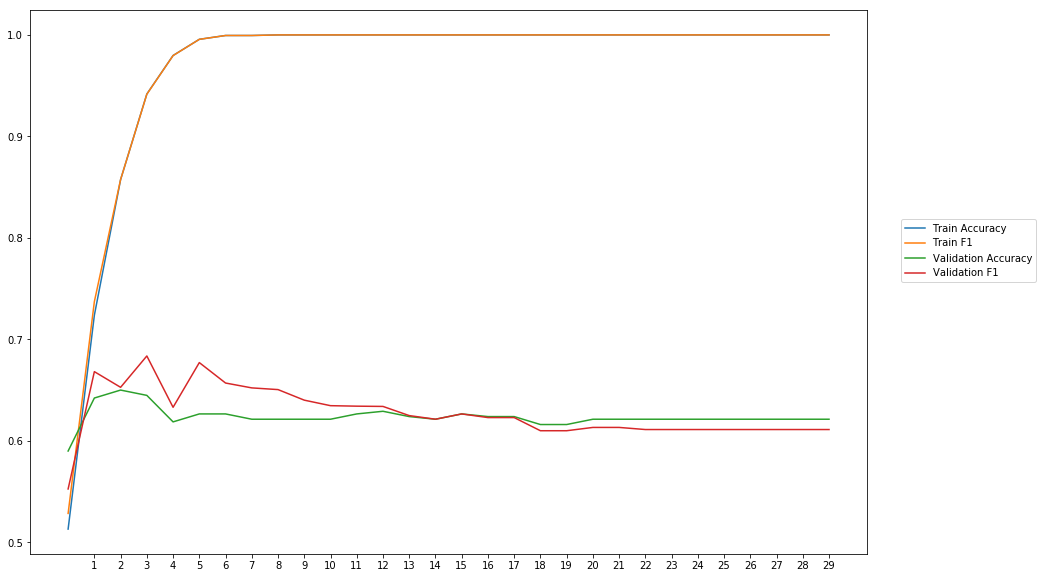

Average Accuracy: 62.36%
Average Precision: 61.93%
Average Recall: 63.93%
Average F1: 62.76%

-----Fold 10--------


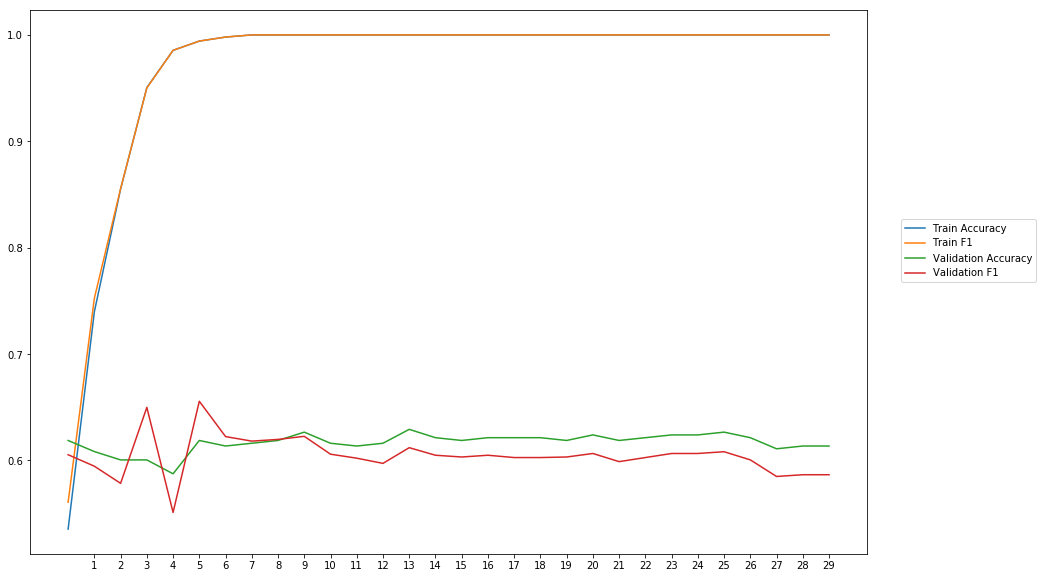

Average Accuracy: 61.69%
Average Precision: 62.32%
Average Recall: 58.99%
Average F1: 60.49%

-------Overallresults-------


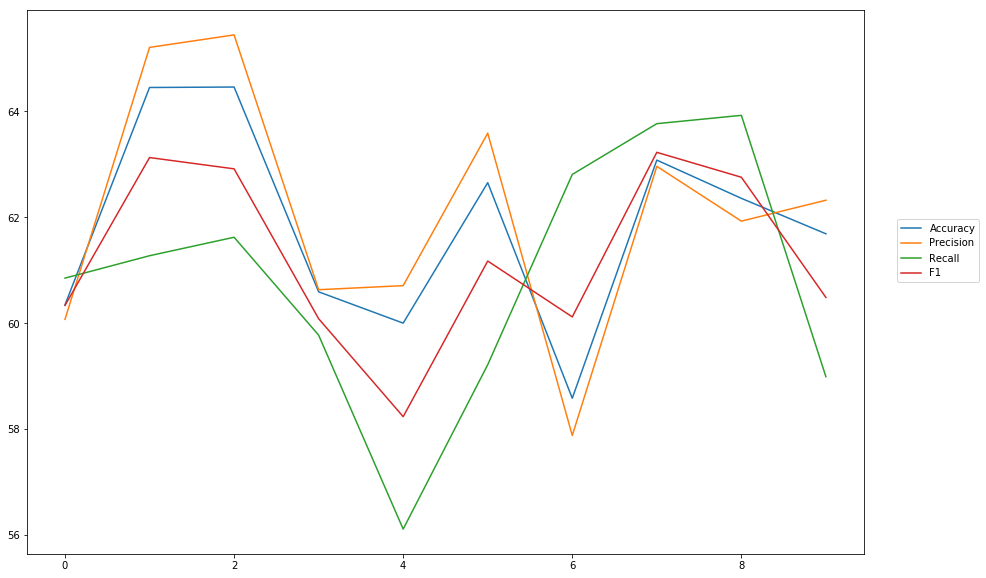

Accuracy: Mean = 61.82% (+/- 1.84%), Max = 64.46%, Min =  58.58%
Precision: Mean = 62.08% (+/- 2.24%), Max = 65.45%, Min =  57.88%
Recall: Mean = 60.83% (+/- 2.29%), Max = 63.93%, Min =  56.11%
F1: Mean = 61.25% (+/- 1.60%), Max = 63.23%, Min =  58.23%


In [24]:
cross_val(model, EPOCHS, 272, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_272')


-----Fold 1--------


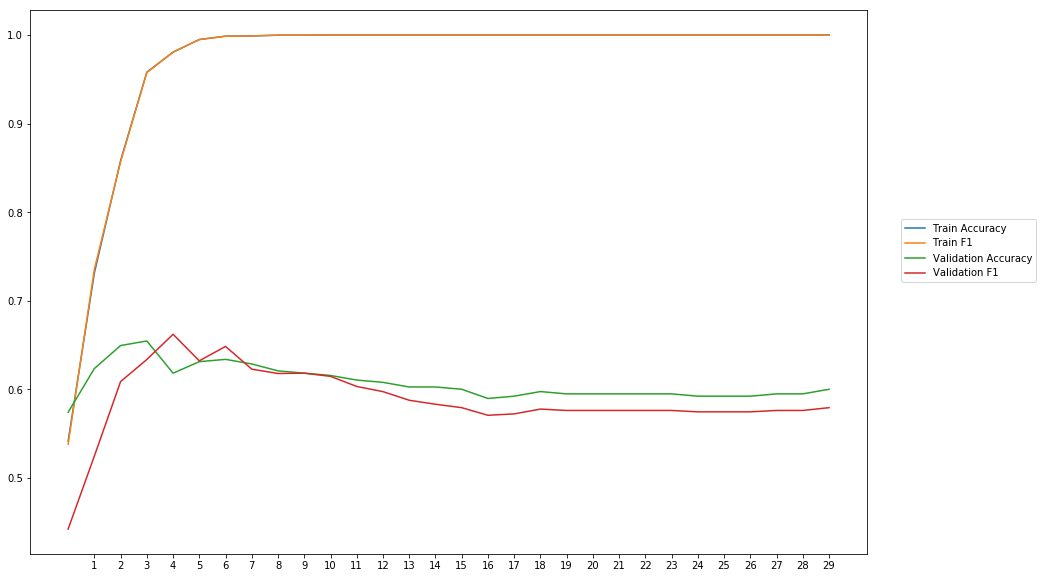

Average Accuracy: 60.70%
Average Precision: 61.70%
Average Recall: 56.67%
Average F1: 58.77%

-----Fold 2--------


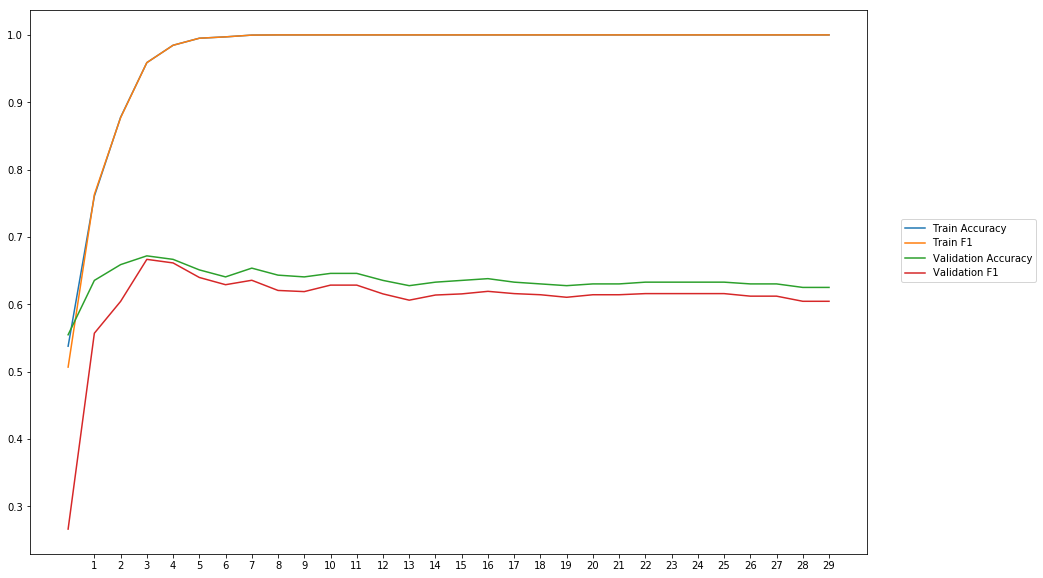

Average Accuracy: 63.57%
Average Precision: 65.46%
Average Recall: 57.50%
Average F1: 60.63%

-----Fold 3--------


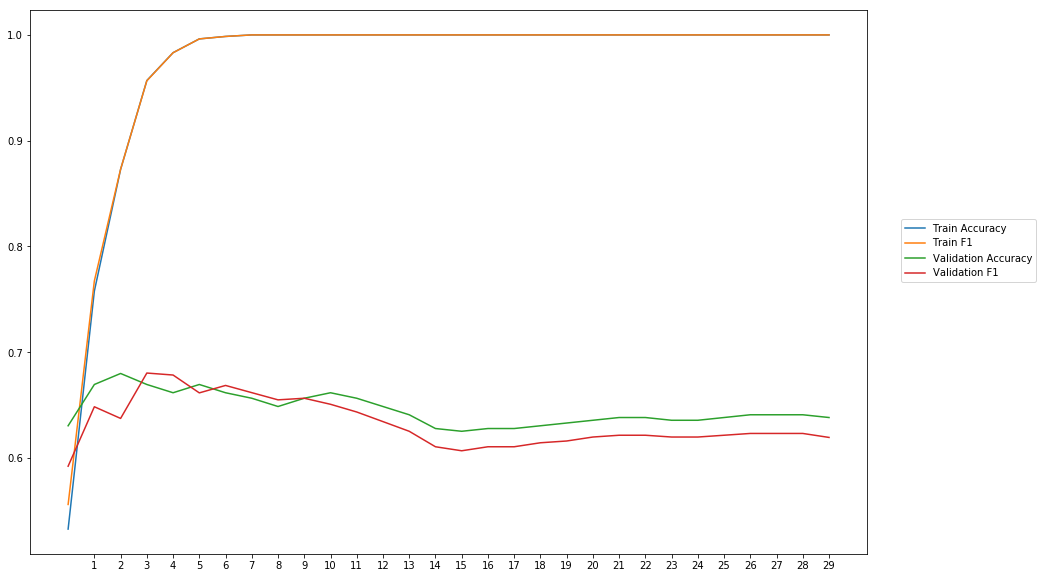

Average Accuracy: 64.53%
Average Precision: 65.28%
Average Recall: 61.47%
Average F1: 63.23%

-----Fold 4--------


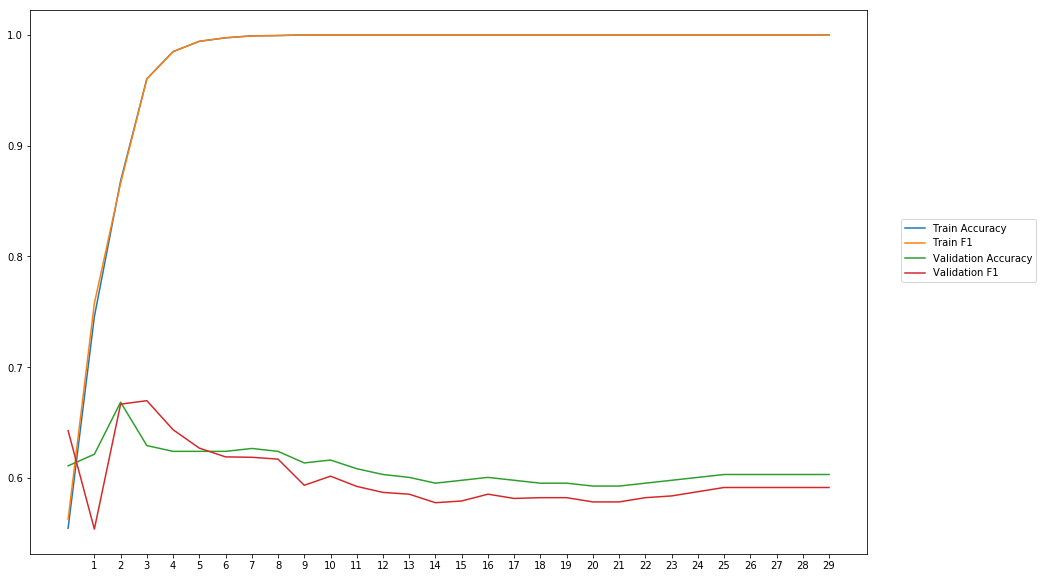

Average Accuracy: 60.91%
Average Precision: 61.31%
Average Recall: 58.83%
Average F1: 59.91%

-----Fold 5--------


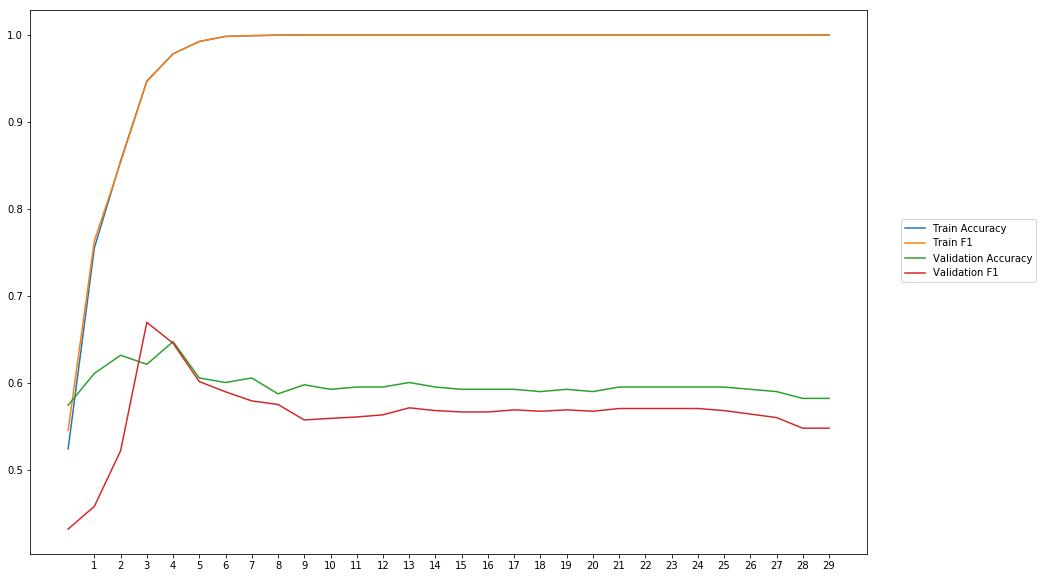

Average Accuracy: 59.79%
Average Precision: 61.67%
Average Recall: 52.90%
Average F1: 56.44%

-----Fold 6--------


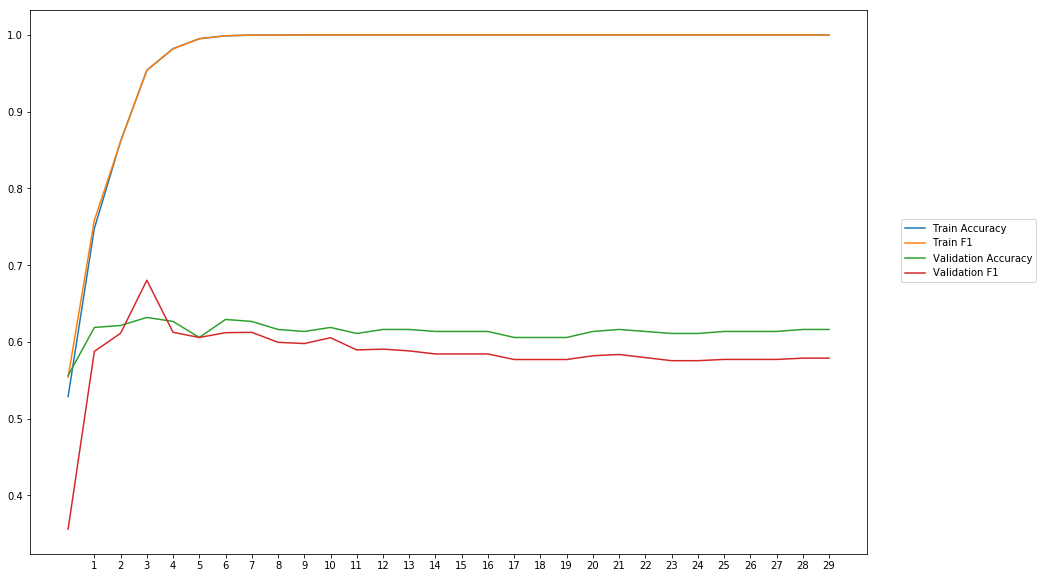

Average Accuracy: 61.35%
Average Precision: 62.93%
Average Recall: 55.06%
Average F1: 58.39%

-----Fold 7--------


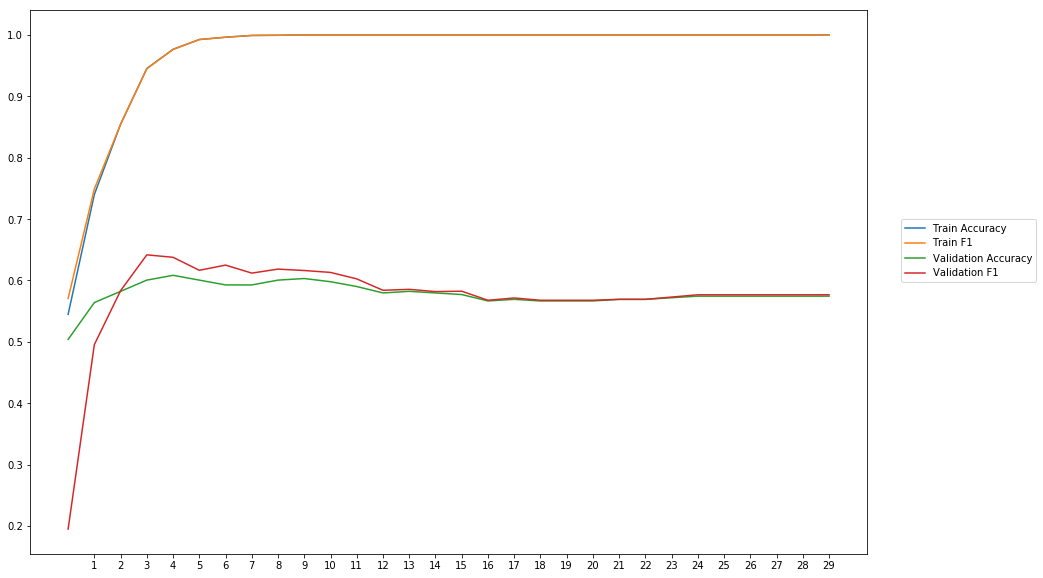

Average Accuracy: 57.82%
Average Precision: 57.44%
Average Recall: 58.29%
Average F1: 57.35%

-----Fold 8--------


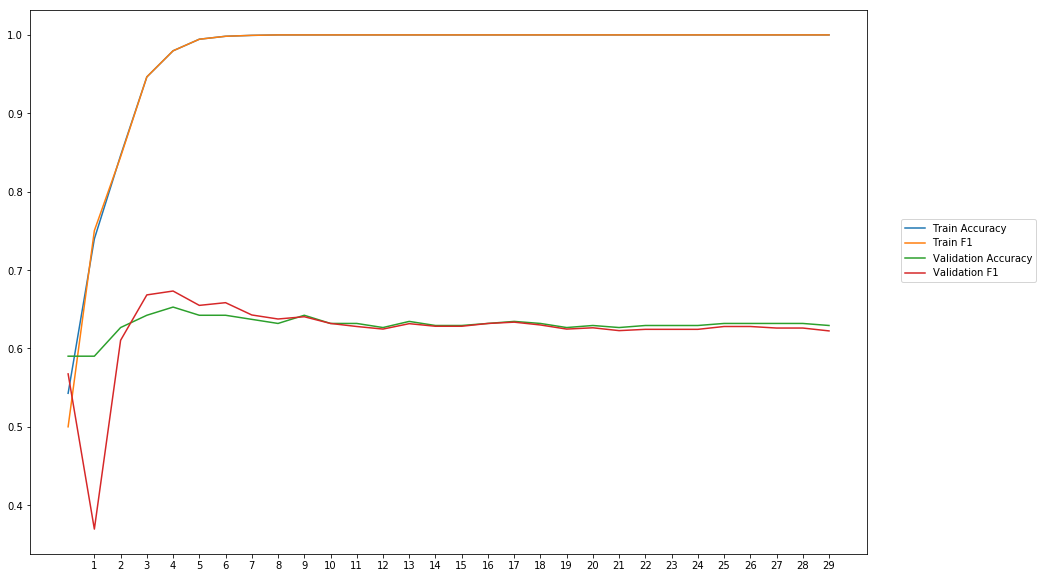

Average Accuracy: 63.02%
Average Precision: 63.55%
Average Recall: 61.97%
Average F1: 62.23%

-----Fold 9--------


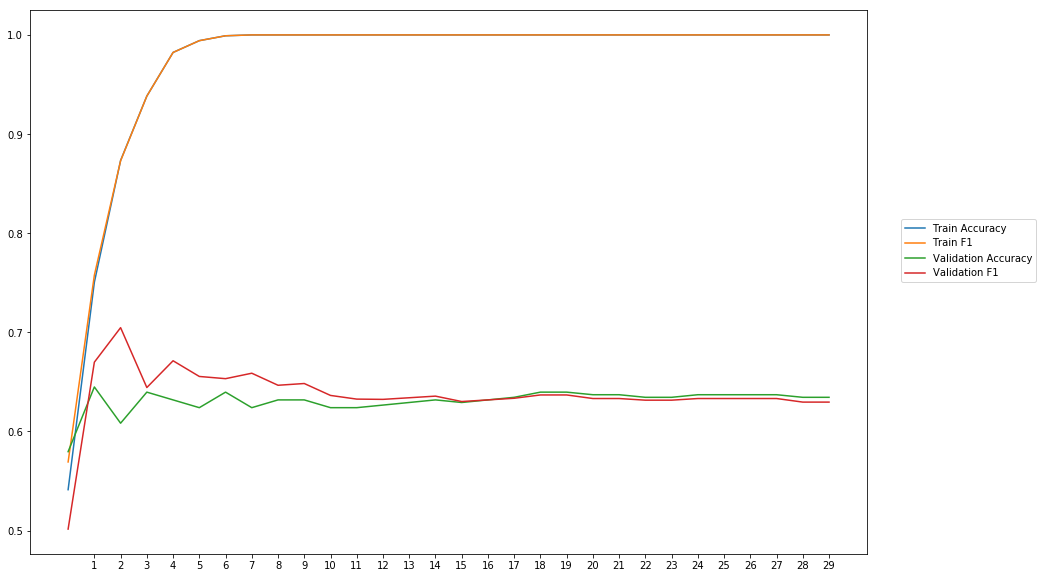

Average Accuracy: 63.09%
Average Precision: 62.54%
Average Recall: 65.51%
Average F1: 63.72%

-----Fold 10--------


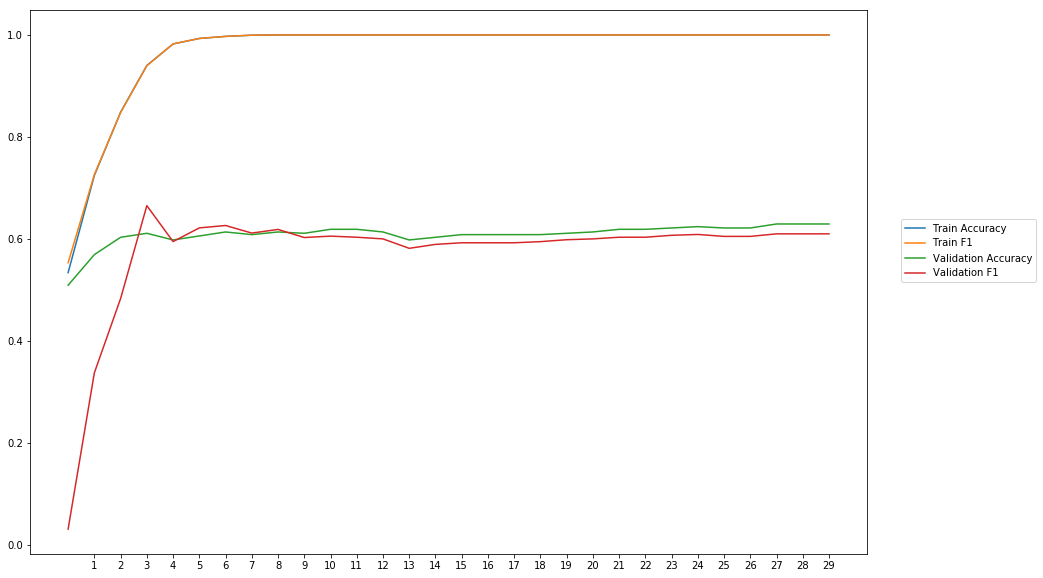

Average Accuracy: 60.89%
Average Precision: 63.70%
Average Recall: 55.60%
Average F1: 57.34%

-------Overallresults-------


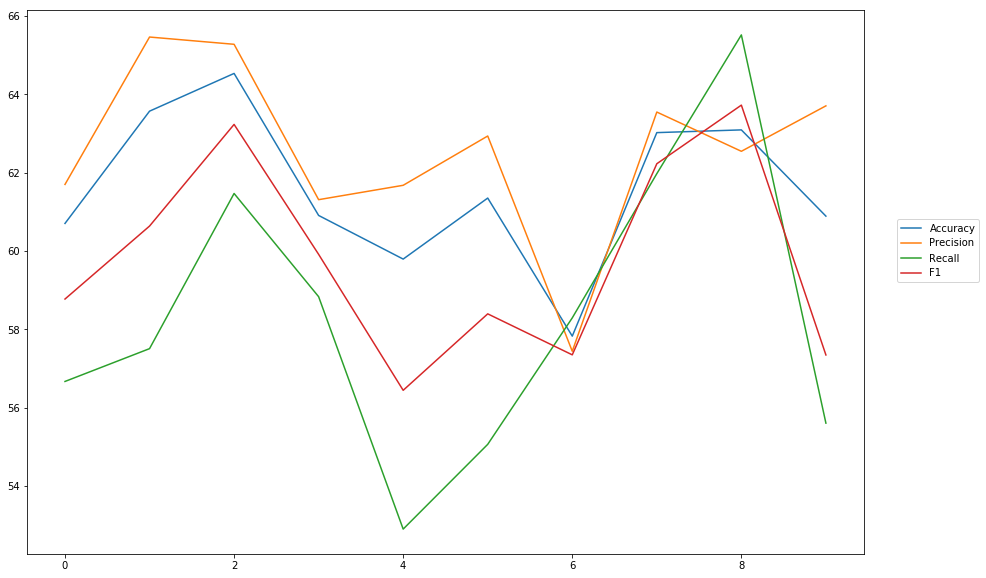

Accuracy: Mean = 61.57% (+/- 1.90%), Max = 64.53%, Min =  57.82%
Precision: Mean = 62.56% (+/- 2.18%), Max = 65.46%, Min =  57.44%
Recall: Mean = 58.38% (+/- 3.55%), Max = 65.51%, Min =  52.90%
F1: Mean = 59.80% (+/- 2.45%), Max = 63.72%, Min =  56.44%


In [25]:
cross_val(model, EPOCHS, 280, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'batch_280')

## Test the best model with heldout testdata

Instructions for updating:
Use tf.cast instead.


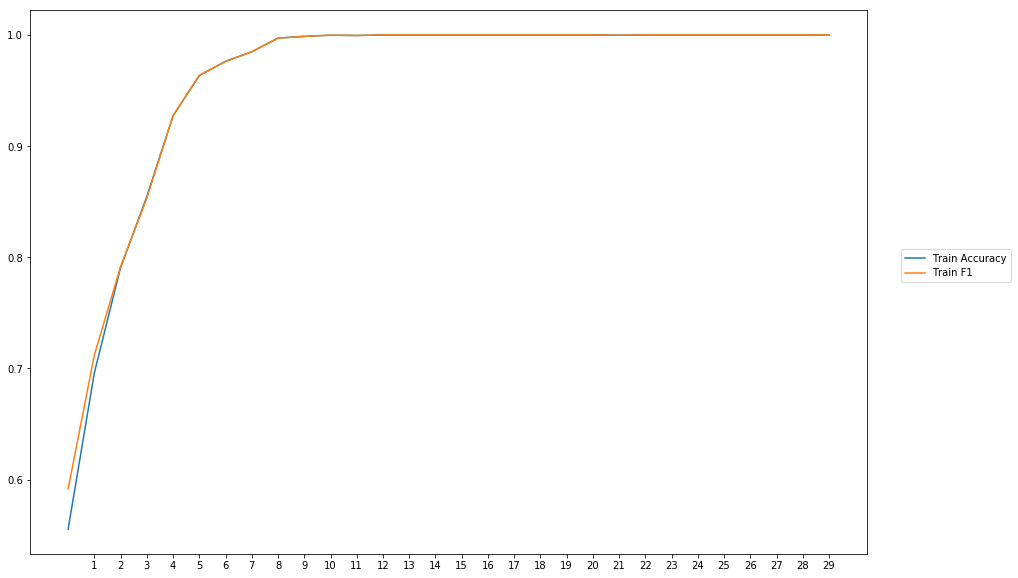


-----Test Scores----
Loss: 1.8368555733135767
Accuracy: 64.9234693877551
Precision: 54.499999986375
Recall: 70.09646299996899
F1: 61.322076636341926


In [9]:
train_evaluate_final_model(model, EPOCHS, 272, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_BatchSize_272')